<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
#viewing random rows
np.random.seed(55)
rand_idx = np.random.randint(low=0, high=data.shape[0], size=10, dtype=int)
data.iloc[rand_idx]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4557,44,25.70,1110.5,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
4762,45,89.30,4016.85,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),1
4391,44,85.25,3704.15,Male,0,No,No,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0
968,2,44.50,90.05,Male,0,Yes,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
2021,26,20.65,595.5,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),0
3419,33,110.45,3655.45,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1
673,7,74.35,533.6,Male,0,No,No,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,0
2595,3,74.95,212.4,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
3422,46,101.00,4680.05,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
606,31,80.55,2471.6,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
data.isna().sum(axis=0)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [8]:
#above was written that TotalSpent is numerical feature and IsSeniorCitizen is categorical
data.TotalSpent = data.TotalSpent.replace(" ", np.nan).fillna(0).astype(float)
data.IsSeniorCitizen = data.IsSeniorCitizen.astype(object)

In [9]:
#now datatypes is OK
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen              object
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [10]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [11]:
#check unique values of cat. features
data[cat_cols].nunique()

Sex                         2
IsSeniorCitizen             2
HasPartner                  2
HasChild                    2
HasPhoneService             2
HasMultiplePhoneNumbers     3
HasInternetService          3
HasOnlineSecurityService    3
HasOnlineBackup             3
HasDeviceProtection         3
HasTechSupportAccess        3
HasOnlineTV                 3
HasMovieSubscription        3
HasContractPhone            3
IsBillingPaperless          2
PaymentMethod               4
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

<AxesSubplot:>

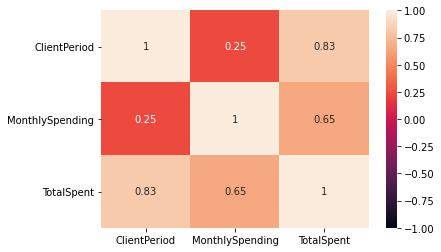

In [12]:
#heatmap allows us to show correlation between numerical features
sns.heatmap(data[num_cols].corr(), vmin=-1, vmax=1, annot=True)

In [13]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,0.262022
std,24.550326,30.176464,2269.049195,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000
75%,55.000000,90.050000,3795.212500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


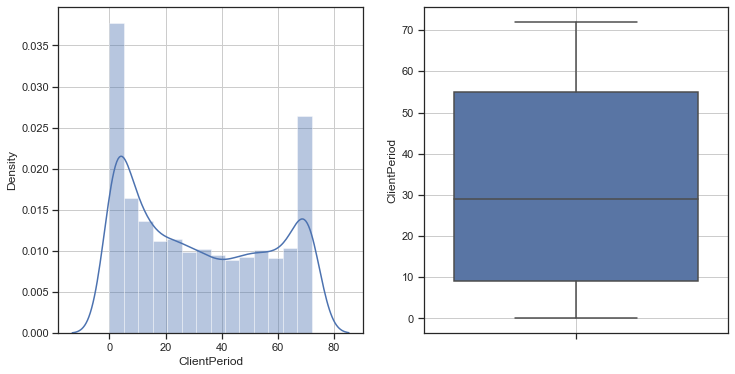

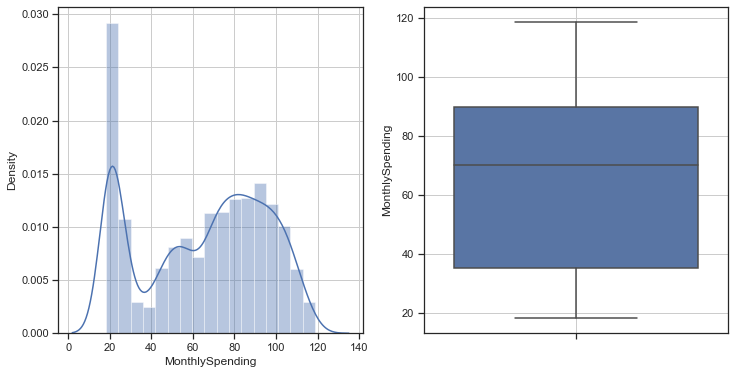

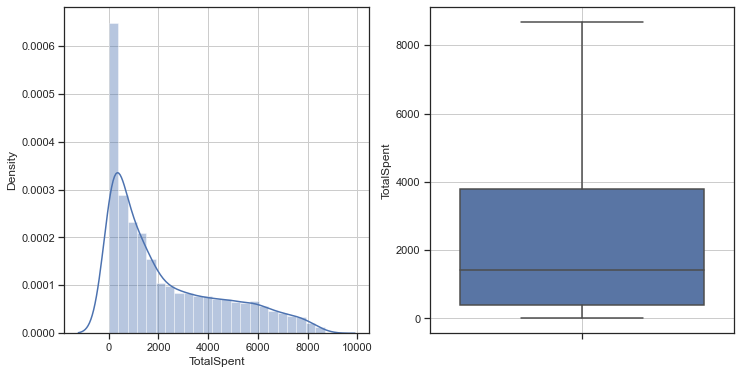

In [14]:
#studying num. features' distribution
sns.set_theme(style="ticks")

for num_feature in num_cols:
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    sns.distplot(data[num_feature])
    plt.grid()
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[num_feature])
    plt.grid()

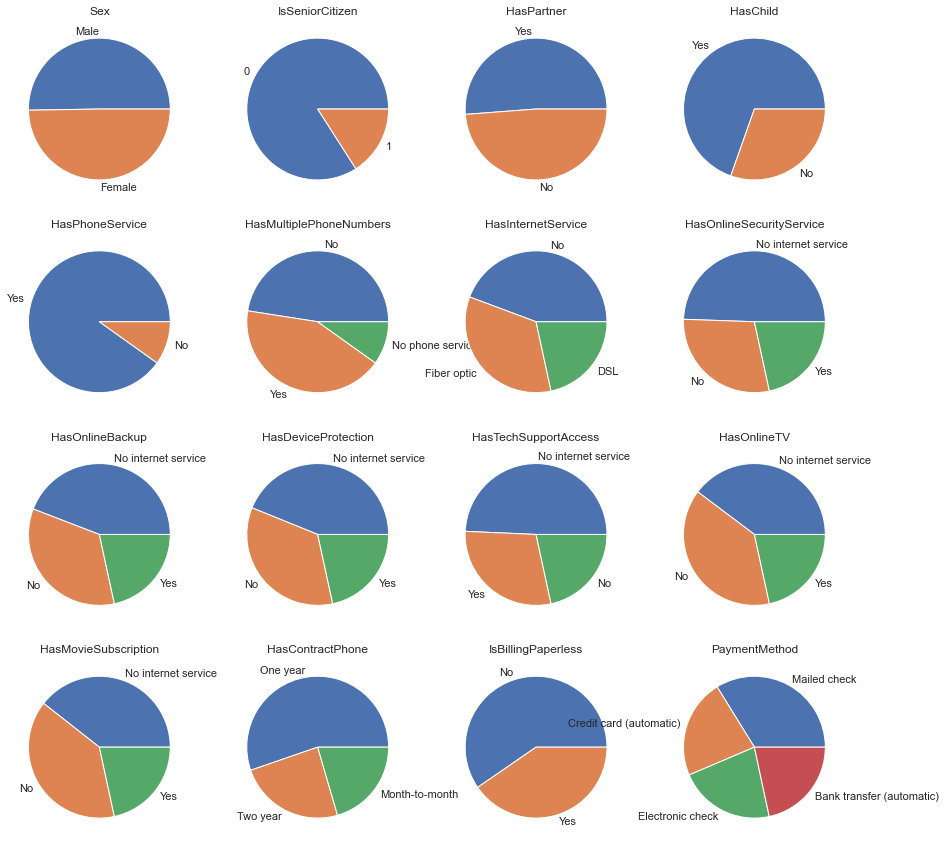

In [15]:
#plotting pies
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
fig_counter = 0
for i in range(4):
    for j in range(4):
        axes[i,j].pie(data[cat_cols[fig_counter]].value_counts(), labels=data[cat_cols[fig_counter]].unique())
        axes[i,j].set_title(cat_cols[fig_counter])
        fig_counter += 1

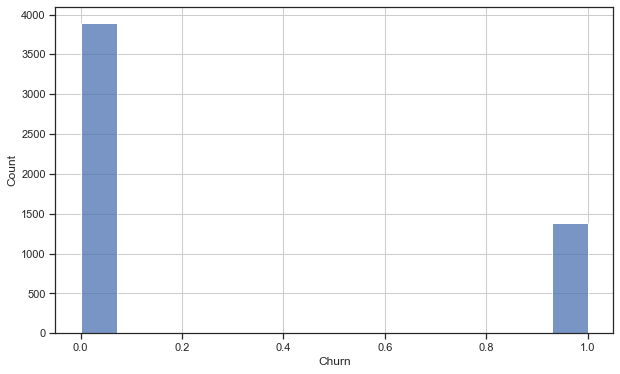

In [16]:
#it's obvious that zero class is major, we have unbalanced destribution 
plt.figure(figsize=(10,6))
sns.histplot(data[target_col])
plt.grid()

In [17]:
#balance classes
data = pd.concat([data, pd.concat([data[data.Churn == 1]]*2, ignore_index=True)], ignore_index=True)

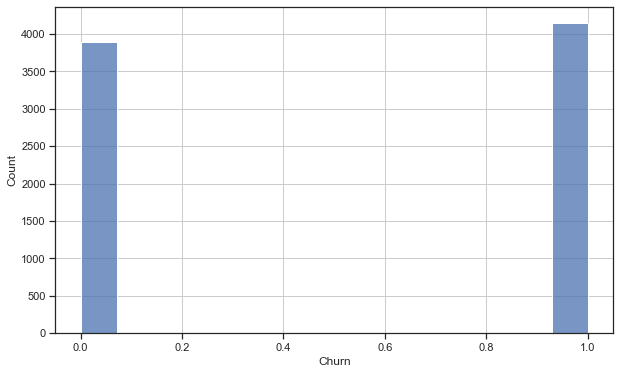

In [18]:
#show current classes' distribution 
plt.figure(figsize=(10,6))
sns.histplot(data[target_col])
plt.grid()

In [19]:
X = data[feature_cols]
y = data[target_col]

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [20]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, \
                                  LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer
from sklearn.impute import SimpleImputer

In [21]:
#creating custom preprocessor
def custom_preprocessor(dataset):
    dataset.TotalSpent = dataset.TotalSpent.replace(" ", np.nan).fillna(0).astype(float)
    dataset.IsSeniorCitizen = dataset.IsSeniorCitizen.astype(object)
    return dataset
custom_preprocessor_trans = FunctionTransformer(custom_preprocessor)

In [22]:
#creating columns transformer
ct = ColumnTransformer(
    [("scaler", StandardScaler(), num_cols),
    ("encoder", OneHotEncoder(), cat_cols)])

In [23]:
#make pipeline
pipe_clf = make_pipeline(custom_preprocessor_trans, ct, LogisticRegression(n_jobs=-1))

In [24]:
#view avaliable params
pipe_clf.get_params()

{'memory': None,
 'steps': [('functiontransformer',
   FunctionTransformer(func=<function custom_preprocessor at 0x7ff9143ee160>)),
  ('columntransformer',
   ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                    ['ClientPeriod', 'MonthlySpending',
                                     'TotalSpent']),
                                   ('encoder', OneHotEncoder(),
                                    ['Sex', 'IsSeniorCitizen', 'HasPartner',
                                     'HasChild', 'HasPhoneService',
                                     'HasMultiplePhoneNumbers',
                                     'HasInternetService',
                                     'HasOnlineSecurityService', 'HasOnlineBackup',
                                     'HasDeviceProtection', 'HasTechSupportAccess',
                                     'HasOnlineTV', 'HasMovieSubscription',
                                     'HasContractPhone', 'IsBillingPaperless',


In [25]:
#grid of params
params = {"logisticregression__C": [200, 100, 10, 1, 0.1, 0.01, 0.001],
         "logisticregression__penalty": ["l2", "l1", "elastic"]}

In [26]:
#init GridSearchCV
grid_clf = GridSearchCV(pipe_clf, param_grid=params, scoring="roc_auc",n_jobs=-1, cv=5, verbose=1)

In [27]:
#fitting GridSearchCV
grid_clf.fit(X, y)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('functiontransformer',
                                        FunctionTransformer(func=<function custom_preprocessor at 0x7ff9143ee160>)),
                                       ('columntransformer',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('encoder',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                      

In [28]:
print(f"Highest roc-auc score {grid_clf.best_score_}")

Highest roc-auc score 0.8475451650394076


In [29]:
print(f"Best params {grid_clf.best_params_}")

Best params {'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество 0.847 при С=10 и penalty="l2"

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [30]:
import catboost

In [31]:
#splitting data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8)

In [32]:
#using catboost for prediction
catboost_clf = catboost.CatBoostClassifier()
catboost_clf.fit(X_train, y_train, cat_features=cat_cols)

Learning rate set to 0.022821
0:	learn: 0.6837943	total: 74.1ms	remaining: 1m 14s
1:	learn: 0.6739416	total: 81.4ms	remaining: 40.6s
2:	learn: 0.6657959	total: 87.5ms	remaining: 29.1s
3:	learn: 0.6589952	total: 90.4ms	remaining: 22.5s
4:	learn: 0.6505136	total: 102ms	remaining: 20.4s
5:	learn: 0.6422251	total: 111ms	remaining: 18.4s
6:	learn: 0.6354344	total: 118ms	remaining: 16.8s
7:	learn: 0.6279716	total: 124ms	remaining: 15.4s
8:	learn: 0.6214436	total: 137ms	remaining: 15.1s
9:	learn: 0.6146018	total: 143ms	remaining: 14.2s
10:	learn: 0.6089418	total: 150ms	remaining: 13.5s
11:	learn: 0.6035931	total: 156ms	remaining: 12.8s
12:	learn: 0.5981480	total: 164ms	remaining: 12.4s
13:	learn: 0.5924782	total: 170ms	remaining: 12s
14:	learn: 0.5875600	total: 176ms	remaining: 11.6s
15:	learn: 0.5825066	total: 183ms	remaining: 11.2s
16:	learn: 0.5778534	total: 188ms	remaining: 10.9s
17:	learn: 0.5735715	total: 194ms	remaining: 10.6s
18:	learn: 0.5693050	total: 208ms	remaining: 10.7s
19:	lear

181:	learn: 0.4432818	total: 1.2s	remaining: 5.41s
182:	learn: 0.4431020	total: 1.21s	remaining: 5.41s
183:	learn: 0.4429671	total: 1.22s	remaining: 5.4s
184:	learn: 0.4426922	total: 1.23s	remaining: 5.4s
185:	learn: 0.4425004	total: 1.23s	remaining: 5.4s
186:	learn: 0.4423395	total: 1.24s	remaining: 5.39s
187:	learn: 0.4423142	total: 1.25s	remaining: 5.38s
188:	learn: 0.4422229	total: 1.25s	remaining: 5.37s
189:	learn: 0.4421465	total: 1.26s	remaining: 5.36s
190:	learn: 0.4420883	total: 1.26s	remaining: 5.35s
191:	learn: 0.4420163	total: 1.27s	remaining: 5.34s
192:	learn: 0.4417664	total: 1.28s	remaining: 5.34s
193:	learn: 0.4416150	total: 1.28s	remaining: 5.33s
194:	learn: 0.4413832	total: 1.29s	remaining: 5.33s
195:	learn: 0.4410839	total: 1.3s	remaining: 5.32s
196:	learn: 0.4409371	total: 1.3s	remaining: 5.32s
197:	learn: 0.4406921	total: 1.31s	remaining: 5.31s
198:	learn: 0.4404875	total: 1.32s	remaining: 5.3s
199:	learn: 0.4404398	total: 1.32s	remaining: 5.29s
200:	learn: 0.44033

345:	learn: 0.4241458	total: 2.21s	remaining: 4.17s
346:	learn: 0.4241125	total: 2.21s	remaining: 4.17s
347:	learn: 0.4239259	total: 2.22s	remaining: 4.16s
348:	learn: 0.4239240	total: 2.23s	remaining: 4.15s
349:	learn: 0.4239149	total: 2.23s	remaining: 4.14s
350:	learn: 0.4238769	total: 2.24s	remaining: 4.13s
351:	learn: 0.4236304	total: 2.24s	remaining: 4.13s
352:	learn: 0.4235018	total: 2.25s	remaining: 4.12s
353:	learn: 0.4233863	total: 2.26s	remaining: 4.12s
354:	learn: 0.4233042	total: 2.26s	remaining: 4.11s
355:	learn: 0.4233034	total: 2.27s	remaining: 4.1s
356:	learn: 0.4232108	total: 2.27s	remaining: 4.09s
357:	learn: 0.4228556	total: 2.28s	remaining: 4.09s
358:	learn: 0.4228547	total: 2.29s	remaining: 4.08s
359:	learn: 0.4226451	total: 2.29s	remaining: 4.08s
360:	learn: 0.4226350	total: 2.3s	remaining: 4.07s
361:	learn: 0.4226324	total: 2.3s	remaining: 4.06s
362:	learn: 0.4224962	total: 2.31s	remaining: 4.05s
363:	learn: 0.4223701	total: 2.32s	remaining: 4.05s
364:	learn: 0.4

509:	learn: 0.4035365	total: 3.25s	remaining: 3.12s
510:	learn: 0.4032575	total: 3.26s	remaining: 3.12s
511:	learn: 0.4032102	total: 3.26s	remaining: 3.11s
512:	learn: 0.4028876	total: 3.27s	remaining: 3.11s
513:	learn: 0.4026305	total: 3.28s	remaining: 3.1s
514:	learn: 0.4026186	total: 3.28s	remaining: 3.09s
515:	learn: 0.4026168	total: 3.29s	remaining: 3.09s
516:	learn: 0.4025675	total: 3.3s	remaining: 3.08s
517:	learn: 0.4023743	total: 3.3s	remaining: 3.07s
518:	learn: 0.4022035	total: 3.31s	remaining: 3.07s
519:	learn: 0.4020981	total: 3.32s	remaining: 3.06s
520:	learn: 0.4019627	total: 3.32s	remaining: 3.06s
521:	learn: 0.4016123	total: 3.33s	remaining: 3.05s
522:	learn: 0.4016123	total: 3.33s	remaining: 3.04s
523:	learn: 0.4013905	total: 3.34s	remaining: 3.03s
524:	learn: 0.4013902	total: 3.34s	remaining: 3.02s
525:	learn: 0.4012053	total: 3.35s	remaining: 3.02s
526:	learn: 0.4010102	total: 3.36s	remaining: 3.01s
527:	learn: 0.4009337	total: 3.36s	remaining: 3.01s
528:	learn: 0.4

681:	learn: 0.3814669	total: 4.39s	remaining: 2.05s
682:	learn: 0.3813580	total: 4.4s	remaining: 2.04s
683:	learn: 0.3813538	total: 4.41s	remaining: 2.04s
684:	learn: 0.3811877	total: 4.41s	remaining: 2.03s
685:	learn: 0.3810303	total: 4.42s	remaining: 2.02s
686:	learn: 0.3807814	total: 4.43s	remaining: 2.02s
687:	learn: 0.3807739	total: 4.43s	remaining: 2.01s
688:	learn: 0.3806026	total: 4.44s	remaining: 2s
689:	learn: 0.3805153	total: 4.45s	remaining: 2s
690:	learn: 0.3803326	total: 4.46s	remaining: 1.99s
691:	learn: 0.3803028	total: 4.46s	remaining: 1.99s
692:	learn: 0.3802335	total: 4.47s	remaining: 1.98s
693:	learn: 0.3801942	total: 4.48s	remaining: 1.97s
694:	learn: 0.3799103	total: 4.48s	remaining: 1.97s
695:	learn: 0.3797702	total: 4.49s	remaining: 1.96s
696:	learn: 0.3797111	total: 4.5s	remaining: 1.95s
697:	learn: 0.3796691	total: 4.5s	remaining: 1.95s
698:	learn: 0.3796162	total: 4.51s	remaining: 1.94s
699:	learn: 0.3794842	total: 4.52s	remaining: 1.94s
700:	learn: 0.3792479

840:	learn: 0.3640411	total: 5.45s	remaining: 1.03s
841:	learn: 0.3639128	total: 5.46s	remaining: 1.02s
842:	learn: 0.3639037	total: 5.46s	remaining: 1.02s
843:	learn: 0.3637815	total: 5.47s	remaining: 1.01s
844:	learn: 0.3636008	total: 5.48s	remaining: 1s
845:	learn: 0.3635264	total: 5.49s	remaining: 999ms
846:	learn: 0.3634698	total: 5.49s	remaining: 992ms
847:	learn: 0.3633356	total: 5.5s	remaining: 986ms
848:	learn: 0.3632166	total: 5.51s	remaining: 980ms
849:	learn: 0.3631777	total: 5.51s	remaining: 973ms
850:	learn: 0.3630767	total: 5.52s	remaining: 967ms
851:	learn: 0.3630618	total: 5.53s	remaining: 960ms
852:	learn: 0.3628241	total: 5.53s	remaining: 954ms
853:	learn: 0.3627127	total: 5.54s	remaining: 947ms
854:	learn: 0.3626192	total: 5.55s	remaining: 941ms
855:	learn: 0.3624218	total: 5.55s	remaining: 934ms
856:	learn: 0.3623389	total: 5.56s	remaining: 928ms
857:	learn: 0.3622064	total: 5.57s	remaining: 922ms
858:	learn: 0.3618963	total: 5.58s	remaining: 915ms
859:	learn: 0.36

In [33]:
y_pred = catboost_clf.predict_proba(X_valid)

In [34]:
#score of default params
roc_auc_score(y_valid, y_pred[:,1])

0.8760488441875972

In [35]:
#handmade gridsearch
iter_list = [800, 900, 1000, 1100]
learning_rate_list = [0.1, 0.2, 0.3]
scores_array = np.empty([len(iter_list), len(learning_rate_list)])
for i in range(len(iter_list)):
    for j in range(len(learning_rate_list)):
        catboost_clf = catboost.CatBoostClassifier(iterations=iter_list[i], learning_rate=learning_rate_list[j])
        catboost_clf.fit(X_train, y_train, cat_features=cat_cols)
        scores_array[i,j] = roc_auc_score(y_valid, catboost_clf.predict_proba(X_valid)[:,1])  

0:	learn: 0.6543959	total: 6.95ms	remaining: 5.55s
1:	learn: 0.6197170	total: 13.7ms	remaining: 5.48s
2:	learn: 0.5964736	total: 19.8ms	remaining: 5.25s
3:	learn: 0.5808005	total: 23.2ms	remaining: 4.61s
4:	learn: 0.5623593	total: 29.6ms	remaining: 4.71s
5:	learn: 0.5506583	total: 34ms	remaining: 4.5s
6:	learn: 0.5390374	total: 41.1ms	remaining: 4.65s
7:	learn: 0.5268366	total: 48.1ms	remaining: 4.77s
8:	learn: 0.5169780	total: 54.2ms	remaining: 4.76s
9:	learn: 0.5081768	total: 60.3ms	remaining: 4.76s
10:	learn: 0.5016815	total: 66.3ms	remaining: 4.76s
11:	learn: 0.4961292	total: 74ms	remaining: 4.86s
12:	learn: 0.4909485	total: 81.1ms	remaining: 4.91s
13:	learn: 0.4881908	total: 85.6ms	remaining: 4.8s
14:	learn: 0.4836859	total: 92.2ms	remaining: 4.82s
15:	learn: 0.4799639	total: 98.2ms	remaining: 4.81s
16:	learn: 0.4768800	total: 104ms	remaining: 4.8s
17:	learn: 0.4733231	total: 111ms	remaining: 4.8s
18:	learn: 0.4701700	total: 116ms	remaining: 4.76s
19:	learn: 0.4673977	total: 121ms

167:	learn: 0.3746831	total: 1.06s	remaining: 3.98s
168:	learn: 0.3746831	total: 1.06s	remaining: 3.96s
169:	learn: 0.3740969	total: 1.07s	remaining: 3.96s
170:	learn: 0.3740192	total: 1.07s	remaining: 3.95s
171:	learn: 0.3733603	total: 1.08s	remaining: 3.95s
172:	learn: 0.3724818	total: 1.09s	remaining: 3.94s
173:	learn: 0.3713330	total: 1.09s	remaining: 3.94s
174:	learn: 0.3711524	total: 1.1s	remaining: 3.93s
175:	learn: 0.3706261	total: 1.11s	remaining: 3.93s
176:	learn: 0.3705833	total: 1.11s	remaining: 3.92s
177:	learn: 0.3696436	total: 1.12s	remaining: 3.92s
178:	learn: 0.3693327	total: 1.13s	remaining: 3.91s
179:	learn: 0.3690530	total: 1.14s	remaining: 3.91s
180:	learn: 0.3688299	total: 1.14s	remaining: 3.91s
181:	learn: 0.3684216	total: 1.15s	remaining: 3.9s
182:	learn: 0.3680791	total: 1.16s	remaining: 3.9s
183:	learn: 0.3675343	total: 1.16s	remaining: 3.89s
184:	learn: 0.3670277	total: 1.17s	remaining: 3.89s
185:	learn: 0.3663173	total: 1.18s	remaining: 3.88s
186:	learn: 0.3

339:	learn: 0.3039159	total: 2.22s	remaining: 3s
340:	learn: 0.3038843	total: 2.22s	remaining: 2.99s
341:	learn: 0.3038191	total: 2.23s	remaining: 2.99s
342:	learn: 0.3036892	total: 2.24s	remaining: 2.98s
343:	learn: 0.3031400	total: 2.25s	remaining: 2.98s
344:	learn: 0.3026147	total: 2.25s	remaining: 2.97s
345:	learn: 0.3025580	total: 2.26s	remaining: 2.96s
346:	learn: 0.3023397	total: 2.27s	remaining: 2.96s
347:	learn: 0.3023295	total: 2.27s	remaining: 2.95s
348:	learn: 0.3021914	total: 2.28s	remaining: 2.94s
349:	learn: 0.3021216	total: 2.29s	remaining: 2.94s
350:	learn: 0.3018831	total: 2.29s	remaining: 2.93s
351:	learn: 0.3017973	total: 2.3s	remaining: 2.93s
352:	learn: 0.3012756	total: 2.31s	remaining: 2.92s
353:	learn: 0.3009625	total: 2.31s	remaining: 2.91s
354:	learn: 0.3003144	total: 2.32s	remaining: 2.91s
355:	learn: 0.2999242	total: 2.33s	remaining: 2.9s
356:	learn: 0.2994225	total: 2.33s	remaining: 2.9s
357:	learn: 0.2991748	total: 2.34s	remaining: 2.89s
358:	learn: 0.2991

511:	learn: 0.2545879	total: 3.42s	remaining: 1.92s
512:	learn: 0.2544262	total: 3.42s	remaining: 1.92s
513:	learn: 0.2540848	total: 3.43s	remaining: 1.91s
514:	learn: 0.2539992	total: 3.44s	remaining: 1.9s
515:	learn: 0.2538805	total: 3.45s	remaining: 1.9s
516:	learn: 0.2535180	total: 3.45s	remaining: 1.89s
517:	learn: 0.2532489	total: 3.46s	remaining: 1.88s
518:	learn: 0.2532200	total: 3.47s	remaining: 1.88s
519:	learn: 0.2529661	total: 3.48s	remaining: 1.87s
520:	learn: 0.2529015	total: 3.48s	remaining: 1.86s
521:	learn: 0.2525641	total: 3.49s	remaining: 1.86s
522:	learn: 0.2523969	total: 3.5s	remaining: 1.85s
523:	learn: 0.2523826	total: 3.5s	remaining: 1.84s
524:	learn: 0.2519135	total: 3.51s	remaining: 1.84s
525:	learn: 0.2516921	total: 3.52s	remaining: 1.83s
526:	learn: 0.2515478	total: 3.52s	remaining: 1.82s
527:	learn: 0.2514203	total: 3.53s	remaining: 1.82s
528:	learn: 0.2513197	total: 3.54s	remaining: 1.81s
529:	learn: 0.2510975	total: 3.54s	remaining: 1.8s
530:	learn: 0.250

684:	learn: 0.2153485	total: 4.63s	remaining: 778ms
685:	learn: 0.2153138	total: 4.64s	remaining: 771ms
686:	learn: 0.2152597	total: 4.65s	remaining: 764ms
687:	learn: 0.2149842	total: 4.65s	remaining: 758ms
688:	learn: 0.2148130	total: 4.66s	remaining: 751ms
689:	learn: 0.2147068	total: 4.67s	remaining: 744ms
690:	learn: 0.2145463	total: 4.67s	remaining: 737ms
691:	learn: 0.2143858	total: 4.68s	remaining: 731ms
692:	learn: 0.2139136	total: 4.69s	remaining: 724ms
693:	learn: 0.2138696	total: 4.7s	remaining: 718ms
694:	learn: 0.2136904	total: 4.71s	remaining: 711ms
695:	learn: 0.2136700	total: 4.71s	remaining: 704ms
696:	learn: 0.2134017	total: 4.72s	remaining: 697ms
697:	learn: 0.2132989	total: 4.72s	remaining: 691ms
698:	learn: 0.2131675	total: 4.73s	remaining: 684ms
699:	learn: 0.2130037	total: 4.74s	remaining: 677ms
700:	learn: 0.2125592	total: 4.75s	remaining: 670ms
701:	learn: 0.2124557	total: 4.75s	remaining: 664ms
702:	learn: 0.2121899	total: 4.76s	remaining: 657ms
703:	learn: 0

58:	learn: 0.4070397	total: 342ms	remaining: 4.3s
59:	learn: 0.4069894	total: 349ms	remaining: 4.3s
60:	learn: 0.4048587	total: 356ms	remaining: 4.31s
61:	learn: 0.4027991	total: 363ms	remaining: 4.32s
62:	learn: 0.4000299	total: 369ms	remaining: 4.32s
63:	learn: 0.3972374	total: 376ms	remaining: 4.32s
64:	learn: 0.3965497	total: 382ms	remaining: 4.32s
65:	learn: 0.3960599	total: 390ms	remaining: 4.33s
66:	learn: 0.3946144	total: 396ms	remaining: 4.33s
67:	learn: 0.3924250	total: 403ms	remaining: 4.34s
68:	learn: 0.3921727	total: 409ms	remaining: 4.33s
69:	learn: 0.3921442	total: 416ms	remaining: 4.34s
70:	learn: 0.3912411	total: 424ms	remaining: 4.35s
71:	learn: 0.3911761	total: 431ms	remaining: 4.36s
72:	learn: 0.3910946	total: 438ms	remaining: 4.36s
73:	learn: 0.3899715	total: 445ms	remaining: 4.36s
74:	learn: 0.3894937	total: 451ms	remaining: 4.36s
75:	learn: 0.3889983	total: 458ms	remaining: 4.36s
76:	learn: 0.3871765	total: 464ms	remaining: 4.35s
77:	learn: 0.3867287	total: 469ms

237:	learn: 0.2747158	total: 1.55s	remaining: 3.67s
238:	learn: 0.2742088	total: 1.56s	remaining: 3.67s
239:	learn: 0.2730652	total: 1.57s	remaining: 3.66s
240:	learn: 0.2723588	total: 1.57s	remaining: 3.65s
241:	learn: 0.2717459	total: 1.58s	remaining: 3.65s
242:	learn: 0.2712582	total: 1.59s	remaining: 3.64s
243:	learn: 0.2701849	total: 1.59s	remaining: 3.63s
244:	learn: 0.2696494	total: 1.6s	remaining: 3.63s
245:	learn: 0.2692236	total: 1.61s	remaining: 3.63s
246:	learn: 0.2690186	total: 1.62s	remaining: 3.62s
247:	learn: 0.2680453	total: 1.62s	remaining: 3.61s
248:	learn: 0.2676546	total: 1.63s	remaining: 3.61s
249:	learn: 0.2668544	total: 1.64s	remaining: 3.6s
250:	learn: 0.2660726	total: 1.64s	remaining: 3.59s
251:	learn: 0.2659578	total: 1.65s	remaining: 3.59s
252:	learn: 0.2654442	total: 1.66s	remaining: 3.58s
253:	learn: 0.2646975	total: 1.66s	remaining: 3.58s
254:	learn: 0.2636420	total: 1.67s	remaining: 3.57s
255:	learn: 0.2627273	total: 1.68s	remaining: 3.56s
256:	learn: 0.

413:	learn: 0.1932381	total: 2.76s	remaining: 2.57s
414:	learn: 0.1930083	total: 2.77s	remaining: 2.57s
415:	learn: 0.1928501	total: 2.78s	remaining: 2.56s
416:	learn: 0.1921286	total: 2.78s	remaining: 2.56s
417:	learn: 0.1917988	total: 2.79s	remaining: 2.55s
418:	learn: 0.1914991	total: 2.79s	remaining: 2.54s
419:	learn: 0.1907524	total: 2.8s	remaining: 2.54s
420:	learn: 0.1903528	total: 2.81s	remaining: 2.53s
421:	learn: 0.1896445	total: 2.82s	remaining: 2.52s
422:	learn: 0.1891107	total: 2.82s	remaining: 2.52s
423:	learn: 0.1889442	total: 2.83s	remaining: 2.51s
424:	learn: 0.1885576	total: 2.84s	remaining: 2.5s
425:	learn: 0.1871158	total: 2.84s	remaining: 2.5s
426:	learn: 0.1865765	total: 2.85s	remaining: 2.49s
427:	learn: 0.1864387	total: 2.86s	remaining: 2.48s
428:	learn: 0.1860176	total: 2.87s	remaining: 2.48s
429:	learn: 0.1855216	total: 2.87s	remaining: 2.47s
430:	learn: 0.1849280	total: 2.88s	remaining: 2.46s
431:	learn: 0.1847164	total: 2.88s	remaining: 2.46s
432:	learn: 0.1

588:	learn: 0.1403901	total: 3.96s	remaining: 1.42s
589:	learn: 0.1400441	total: 3.97s	remaining: 1.41s
590:	learn: 0.1399416	total: 3.98s	remaining: 1.41s
591:	learn: 0.1396324	total: 3.99s	remaining: 1.4s
592:	learn: 0.1394832	total: 3.99s	remaining: 1.39s
593:	learn: 0.1391988	total: 4s	remaining: 1.39s
594:	learn: 0.1390032	total: 4.01s	remaining: 1.38s
595:	learn: 0.1389137	total: 4.01s	remaining: 1.37s
596:	learn: 0.1387224	total: 4.02s	remaining: 1.37s
597:	learn: 0.1385550	total: 4.03s	remaining: 1.36s
598:	learn: 0.1383183	total: 4.04s	remaining: 1.35s
599:	learn: 0.1381345	total: 4.04s	remaining: 1.35s
600:	learn: 0.1378107	total: 4.05s	remaining: 1.34s
601:	learn: 0.1372905	total: 4.06s	remaining: 1.33s
602:	learn: 0.1371424	total: 4.07s	remaining: 1.33s
603:	learn: 0.1369658	total: 4.07s	remaining: 1.32s
604:	learn: 0.1369119	total: 4.08s	remaining: 1.31s
605:	learn: 0.1367990	total: 4.09s	remaining: 1.31s
606:	learn: 0.1367022	total: 4.09s	remaining: 1.3s
607:	learn: 0.136

761:	learn: 0.1091471	total: 5.17s	remaining: 258ms
762:	learn: 0.1090206	total: 5.18s	remaining: 251ms
763:	learn: 0.1088115	total: 5.18s	remaining: 244ms
764:	learn: 0.1087016	total: 5.19s	remaining: 238ms
765:	learn: 0.1085902	total: 5.2s	remaining: 231ms
766:	learn: 0.1083150	total: 5.21s	remaining: 224ms
767:	learn: 0.1081198	total: 5.21s	remaining: 217ms
768:	learn: 0.1080267	total: 5.22s	remaining: 210ms
769:	learn: 0.1079157	total: 5.23s	remaining: 204ms
770:	learn: 0.1076361	total: 5.23s	remaining: 197ms
771:	learn: 0.1074966	total: 5.24s	remaining: 190ms
772:	learn: 0.1074342	total: 5.25s	remaining: 183ms
773:	learn: 0.1073274	total: 5.26s	remaining: 177ms
774:	learn: 0.1072601	total: 5.26s	remaining: 170ms
775:	learn: 0.1071404	total: 5.27s	remaining: 163ms
776:	learn: 0.1070419	total: 5.28s	remaining: 156ms
777:	learn: 0.1068611	total: 5.29s	remaining: 149ms
778:	learn: 0.1065355	total: 5.29s	remaining: 143ms
779:	learn: 0.1063151	total: 5.3s	remaining: 136ms
780:	learn: 0.

130:	learn: 0.2862162	total: 861ms	remaining: 4.4s
131:	learn: 0.2855231	total: 868ms	remaining: 4.39s
132:	learn: 0.2841153	total: 875ms	remaining: 4.39s
133:	learn: 0.2832664	total: 883ms	remaining: 4.39s
134:	learn: 0.2829363	total: 890ms	remaining: 4.38s
135:	learn: 0.2810383	total: 897ms	remaining: 4.38s
136:	learn: 0.2803495	total: 903ms	remaining: 4.37s
137:	learn: 0.2801038	total: 911ms	remaining: 4.37s
138:	learn: 0.2792051	total: 918ms	remaining: 4.36s
139:	learn: 0.2780926	total: 924ms	remaining: 4.36s
140:	learn: 0.2765238	total: 934ms	remaining: 4.36s
141:	learn: 0.2751508	total: 941ms	remaining: 4.36s
142:	learn: 0.2751281	total: 949ms	remaining: 4.36s
143:	learn: 0.2744741	total: 955ms	remaining: 4.35s
144:	learn: 0.2743390	total: 962ms	remaining: 4.35s
145:	learn: 0.2733369	total: 969ms	remaining: 4.34s
146:	learn: 0.2726002	total: 976ms	remaining: 4.33s
147:	learn: 0.2717282	total: 982ms	remaining: 4.33s
148:	learn: 0.2713527	total: 990ms	remaining: 4.33s
149:	learn: 0

304:	learn: 0.1690280	total: 2.06s	remaining: 3.35s
305:	learn: 0.1685002	total: 2.07s	remaining: 3.34s
306:	learn: 0.1679266	total: 2.08s	remaining: 3.33s
307:	learn: 0.1670983	total: 2.08s	remaining: 3.33s
308:	learn: 0.1661317	total: 2.09s	remaining: 3.32s
309:	learn: 0.1657416	total: 2.1s	remaining: 3.31s
310:	learn: 0.1652244	total: 2.1s	remaining: 3.31s
311:	learn: 0.1644399	total: 2.11s	remaining: 3.3s
312:	learn: 0.1643362	total: 2.12s	remaining: 3.29s
313:	learn: 0.1638692	total: 2.12s	remaining: 3.28s
314:	learn: 0.1632925	total: 2.13s	remaining: 3.28s
315:	learn: 0.1628027	total: 2.14s	remaining: 3.27s
316:	learn: 0.1619645	total: 2.14s	remaining: 3.27s
317:	learn: 0.1614922	total: 2.15s	remaining: 3.26s
318:	learn: 0.1605510	total: 2.16s	remaining: 3.25s
319:	learn: 0.1602095	total: 2.16s	remaining: 3.24s
320:	learn: 0.1598666	total: 2.17s	remaining: 3.24s
321:	learn: 0.1594483	total: 2.18s	remaining: 3.23s
322:	learn: 0.1590284	total: 2.18s	remaining: 3.22s
323:	learn: 0.1

478:	learn: 0.1068044	total: 3.27s	remaining: 2.19s
479:	learn: 0.1063135	total: 3.27s	remaining: 2.18s
480:	learn: 0.1060725	total: 3.28s	remaining: 2.17s
481:	learn: 0.1058854	total: 3.29s	remaining: 2.17s
482:	learn: 0.1057931	total: 3.29s	remaining: 2.16s
483:	learn: 0.1055353	total: 3.3s	remaining: 2.16s
484:	learn: 0.1052988	total: 3.31s	remaining: 2.15s
485:	learn: 0.1051691	total: 3.32s	remaining: 2.14s
486:	learn: 0.1049928	total: 3.32s	remaining: 2.13s
487:	learn: 0.1048533	total: 3.33s	remaining: 2.13s
488:	learn: 0.1044049	total: 3.34s	remaining: 2.12s
489:	learn: 0.1040216	total: 3.34s	remaining: 2.12s
490:	learn: 0.1037839	total: 3.35s	remaining: 2.11s
491:	learn: 0.1034278	total: 3.36s	remaining: 2.1s
492:	learn: 0.1031153	total: 3.36s	remaining: 2.09s
493:	learn: 0.1030472	total: 3.37s	remaining: 2.09s
494:	learn: 0.1028437	total: 3.38s	remaining: 2.08s
495:	learn: 0.1026563	total: 3.38s	remaining: 2.07s
496:	learn: 0.1024336	total: 3.39s	remaining: 2.07s
497:	learn: 0.

651:	learn: 0.0759144	total: 4.47s	remaining: 1.01s
652:	learn: 0.0758880	total: 4.47s	remaining: 1.01s
653:	learn: 0.0755874	total: 4.48s	remaining: 1s
654:	learn: 0.0754284	total: 4.49s	remaining: 994ms
655:	learn: 0.0753478	total: 4.5s	remaining: 987ms
656:	learn: 0.0752118	total: 4.5s	remaining: 980ms
657:	learn: 0.0748516	total: 4.51s	remaining: 973ms
658:	learn: 0.0743313	total: 4.52s	remaining: 967ms
659:	learn: 0.0742801	total: 4.52s	remaining: 960ms
660:	learn: 0.0742298	total: 4.53s	remaining: 953ms
661:	learn: 0.0741611	total: 4.54s	remaining: 946ms
662:	learn: 0.0741217	total: 4.55s	remaining: 940ms
663:	learn: 0.0740415	total: 4.55s	remaining: 933ms
664:	learn: 0.0740043	total: 4.56s	remaining: 926ms
665:	learn: 0.0738440	total: 4.57s	remaining: 919ms
666:	learn: 0.0737565	total: 4.57s	remaining: 912ms
667:	learn: 0.0735742	total: 4.58s	remaining: 906ms
668:	learn: 0.0733147	total: 4.59s	remaining: 899ms
669:	learn: 0.0732521	total: 4.6s	remaining: 892ms
670:	learn: 0.0729

17:	learn: 0.4733231	total: 103ms	remaining: 5.03s
18:	learn: 0.4701700	total: 109ms	remaining: 5.05s
19:	learn: 0.4673977	total: 115ms	remaining: 5.06s
20:	learn: 0.4668675	total: 118ms	remaining: 4.94s
21:	learn: 0.4638582	total: 123ms	remaining: 4.92s
22:	learn: 0.4627796	total: 129ms	remaining: 4.9s
23:	learn: 0.4612637	total: 134ms	remaining: 4.89s
24:	learn: 0.4601160	total: 140ms	remaining: 4.91s
25:	learn: 0.4590430	total: 146ms	remaining: 4.91s
26:	learn: 0.4573677	total: 152ms	remaining: 4.91s
27:	learn: 0.4556081	total: 158ms	remaining: 4.93s
28:	learn: 0.4537401	total: 164ms	remaining: 4.91s
29:	learn: 0.4513422	total: 169ms	remaining: 4.91s
30:	learn: 0.4505624	total: 174ms	remaining: 4.89s
31:	learn: 0.4500214	total: 180ms	remaining: 4.89s
32:	learn: 0.4492503	total: 187ms	remaining: 4.9s
33:	learn: 0.4475057	total: 192ms	remaining: 4.89s
34:	learn: 0.4473329	total: 197ms	remaining: 4.86s
35:	learn: 0.4463331	total: 203ms	remaining: 4.86s
36:	learn: 0.4454161	total: 209ms

181:	learn: 0.3684216	total: 1.11s	remaining: 4.39s
182:	learn: 0.3680791	total: 1.12s	remaining: 4.39s
183:	learn: 0.3675343	total: 1.13s	remaining: 4.39s
184:	learn: 0.3670277	total: 1.14s	remaining: 4.39s
185:	learn: 0.3663173	total: 1.14s	remaining: 4.38s
186:	learn: 0.3656807	total: 1.15s	remaining: 4.38s
187:	learn: 0.3649718	total: 1.16s	remaining: 4.37s
188:	learn: 0.3646810	total: 1.16s	remaining: 4.37s
189:	learn: 0.3644730	total: 1.17s	remaining: 4.37s
190:	learn: 0.3640929	total: 1.18s	remaining: 4.36s
191:	learn: 0.3640017	total: 1.18s	remaining: 4.36s
192:	learn: 0.3631502	total: 1.19s	remaining: 4.35s
193:	learn: 0.3631459	total: 1.2s	remaining: 4.35s
194:	learn: 0.3631459	total: 1.2s	remaining: 4.34s
195:	learn: 0.3630517	total: 1.21s	remaining: 4.33s
196:	learn: 0.3621122	total: 1.21s	remaining: 4.33s
197:	learn: 0.3614202	total: 1.22s	remaining: 4.32s
198:	learn: 0.3604495	total: 1.23s	remaining: 4.32s
199:	learn: 0.3597699	total: 1.23s	remaining: 4.32s
200:	learn: 0.

343:	learn: 0.3031400	total: 2.21s	remaining: 3.57s
344:	learn: 0.3026147	total: 2.21s	remaining: 3.56s
345:	learn: 0.3025580	total: 2.22s	remaining: 3.56s
346:	learn: 0.3023397	total: 2.23s	remaining: 3.55s
347:	learn: 0.3023295	total: 2.23s	remaining: 3.54s
348:	learn: 0.3021914	total: 2.24s	remaining: 3.54s
349:	learn: 0.3021216	total: 2.25s	remaining: 3.53s
350:	learn: 0.3018831	total: 2.25s	remaining: 3.53s
351:	learn: 0.3017973	total: 2.26s	remaining: 3.52s
352:	learn: 0.3012756	total: 2.27s	remaining: 3.51s
353:	learn: 0.3009625	total: 2.27s	remaining: 3.51s
354:	learn: 0.3003144	total: 2.28s	remaining: 3.5s
355:	learn: 0.2999242	total: 2.29s	remaining: 3.5s
356:	learn: 0.2994225	total: 2.29s	remaining: 3.49s
357:	learn: 0.2991748	total: 2.3s	remaining: 3.48s
358:	learn: 0.2991455	total: 2.31s	remaining: 3.48s
359:	learn: 0.2990115	total: 2.32s	remaining: 3.47s
360:	learn: 0.2985081	total: 2.32s	remaining: 3.47s
361:	learn: 0.2983779	total: 2.33s	remaining: 3.46s
362:	learn: 0.2

503:	learn: 0.2567142	total: 3.31s	remaining: 2.6s
504:	learn: 0.2565975	total: 3.31s	remaining: 2.59s
505:	learn: 0.2564998	total: 3.32s	remaining: 2.58s
506:	learn: 0.2560685	total: 3.33s	remaining: 2.58s
507:	learn: 0.2557678	total: 3.33s	remaining: 2.57s
508:	learn: 0.2555372	total: 3.34s	remaining: 2.57s
509:	learn: 0.2552810	total: 3.35s	remaining: 2.56s
510:	learn: 0.2547638	total: 3.35s	remaining: 2.55s
511:	learn: 0.2545879	total: 3.36s	remaining: 2.55s
512:	learn: 0.2544262	total: 3.37s	remaining: 2.54s
513:	learn: 0.2540848	total: 3.38s	remaining: 2.53s
514:	learn: 0.2539992	total: 3.38s	remaining: 2.53s
515:	learn: 0.2538805	total: 3.39s	remaining: 2.52s
516:	learn: 0.2535180	total: 3.4s	remaining: 2.52s
517:	learn: 0.2532489	total: 3.4s	remaining: 2.51s
518:	learn: 0.2532200	total: 3.41s	remaining: 2.5s
519:	learn: 0.2529661	total: 3.42s	remaining: 2.5s
520:	learn: 0.2529015	total: 3.42s	remaining: 2.49s
521:	learn: 0.2525641	total: 3.43s	remaining: 2.48s
522:	learn: 0.252

663:	learn: 0.2213143	total: 4.42s	remaining: 1.57s
664:	learn: 0.2211720	total: 4.43s	remaining: 1.56s
665:	learn: 0.2209124	total: 4.43s	remaining: 1.56s
666:	learn: 0.2208996	total: 4.44s	remaining: 1.55s
667:	learn: 0.2206628	total: 4.45s	remaining: 1.54s
668:	learn: 0.2203291	total: 4.46s	remaining: 1.54s
669:	learn: 0.2199539	total: 4.46s	remaining: 1.53s
670:	learn: 0.2195416	total: 4.47s	remaining: 1.52s
671:	learn: 0.2193272	total: 4.48s	remaining: 1.52s
672:	learn: 0.2187799	total: 4.48s	remaining: 1.51s
673:	learn: 0.2186071	total: 4.49s	remaining: 1.5s
674:	learn: 0.2182855	total: 4.5s	remaining: 1.5s
675:	learn: 0.2180857	total: 4.5s	remaining: 1.49s
676:	learn: 0.2178062	total: 4.51s	remaining: 1.49s
677:	learn: 0.2173031	total: 4.52s	remaining: 1.48s
678:	learn: 0.2169631	total: 4.52s	remaining: 1.47s
679:	learn: 0.2165062	total: 4.53s	remaining: 1.47s
680:	learn: 0.2163500	total: 4.54s	remaining: 1.46s
681:	learn: 0.2159882	total: 4.54s	remaining: 1.45s
682:	learn: 0.21

822:	learn: 0.1915717	total: 5.53s	remaining: 517ms
823:	learn: 0.1915431	total: 5.53s	remaining: 510ms
824:	learn: 0.1915262	total: 5.54s	remaining: 504ms
825:	learn: 0.1912973	total: 5.55s	remaining: 497ms
826:	learn: 0.1911543	total: 5.55s	remaining: 490ms
827:	learn: 0.1908300	total: 5.56s	remaining: 484ms
828:	learn: 0.1907335	total: 5.57s	remaining: 477ms
829:	learn: 0.1906046	total: 5.57s	remaining: 470ms
830:	learn: 0.1904605	total: 5.58s	remaining: 463ms
831:	learn: 0.1901879	total: 5.59s	remaining: 457ms
832:	learn: 0.1898517	total: 5.59s	remaining: 450ms
833:	learn: 0.1896137	total: 5.6s	remaining: 443ms
834:	learn: 0.1894725	total: 5.61s	remaining: 437ms
835:	learn: 0.1893683	total: 5.62s	remaining: 430ms
836:	learn: 0.1889516	total: 5.62s	remaining: 423ms
837:	learn: 0.1887097	total: 5.63s	remaining: 417ms
838:	learn: 0.1885573	total: 5.64s	remaining: 410ms
839:	learn: 0.1884125	total: 5.64s	remaining: 403ms
840:	learn: 0.1883607	total: 5.65s	remaining: 397ms
841:	learn: 0

86:	learn: 0.3773238	total: 521ms	remaining: 4.87s
87:	learn: 0.3764774	total: 529ms	remaining: 4.88s
88:	learn: 0.3759737	total: 536ms	remaining: 4.88s
89:	learn: 0.3746352	total: 543ms	remaining: 4.88s
90:	learn: 0.3740239	total: 551ms	remaining: 4.89s
91:	learn: 0.3728145	total: 557ms	remaining: 4.89s
92:	learn: 0.3720249	total: 565ms	remaining: 4.9s
93:	learn: 0.3707058	total: 572ms	remaining: 4.91s
94:	learn: 0.3689008	total: 579ms	remaining: 4.9s
95:	learn: 0.3688177	total: 585ms	remaining: 4.9s
96:	learn: 0.3682149	total: 592ms	remaining: 4.9s
97:	learn: 0.3674049	total: 600ms	remaining: 4.91s
98:	learn: 0.3674048	total: 604ms	remaining: 4.89s
99:	learn: 0.3668073	total: 611ms	remaining: 4.89s
100:	learn: 0.3661786	total: 618ms	remaining: 4.89s
101:	learn: 0.3658141	total: 624ms	remaining: 4.88s
102:	learn: 0.3655119	total: 631ms	remaining: 4.88s
103:	learn: 0.3641990	total: 638ms	remaining: 4.88s
104:	learn: 0.3620180	total: 644ms	remaining: 4.88s
105:	learn: 0.3611117	total: 6

248:	learn: 0.2676546	total: 1.63s	remaining: 4.25s
249:	learn: 0.2668544	total: 1.63s	remaining: 4.25s
250:	learn: 0.2660726	total: 1.64s	remaining: 4.25s
251:	learn: 0.2659578	total: 1.65s	remaining: 4.24s
252:	learn: 0.2654442	total: 1.66s	remaining: 4.24s
253:	learn: 0.2646975	total: 1.66s	remaining: 4.23s
254:	learn: 0.2636420	total: 1.67s	remaining: 4.22s
255:	learn: 0.2627273	total: 1.68s	remaining: 4.21s
256:	learn: 0.2625357	total: 1.68s	remaining: 4.21s
257:	learn: 0.2619885	total: 1.69s	remaining: 4.2s
258:	learn: 0.2609648	total: 1.7s	remaining: 4.2s
259:	learn: 0.2604711	total: 1.7s	remaining: 4.19s
260:	learn: 0.2600519	total: 1.71s	remaining: 4.18s
261:	learn: 0.2595907	total: 1.72s	remaining: 4.18s
262:	learn: 0.2588502	total: 1.72s	remaining: 4.17s
263:	learn: 0.2579579	total: 1.73s	remaining: 4.17s
264:	learn: 0.2573789	total: 1.74s	remaining: 4.16s
265:	learn: 0.2572580	total: 1.74s	remaining: 4.15s
266:	learn: 0.2568838	total: 1.75s	remaining: 4.14s
267:	learn: 0.25

408:	learn: 0.1949856	total: 2.73s	remaining: 3.27s
409:	learn: 0.1947393	total: 2.73s	remaining: 3.27s
410:	learn: 0.1943757	total: 2.74s	remaining: 3.26s
411:	learn: 0.1935950	total: 2.75s	remaining: 3.25s
412:	learn: 0.1935167	total: 2.75s	remaining: 3.25s
413:	learn: 0.1932381	total: 2.76s	remaining: 3.24s
414:	learn: 0.1930083	total: 2.77s	remaining: 3.23s
415:	learn: 0.1928501	total: 2.77s	remaining: 3.23s
416:	learn: 0.1921286	total: 2.78s	remaining: 3.22s
417:	learn: 0.1917988	total: 2.79s	remaining: 3.21s
418:	learn: 0.1914991	total: 2.79s	remaining: 3.21s
419:	learn: 0.1907524	total: 2.8s	remaining: 3.2s
420:	learn: 0.1903528	total: 2.81s	remaining: 3.19s
421:	learn: 0.1896445	total: 2.81s	remaining: 3.19s
422:	learn: 0.1891107	total: 2.82s	remaining: 3.18s
423:	learn: 0.1889442	total: 2.83s	remaining: 3.17s
424:	learn: 0.1885576	total: 2.83s	remaining: 3.17s
425:	learn: 0.1871158	total: 2.84s	remaining: 3.16s
426:	learn: 0.1865765	total: 2.85s	remaining: 3.16s
427:	learn: 0.

580:	learn: 0.1421955	total: 3.93s	remaining: 2.16s
581:	learn: 0.1418825	total: 3.94s	remaining: 2.15s
582:	learn: 0.1416163	total: 3.94s	remaining: 2.14s
583:	learn: 0.1413107	total: 3.95s	remaining: 2.14s
584:	learn: 0.1411798	total: 3.96s	remaining: 2.13s
585:	learn: 0.1408672	total: 3.96s	remaining: 2.13s
586:	learn: 0.1407716	total: 3.97s	remaining: 2.12s
587:	learn: 0.1406379	total: 3.98s	remaining: 2.11s
588:	learn: 0.1403901	total: 3.99s	remaining: 2.1s
589:	learn: 0.1400441	total: 3.99s	remaining: 2.1s
590:	learn: 0.1399416	total: 4s	remaining: 2.09s
591:	learn: 0.1396324	total: 4.01s	remaining: 2.08s
592:	learn: 0.1394832	total: 4.01s	remaining: 2.08s
593:	learn: 0.1391988	total: 4.02s	remaining: 2.07s
594:	learn: 0.1390032	total: 4.03s	remaining: 2.06s
595:	learn: 0.1389137	total: 4.04s	remaining: 2.06s
596:	learn: 0.1387224	total: 4.04s	remaining: 2.05s
597:	learn: 0.1385550	total: 4.05s	remaining: 2.04s
598:	learn: 0.1383183	total: 4.06s	remaining: 2.04s
599:	learn: 0.138

753:	learn: 0.1103246	total: 5.13s	remaining: 994ms
754:	learn: 0.1102202	total: 5.14s	remaining: 988ms
755:	learn: 0.1100546	total: 5.15s	remaining: 981ms
756:	learn: 0.1099517	total: 5.16s	remaining: 974ms
757:	learn: 0.1097767	total: 5.16s	remaining: 967ms
758:	learn: 0.1096099	total: 5.17s	remaining: 961ms
759:	learn: 0.1094563	total: 5.18s	remaining: 954ms
760:	learn: 0.1093882	total: 5.18s	remaining: 947ms
761:	learn: 0.1091471	total: 5.19s	remaining: 940ms
762:	learn: 0.1090206	total: 5.2s	remaining: 933ms
763:	learn: 0.1088115	total: 5.2s	remaining: 926ms
764:	learn: 0.1087016	total: 5.21s	remaining: 920ms
765:	learn: 0.1085902	total: 5.22s	remaining: 913ms
766:	learn: 0.1083150	total: 5.22s	remaining: 906ms
767:	learn: 0.1081198	total: 5.23s	remaining: 899ms
768:	learn: 0.1080267	total: 5.24s	remaining: 893ms
769:	learn: 0.1079157	total: 5.25s	remaining: 886ms
770:	learn: 0.1076361	total: 5.25s	remaining: 879ms
771:	learn: 0.1074966	total: 5.26s	remaining: 872ms
772:	learn: 0.

36:	learn: 0.4090577	total: 210ms	remaining: 4.9s
37:	learn: 0.4085837	total: 217ms	remaining: 4.92s
38:	learn: 0.4060951	total: 224ms	remaining: 4.94s
39:	learn: 0.4046528	total: 231ms	remaining: 4.97s
40:	learn: 0.4029950	total: 237ms	remaining: 4.97s
41:	learn: 0.3993196	total: 244ms	remaining: 4.99s
42:	learn: 0.3981833	total: 251ms	remaining: 5s
43:	learn: 0.3981470	total: 258ms	remaining: 5.01s
44:	learn: 0.3976683	total: 264ms	remaining: 5.02s
45:	learn: 0.3964518	total: 271ms	remaining: 5.04s
46:	learn: 0.3948533	total: 279ms	remaining: 5.06s
47:	learn: 0.3948063	total: 286ms	remaining: 5.07s
48:	learn: 0.3937192	total: 292ms	remaining: 5.07s
49:	learn: 0.3905129	total: 299ms	remaining: 5.09s
50:	learn: 0.3899688	total: 305ms	remaining: 5.08s
51:	learn: 0.3885093	total: 312ms	remaining: 5.08s
52:	learn: 0.3868683	total: 319ms	remaining: 5.09s
53:	learn: 0.3866335	total: 325ms	remaining: 5.09s
54:	learn: 0.3848559	total: 332ms	remaining: 5.09s
55:	learn: 0.3828295	total: 339ms	r

214:	learn: 0.2248843	total: 1.42s	remaining: 4.52s
215:	learn: 0.2242220	total: 1.43s	remaining: 4.52s
216:	learn: 0.2228379	total: 1.43s	remaining: 4.51s
217:	learn: 0.2224053	total: 1.44s	remaining: 4.51s
218:	learn: 0.2219923	total: 1.45s	remaining: 4.5s
219:	learn: 0.2212258	total: 1.46s	remaining: 4.5s
220:	learn: 0.2202450	total: 1.46s	remaining: 4.5s
221:	learn: 0.2187491	total: 1.47s	remaining: 4.49s
222:	learn: 0.2176907	total: 1.48s	remaining: 4.48s
223:	learn: 0.2173711	total: 1.48s	remaining: 4.48s
224:	learn: 0.2160158	total: 1.49s	remaining: 4.47s
225:	learn: 0.2153048	total: 1.5s	remaining: 4.46s
226:	learn: 0.2150315	total: 1.5s	remaining: 4.46s
227:	learn: 0.2139527	total: 1.51s	remaining: 4.45s
228:	learn: 0.2131395	total: 1.52s	remaining: 4.45s
229:	learn: 0.2127731	total: 1.52s	remaining: 4.44s
230:	learn: 0.2117842	total: 1.53s	remaining: 4.43s
231:	learn: 0.2107701	total: 1.54s	remaining: 4.43s
232:	learn: 0.2095457	total: 1.54s	remaining: 4.42s
233:	learn: 0.208

391:	learn: 0.1325280	total: 2.63s	remaining: 3.41s
392:	learn: 0.1321278	total: 2.64s	remaining: 3.41s
393:	learn: 0.1317011	total: 2.65s	remaining: 3.4s
394:	learn: 0.1312951	total: 2.65s	remaining: 3.4s
395:	learn: 0.1310112	total: 2.66s	remaining: 3.39s
396:	learn: 0.1305161	total: 2.67s	remaining: 3.38s
397:	learn: 0.1298033	total: 2.67s	remaining: 3.37s
398:	learn: 0.1297248	total: 2.68s	remaining: 3.37s
399:	learn: 0.1293425	total: 2.69s	remaining: 3.36s
400:	learn: 0.1290407	total: 2.7s	remaining: 3.36s
401:	learn: 0.1285873	total: 2.7s	remaining: 3.35s
402:	learn: 0.1284841	total: 2.71s	remaining: 3.34s
403:	learn: 0.1281542	total: 2.72s	remaining: 3.34s
404:	learn: 0.1277488	total: 2.72s	remaining: 3.33s
405:	learn: 0.1275786	total: 2.73s	remaining: 3.32s
406:	learn: 0.1271725	total: 2.74s	remaining: 3.31s
407:	learn: 0.1270355	total: 2.74s	remaining: 3.31s
408:	learn: 0.1267941	total: 2.75s	remaining: 3.3s
409:	learn: 0.1262617	total: 2.76s	remaining: 3.3s
410:	learn: 0.1257

563:	learn: 0.0895736	total: 3.83s	remaining: 2.28s
564:	learn: 0.0894183	total: 3.83s	remaining: 2.27s
565:	learn: 0.0892264	total: 3.84s	remaining: 2.27s
566:	learn: 0.0889440	total: 3.85s	remaining: 2.26s
567:	learn: 0.0885878	total: 3.86s	remaining: 2.25s
568:	learn: 0.0885052	total: 3.87s	remaining: 2.25s
569:	learn: 0.0882868	total: 3.87s	remaining: 2.24s
570:	learn: 0.0882368	total: 3.88s	remaining: 2.23s
571:	learn: 0.0882201	total: 3.89s	remaining: 2.23s
572:	learn: 0.0881921	total: 3.89s	remaining: 2.22s
573:	learn: 0.0881469	total: 3.9s	remaining: 2.21s
574:	learn: 0.0879260	total: 3.91s	remaining: 2.21s
575:	learn: 0.0877934	total: 3.91s	remaining: 2.2s
576:	learn: 0.0874726	total: 3.92s	remaining: 2.19s
577:	learn: 0.0873001	total: 3.93s	remaining: 2.19s
578:	learn: 0.0871244	total: 3.93s	remaining: 2.18s
579:	learn: 0.0870358	total: 3.94s	remaining: 2.17s
580:	learn: 0.0867628	total: 3.95s	remaining: 2.17s
581:	learn: 0.0864279	total: 3.96s	remaining: 2.16s
582:	learn: 0.

739:	learn: 0.0646926	total: 5.04s	remaining: 1.09s
740:	learn: 0.0646553	total: 5.05s	remaining: 1.08s
741:	learn: 0.0645507	total: 5.05s	remaining: 1.08s
742:	learn: 0.0644560	total: 5.06s	remaining: 1.07s
743:	learn: 0.0643105	total: 5.07s	remaining: 1.06s
744:	learn: 0.0641696	total: 5.08s	remaining: 1.05s
745:	learn: 0.0639792	total: 5.08s	remaining: 1.05s
746:	learn: 0.0638927	total: 5.09s	remaining: 1.04s
747:	learn: 0.0637567	total: 5.1s	remaining: 1.03s
748:	learn: 0.0636946	total: 5.1s	remaining: 1.03s
749:	learn: 0.0634476	total: 5.11s	remaining: 1.02s
750:	learn: 0.0633269	total: 5.12s	remaining: 1.01s
751:	learn: 0.0632772	total: 5.12s	remaining: 1.01s
752:	learn: 0.0630272	total: 5.13s	remaining: 1s
753:	learn: 0.0629055	total: 5.14s	remaining: 995ms
754:	learn: 0.0628776	total: 5.14s	remaining: 988ms
755:	learn: 0.0628716	total: 5.15s	remaining: 981ms
756:	learn: 0.0628489	total: 5.16s	remaining: 974ms
757:	learn: 0.0627158	total: 5.16s	remaining: 967ms
758:	learn: 0.062

7:	learn: 0.5268366	total: 47.3ms	remaining: 5.86s
8:	learn: 0.5169780	total: 53.5ms	remaining: 5.89s
9:	learn: 0.5081768	total: 59.9ms	remaining: 5.92s
10:	learn: 0.5016815	total: 66.5ms	remaining: 5.98s
11:	learn: 0.4961292	total: 73.5ms	remaining: 6.05s
12:	learn: 0.4909485	total: 80.4ms	remaining: 6.11s
13:	learn: 0.4881908	total: 84.5ms	remaining: 5.95s
14:	learn: 0.4836859	total: 90.2ms	remaining: 5.92s
15:	learn: 0.4799639	total: 97.1ms	remaining: 5.97s
16:	learn: 0.4768800	total: 103ms	remaining: 5.97s
17:	learn: 0.4733231	total: 110ms	remaining: 5.99s
18:	learn: 0.4701700	total: 116ms	remaining: 5.98s
19:	learn: 0.4673977	total: 122ms	remaining: 5.97s
20:	learn: 0.4668675	total: 125ms	remaining: 5.85s
21:	learn: 0.4638582	total: 132ms	remaining: 5.87s
22:	learn: 0.4627796	total: 138ms	remaining: 5.86s
23:	learn: 0.4612637	total: 144ms	remaining: 5.86s
24:	learn: 0.4601160	total: 150ms	remaining: 5.85s
25:	learn: 0.4590430	total: 156ms	remaining: 5.86s
26:	learn: 0.4573677	tota

172:	learn: 0.3724818	total: 1.04s	remaining: 4.99s
173:	learn: 0.3713330	total: 1.05s	remaining: 4.98s
174:	learn: 0.3711524	total: 1.06s	remaining: 4.99s
175:	learn: 0.3706261	total: 1.06s	remaining: 4.99s
176:	learn: 0.3705833	total: 1.07s	remaining: 4.98s
177:	learn: 0.3696436	total: 1.08s	remaining: 4.98s
178:	learn: 0.3693327	total: 1.08s	remaining: 4.97s
179:	learn: 0.3690530	total: 1.09s	remaining: 4.97s
180:	learn: 0.3688299	total: 1.1s	remaining: 4.97s
181:	learn: 0.3684216	total: 1.1s	remaining: 4.97s
182:	learn: 0.3680791	total: 1.11s	remaining: 4.96s
183:	learn: 0.3675343	total: 1.12s	remaining: 4.96s
184:	learn: 0.3670277	total: 1.12s	remaining: 4.96s
185:	learn: 0.3663173	total: 1.13s	remaining: 4.95s
186:	learn: 0.3656807	total: 1.14s	remaining: 4.95s
187:	learn: 0.3649718	total: 1.14s	remaining: 4.94s
188:	learn: 0.3646810	total: 1.15s	remaining: 4.94s
189:	learn: 0.3644730	total: 1.16s	remaining: 4.94s
190:	learn: 0.3640929	total: 1.17s	remaining: 4.94s
191:	learn: 0.

354:	learn: 0.3003144	total: 2.26s	remaining: 4.11s
355:	learn: 0.2999242	total: 2.27s	remaining: 4.1s
356:	learn: 0.2994225	total: 2.27s	remaining: 4.1s
357:	learn: 0.2991748	total: 2.28s	remaining: 4.09s
358:	learn: 0.2991455	total: 2.29s	remaining: 4.09s
359:	learn: 0.2990115	total: 2.29s	remaining: 4.08s
360:	learn: 0.2985081	total: 2.3s	remaining: 4.08s
361:	learn: 0.2983779	total: 2.31s	remaining: 4.07s
362:	learn: 0.2982058	total: 2.31s	remaining: 4.06s
363:	learn: 0.2980777	total: 2.32s	remaining: 4.06s
364:	learn: 0.2974476	total: 2.33s	remaining: 4.05s
365:	learn: 0.2968530	total: 2.33s	remaining: 4.04s
366:	learn: 0.2965394	total: 2.34s	remaining: 4.04s
367:	learn: 0.2962422	total: 2.35s	remaining: 4.03s
368:	learn: 0.2957752	total: 2.35s	remaining: 4.03s
369:	learn: 0.2956912	total: 2.36s	remaining: 4.02s
370:	learn: 0.2955753	total: 2.37s	remaining: 4.01s
371:	learn: 0.2950703	total: 2.38s	remaining: 4.01s
372:	learn: 0.2948409	total: 2.38s	remaining: 4s
373:	learn: 0.2946

531:	learn: 0.2507632	total: 3.47s	remaining: 3.06s
532:	learn: 0.2505093	total: 3.48s	remaining: 3.05s
533:	learn: 0.2501463	total: 3.49s	remaining: 3.04s
534:	learn: 0.2499630	total: 3.49s	remaining: 3.04s
535:	learn: 0.2497054	total: 3.5s	remaining: 3.03s
536:	learn: 0.2494482	total: 3.51s	remaining: 3.02s
537:	learn: 0.2491730	total: 3.52s	remaining: 3.02s
538:	learn: 0.2489881	total: 3.52s	remaining: 3.01s
539:	learn: 0.2486235	total: 3.53s	remaining: 3.01s
540:	learn: 0.2484357	total: 3.54s	remaining: 3s
541:	learn: 0.2484082	total: 3.54s	remaining: 2.99s
542:	learn: 0.2479586	total: 3.55s	remaining: 2.99s
543:	learn: 0.2474253	total: 3.56s	remaining: 2.98s
544:	learn: 0.2471984	total: 3.56s	remaining: 2.98s
545:	learn: 0.2468882	total: 3.57s	remaining: 2.97s
546:	learn: 0.2464778	total: 3.58s	remaining: 2.96s
547:	learn: 0.2462037	total: 3.58s	remaining: 2.96s
548:	learn: 0.2461533	total: 3.59s	remaining: 2.95s
549:	learn: 0.2458202	total: 3.6s	remaining: 2.94s
550:	learn: 0.245

704:	learn: 0.2117423	total: 4.68s	remaining: 1.96s
705:	learn: 0.2115753	total: 4.69s	remaining: 1.95s
706:	learn: 0.2114078	total: 4.7s	remaining: 1.95s
707:	learn: 0.2111054	total: 4.7s	remaining: 1.94s
708:	learn: 0.2110456	total: 4.71s	remaining: 1.93s
709:	learn: 0.2108714	total: 4.72s	remaining: 1.93s
710:	learn: 0.2108316	total: 4.72s	remaining: 1.92s
711:	learn: 0.2105357	total: 4.73s	remaining: 1.91s
712:	learn: 0.2102949	total: 4.74s	remaining: 1.91s
713:	learn: 0.2101790	total: 4.74s	remaining: 1.9s
714:	learn: 0.2100826	total: 4.75s	remaining: 1.89s
715:	learn: 0.2098199	total: 4.76s	remaining: 1.89s
716:	learn: 0.2096891	total: 4.76s	remaining: 1.88s
717:	learn: 0.2095957	total: 4.77s	remaining: 1.87s
718:	learn: 0.2093423	total: 4.78s	remaining: 1.87s
719:	learn: 0.2092708	total: 4.78s	remaining: 1.86s
720:	learn: 0.2089704	total: 4.79s	remaining: 1.85s
721:	learn: 0.2088893	total: 4.8s	remaining: 1.85s
722:	learn: 0.2087221	total: 4.8s	remaining: 1.84s
723:	learn: 0.208

877:	learn: 0.1824294	total: 5.88s	remaining: 817ms
878:	learn: 0.1823341	total: 5.89s	remaining: 811ms
879:	learn: 0.1821868	total: 5.89s	remaining: 804ms
880:	learn: 0.1818336	total: 5.9s	remaining: 797ms
881:	learn: 0.1815963	total: 5.91s	remaining: 790ms
882:	learn: 0.1813624	total: 5.92s	remaining: 784ms
883:	learn: 0.1812759	total: 5.92s	remaining: 777ms
884:	learn: 0.1811924	total: 5.93s	remaining: 771ms
885:	learn: 0.1809810	total: 5.94s	remaining: 764ms
886:	learn: 0.1807869	total: 5.94s	remaining: 757ms
887:	learn: 0.1806588	total: 5.95s	remaining: 750ms
888:	learn: 0.1804206	total: 5.96s	remaining: 744ms
889:	learn: 0.1802642	total: 5.96s	remaining: 737ms
890:	learn: 0.1801279	total: 5.97s	remaining: 731ms
891:	learn: 0.1798811	total: 5.98s	remaining: 724ms
892:	learn: 0.1795494	total: 5.99s	remaining: 717ms
893:	learn: 0.1792710	total: 5.99s	remaining: 711ms
894:	learn: 0.1790913	total: 6s	remaining: 704ms
895:	learn: 0.1789930	total: 6.01s	remaining: 697ms
896:	learn: 0.17

55:	learn: 0.4099249	total: 315ms	remaining: 5.31s
56:	learn: 0.4094685	total: 321ms	remaining: 5.31s
57:	learn: 0.4084360	total: 328ms	remaining: 5.33s
58:	learn: 0.4070397	total: 335ms	remaining: 5.34s
59:	learn: 0.4069894	total: 343ms	remaining: 5.37s
60:	learn: 0.4048587	total: 350ms	remaining: 5.39s
61:	learn: 0.4027991	total: 357ms	remaining: 5.4s
62:	learn: 0.4000299	total: 365ms	remaining: 5.43s
63:	learn: 0.3972374	total: 372ms	remaining: 5.44s
64:	learn: 0.3965497	total: 378ms	remaining: 5.43s
65:	learn: 0.3960599	total: 385ms	remaining: 5.45s
66:	learn: 0.3946144	total: 391ms	remaining: 5.44s
67:	learn: 0.3924250	total: 397ms	remaining: 5.44s
68:	learn: 0.3921727	total: 404ms	remaining: 5.45s
69:	learn: 0.3921442	total: 410ms	remaining: 5.44s
70:	learn: 0.3912411	total: 416ms	remaining: 5.44s
71:	learn: 0.3911761	total: 422ms	remaining: 5.45s
72:	learn: 0.3910946	total: 429ms	remaining: 5.45s
73:	learn: 0.3899715	total: 436ms	remaining: 5.45s
74:	learn: 0.3894937	total: 442m

234:	learn: 0.2768197	total: 1.52s	remaining: 4.95s
235:	learn: 0.2756743	total: 1.53s	remaining: 4.95s
236:	learn: 0.2752677	total: 1.54s	remaining: 4.95s
237:	learn: 0.2747158	total: 1.54s	remaining: 4.94s
238:	learn: 0.2742088	total: 1.55s	remaining: 4.94s
239:	learn: 0.2730652	total: 1.56s	remaining: 4.93s
240:	learn: 0.2723588	total: 1.56s	remaining: 4.93s
241:	learn: 0.2717459	total: 1.57s	remaining: 4.92s
242:	learn: 0.2712582	total: 1.58s	remaining: 4.92s
243:	learn: 0.2701849	total: 1.58s	remaining: 4.91s
244:	learn: 0.2696494	total: 1.59s	remaining: 4.9s
245:	learn: 0.2692236	total: 1.6s	remaining: 4.9s
246:	learn: 0.2690186	total: 1.6s	remaining: 4.89s
247:	learn: 0.2680453	total: 1.61s	remaining: 4.88s
248:	learn: 0.2676546	total: 1.62s	remaining: 4.88s
249:	learn: 0.2668544	total: 1.62s	remaining: 4.87s
250:	learn: 0.2660726	total: 1.63s	remaining: 4.86s
251:	learn: 0.2659578	total: 1.64s	remaining: 4.86s
252:	learn: 0.2654442	total: 1.64s	remaining: 4.85s
253:	learn: 0.26

410:	learn: 0.1943757	total: 2.73s	remaining: 3.91s
411:	learn: 0.1935950	total: 2.74s	remaining: 3.9s
412:	learn: 0.1935167	total: 2.74s	remaining: 3.9s
413:	learn: 0.1932381	total: 2.75s	remaining: 3.89s
414:	learn: 0.1930083	total: 2.76s	remaining: 3.89s
415:	learn: 0.1928501	total: 2.76s	remaining: 3.88s
416:	learn: 0.1921286	total: 2.77s	remaining: 3.87s
417:	learn: 0.1917988	total: 2.78s	remaining: 3.87s
418:	learn: 0.1914991	total: 2.78s	remaining: 3.86s
419:	learn: 0.1907524	total: 2.79s	remaining: 3.85s
420:	learn: 0.1903528	total: 2.8s	remaining: 3.85s
421:	learn: 0.1896445	total: 2.8s	remaining: 3.84s
422:	learn: 0.1891107	total: 2.81s	remaining: 3.84s
423:	learn: 0.1889442	total: 2.82s	remaining: 3.83s
424:	learn: 0.1885576	total: 2.83s	remaining: 3.82s
425:	learn: 0.1871158	total: 2.83s	remaining: 3.82s
426:	learn: 0.1865765	total: 2.84s	remaining: 3.81s
427:	learn: 0.1864387	total: 2.85s	remaining: 3.81s
428:	learn: 0.1860176	total: 2.85s	remaining: 3.8s
429:	learn: 0.185

586:	learn: 0.1407716	total: 3.94s	remaining: 2.77s
587:	learn: 0.1406379	total: 3.94s	remaining: 2.76s
588:	learn: 0.1403901	total: 3.95s	remaining: 2.76s
589:	learn: 0.1400441	total: 3.96s	remaining: 2.75s
590:	learn: 0.1399416	total: 3.97s	remaining: 2.75s
591:	learn: 0.1396324	total: 3.97s	remaining: 2.74s
592:	learn: 0.1394832	total: 3.98s	remaining: 2.73s
593:	learn: 0.1391988	total: 3.99s	remaining: 2.73s
594:	learn: 0.1390032	total: 4s	remaining: 2.72s
595:	learn: 0.1389137	total: 4s	remaining: 2.71s
596:	learn: 0.1387224	total: 4.01s	remaining: 2.71s
597:	learn: 0.1385550	total: 4.02s	remaining: 2.7s
598:	learn: 0.1383183	total: 4.02s	remaining: 2.69s
599:	learn: 0.1381345	total: 4.03s	remaining: 2.69s
600:	learn: 0.1378107	total: 4.04s	remaining: 2.68s
601:	learn: 0.1372905	total: 4.04s	remaining: 2.67s
602:	learn: 0.1371424	total: 4.05s	remaining: 2.67s
603:	learn: 0.1369658	total: 4.06s	remaining: 2.66s
604:	learn: 0.1369119	total: 4.07s	remaining: 2.65s
605:	learn: 0.13679

757:	learn: 0.1097767	total: 5.14s	remaining: 1.64s
758:	learn: 0.1096099	total: 5.15s	remaining: 1.63s
759:	learn: 0.1094563	total: 5.16s	remaining: 1.63s
760:	learn: 0.1093882	total: 5.16s	remaining: 1.62s
761:	learn: 0.1091471	total: 5.17s	remaining: 1.61s
762:	learn: 0.1090206	total: 5.18s	remaining: 1.61s
763:	learn: 0.1088115	total: 5.18s	remaining: 1.6s
764:	learn: 0.1087016	total: 5.19s	remaining: 1.59s
765:	learn: 0.1085902	total: 5.2s	remaining: 1.59s
766:	learn: 0.1083150	total: 5.21s	remaining: 1.58s
767:	learn: 0.1081198	total: 5.21s	remaining: 1.57s
768:	learn: 0.1080267	total: 5.22s	remaining: 1.57s
769:	learn: 0.1079157	total: 5.23s	remaining: 1.56s
770:	learn: 0.1076361	total: 5.23s	remaining: 1.55s
771:	learn: 0.1074966	total: 5.24s	remaining: 1.55s
772:	learn: 0.1074342	total: 5.25s	remaining: 1.54s
773:	learn: 0.1073274	total: 5.25s	remaining: 1.53s
774:	learn: 0.1072601	total: 5.26s	remaining: 1.53s
775:	learn: 0.1071404	total: 5.26s	remaining: 1.52s
776:	learn: 0.

933:	learn: 0.0861126	total: 6.35s	remaining: 449ms
934:	learn: 0.0860314	total: 6.36s	remaining: 442ms
935:	learn: 0.0859882	total: 6.37s	remaining: 435ms
936:	learn: 0.0857244	total: 6.37s	remaining: 429ms
937:	learn: 0.0854703	total: 6.38s	remaining: 422ms
938:	learn: 0.0853648	total: 6.39s	remaining: 415ms
939:	learn: 0.0852778	total: 6.39s	remaining: 408ms
940:	learn: 0.0852329	total: 6.4s	remaining: 401ms
941:	learn: 0.0852170	total: 6.41s	remaining: 395ms
942:	learn: 0.0850465	total: 6.42s	remaining: 388ms
943:	learn: 0.0849430	total: 6.42s	remaining: 381ms
944:	learn: 0.0847205	total: 6.43s	remaining: 374ms
945:	learn: 0.0846687	total: 6.44s	remaining: 367ms
946:	learn: 0.0845405	total: 6.44s	remaining: 361ms
947:	learn: 0.0841693	total: 6.45s	remaining: 354ms
948:	learn: 0.0841050	total: 6.46s	remaining: 347ms
949:	learn: 0.0840148	total: 6.46s	remaining: 340ms
950:	learn: 0.0838402	total: 6.47s	remaining: 333ms
951:	learn: 0.0838034	total: 6.48s	remaining: 327ms
952:	learn: 0

108:	learn: 0.3079127	total: 686ms	remaining: 5.61s
109:	learn: 0.3076121	total: 693ms	remaining: 5.6s
110:	learn: 0.3074531	total: 701ms	remaining: 5.62s
111:	learn: 0.3064432	total: 708ms	remaining: 5.61s
112:	learn: 0.3064383	total: 714ms	remaining: 5.61s
113:	learn: 0.3061657	total: 721ms	remaining: 5.61s
114:	learn: 0.3045014	total: 728ms	remaining: 5.6s
115:	learn: 0.3020246	total: 734ms	remaining: 5.59s
116:	learn: 0.3010213	total: 741ms	remaining: 5.59s
117:	learn: 0.3004019	total: 747ms	remaining: 5.58s
118:	learn: 0.2989237	total: 753ms	remaining: 5.58s
119:	learn: 0.2985147	total: 761ms	remaining: 5.58s
120:	learn: 0.2983798	total: 767ms	remaining: 5.57s
121:	learn: 0.2969779	total: 774ms	remaining: 5.57s
122:	learn: 0.2962869	total: 780ms	remaining: 5.56s
123:	learn: 0.2944344	total: 787ms	remaining: 5.56s
124:	learn: 0.2940770	total: 792ms	remaining: 5.55s
125:	learn: 0.2938742	total: 799ms	remaining: 5.54s
126:	learn: 0.2927373	total: 806ms	remaining: 5.54s
127:	learn: 0.

287:	learn: 0.1779034	total: 1.9s	remaining: 4.69s
288:	learn: 0.1778044	total: 1.9s	remaining: 4.68s
289:	learn: 0.1776225	total: 1.91s	remaining: 4.67s
290:	learn: 0.1771106	total: 1.92s	remaining: 4.67s
291:	learn: 0.1767883	total: 1.92s	remaining: 4.66s
292:	learn: 0.1762734	total: 1.93s	remaining: 4.66s
293:	learn: 0.1752905	total: 1.94s	remaining: 4.65s
294:	learn: 0.1745991	total: 1.94s	remaining: 4.64s
295:	learn: 0.1738811	total: 1.95s	remaining: 4.64s
296:	learn: 0.1736012	total: 1.96s	remaining: 4.63s
297:	learn: 0.1729210	total: 1.96s	remaining: 4.63s
298:	learn: 0.1721223	total: 1.97s	remaining: 4.62s
299:	learn: 0.1709928	total: 1.98s	remaining: 4.61s
300:	learn: 0.1706837	total: 1.98s	remaining: 4.61s
301:	learn: 0.1703120	total: 1.99s	remaining: 4.6s
302:	learn: 0.1700097	total: 2s	remaining: 4.59s
303:	learn: 0.1690614	total: 2s	remaining: 4.59s
304:	learn: 0.1690280	total: 2.01s	remaining: 4.58s
305:	learn: 0.1685002	total: 2.02s	remaining: 4.58s
306:	learn: 0.1679266

462:	learn: 0.1102079	total: 3.1s	remaining: 3.59s
463:	learn: 0.1100705	total: 3.1s	remaining: 3.58s
464:	learn: 0.1100318	total: 3.11s	remaining: 3.58s
465:	learn: 0.1099533	total: 3.12s	remaining: 3.57s
466:	learn: 0.1094098	total: 3.13s	remaining: 3.57s
467:	learn: 0.1093346	total: 3.13s	remaining: 3.56s
468:	learn: 0.1090084	total: 3.14s	remaining: 3.55s
469:	learn: 0.1085414	total: 3.15s	remaining: 3.55s
470:	learn: 0.1083942	total: 3.15s	remaining: 3.54s
471:	learn: 0.1081134	total: 3.16s	remaining: 3.54s
472:	learn: 0.1080309	total: 3.17s	remaining: 3.53s
473:	learn: 0.1077939	total: 3.17s	remaining: 3.52s
474:	learn: 0.1077644	total: 3.18s	remaining: 3.52s
475:	learn: 0.1073231	total: 3.19s	remaining: 3.51s
476:	learn: 0.1070044	total: 3.19s	remaining: 3.5s
477:	learn: 0.1068808	total: 3.2s	remaining: 3.5s
478:	learn: 0.1068044	total: 3.21s	remaining: 3.49s
479:	learn: 0.1063135	total: 3.21s	remaining: 3.48s
480:	learn: 0.1060725	total: 3.22s	remaining: 3.48s
481:	learn: 0.105

635:	learn: 0.0781504	total: 4.3s	remaining: 2.46s
636:	learn: 0.0779150	total: 4.31s	remaining: 2.45s
637:	learn: 0.0777620	total: 4.31s	remaining: 2.45s
638:	learn: 0.0776905	total: 4.32s	remaining: 2.44s
639:	learn: 0.0774263	total: 4.33s	remaining: 2.44s
640:	learn: 0.0773476	total: 4.34s	remaining: 2.43s
641:	learn: 0.0772340	total: 4.34s	remaining: 2.42s
642:	learn: 0.0771361	total: 4.35s	remaining: 2.42s
643:	learn: 0.0770343	total: 4.36s	remaining: 2.41s
644:	learn: 0.0768307	total: 4.36s	remaining: 2.4s
645:	learn: 0.0765933	total: 4.37s	remaining: 2.39s
646:	learn: 0.0763814	total: 4.38s	remaining: 2.39s
647:	learn: 0.0762076	total: 4.38s	remaining: 2.38s
648:	learn: 0.0760907	total: 4.39s	remaining: 2.37s
649:	learn: 0.0760040	total: 4.4s	remaining: 2.37s
650:	learn: 0.0760010	total: 4.41s	remaining: 2.36s
651:	learn: 0.0759144	total: 4.41s	remaining: 2.35s
652:	learn: 0.0758880	total: 4.42s	remaining: 2.35s
653:	learn: 0.0755874	total: 4.43s	remaining: 2.34s
654:	learn: 0.0

799:	learn: 0.0583013	total: 5.5s	remaining: 1.38s
800:	learn: 0.0581726	total: 5.51s	remaining: 1.37s
801:	learn: 0.0581726	total: 5.51s	remaining: 1.36s
802:	learn: 0.0581059	total: 5.52s	remaining: 1.35s
803:	learn: 0.0580172	total: 5.53s	remaining: 1.35s
804:	learn: 0.0578778	total: 5.54s	remaining: 1.34s
805:	learn: 0.0578252	total: 5.54s	remaining: 1.33s
806:	learn: 0.0577888	total: 5.55s	remaining: 1.33s
807:	learn: 0.0576853	total: 5.56s	remaining: 1.32s
808:	learn: 0.0575276	total: 5.56s	remaining: 1.31s
809:	learn: 0.0574282	total: 5.57s	remaining: 1.31s
810:	learn: 0.0574049	total: 5.58s	remaining: 1.3s
811:	learn: 0.0573092	total: 5.58s	remaining: 1.29s
812:	learn: 0.0572571	total: 5.59s	remaining: 1.29s
813:	learn: 0.0570491	total: 5.6s	remaining: 1.28s
814:	learn: 0.0569836	total: 5.6s	remaining: 1.27s
815:	learn: 0.0567879	total: 5.61s	remaining: 1.26s
816:	learn: 0.0566883	total: 5.62s	remaining: 1.26s
817:	learn: 0.0566223	total: 5.62s	remaining: 1.25s
818:	learn: 0.05

976:	learn: 0.0435717	total: 6.72s	remaining: 158ms
977:	learn: 0.0435127	total: 6.73s	remaining: 151ms
978:	learn: 0.0434776	total: 6.73s	remaining: 144ms
979:	learn: 0.0433933	total: 6.74s	remaining: 138ms
980:	learn: 0.0433510	total: 6.75s	remaining: 131ms
981:	learn: 0.0432789	total: 6.75s	remaining: 124ms
982:	learn: 0.0432770	total: 6.76s	remaining: 117ms
983:	learn: 0.0432670	total: 6.77s	remaining: 110ms
984:	learn: 0.0431967	total: 6.78s	remaining: 103ms
985:	learn: 0.0431638	total: 6.78s	remaining: 96.3ms
986:	learn: 0.0431637	total: 6.79s	remaining: 89.4ms
987:	learn: 0.0431424	total: 6.79s	remaining: 82.5ms
988:	learn: 0.0430989	total: 6.8s	remaining: 75.7ms
989:	learn: 0.0430534	total: 6.81s	remaining: 68.8ms
990:	learn: 0.0430434	total: 6.82s	remaining: 61.9ms
991:	learn: 0.0429734	total: 6.82s	remaining: 55ms
992:	learn: 0.0428775	total: 6.83s	remaining: 48.1ms
993:	learn: 0.0428366	total: 6.84s	remaining: 41.3ms
994:	learn: 0.0428166	total: 6.84s	remaining: 34.4ms
995:	

164:	learn: 0.3750625	total: 1s	remaining: 5.69s
165:	learn: 0.3749704	total: 1.01s	remaining: 5.68s
166:	learn: 0.3747492	total: 1.02s	remaining: 5.68s
167:	learn: 0.3746831	total: 1.02s	remaining: 5.68s
168:	learn: 0.3746831	total: 1.03s	remaining: 5.66s
169:	learn: 0.3740969	total: 1.03s	remaining: 5.66s
170:	learn: 0.3740192	total: 1.04s	remaining: 5.66s
171:	learn: 0.3733603	total: 1.05s	remaining: 5.66s
172:	learn: 0.3724818	total: 1.05s	remaining: 5.65s
173:	learn: 0.3713330	total: 1.06s	remaining: 5.65s
174:	learn: 0.3711524	total: 1.07s	remaining: 5.65s
175:	learn: 0.3706261	total: 1.07s	remaining: 5.64s
176:	learn: 0.3705833	total: 1.08s	remaining: 5.64s
177:	learn: 0.3696436	total: 1.09s	remaining: 5.63s
178:	learn: 0.3693327	total: 1.09s	remaining: 5.63s
179:	learn: 0.3690530	total: 1.1s	remaining: 5.63s
180:	learn: 0.3688299	total: 1.11s	remaining: 5.63s
181:	learn: 0.3684216	total: 1.11s	remaining: 5.63s
182:	learn: 0.3680791	total: 1.12s	remaining: 5.62s
183:	learn: 0.36

343:	learn: 0.3031400	total: 2.2s	remaining: 4.83s
344:	learn: 0.3026147	total: 2.2s	remaining: 4.82s
345:	learn: 0.3025580	total: 2.21s	remaining: 4.82s
346:	learn: 0.3023397	total: 2.22s	remaining: 4.81s
347:	learn: 0.3023295	total: 2.22s	remaining: 4.81s
348:	learn: 0.3021914	total: 2.23s	remaining: 4.8s
349:	learn: 0.3021216	total: 2.24s	remaining: 4.79s
350:	learn: 0.3018831	total: 2.24s	remaining: 4.79s
351:	learn: 0.3017973	total: 2.25s	remaining: 4.78s
352:	learn: 0.3012756	total: 2.26s	remaining: 4.78s
353:	learn: 0.3009625	total: 2.27s	remaining: 4.77s
354:	learn: 0.3003144	total: 2.27s	remaining: 4.77s
355:	learn: 0.2999242	total: 2.28s	remaining: 4.76s
356:	learn: 0.2994225	total: 2.29s	remaining: 4.76s
357:	learn: 0.2991748	total: 2.29s	remaining: 4.75s
358:	learn: 0.2991455	total: 2.3s	remaining: 4.75s
359:	learn: 0.2990115	total: 2.31s	remaining: 4.75s
360:	learn: 0.2985081	total: 2.32s	remaining: 4.75s
361:	learn: 0.2983779	total: 2.32s	remaining: 4.74s
362:	learn: 0.29

518:	learn: 0.2532200	total: 3.4s	remaining: 3.81s
519:	learn: 0.2529661	total: 3.41s	remaining: 3.8s
520:	learn: 0.2529015	total: 3.42s	remaining: 3.8s
521:	learn: 0.2525641	total: 3.42s	remaining: 3.79s
522:	learn: 0.2523969	total: 3.43s	remaining: 3.79s
523:	learn: 0.2523826	total: 3.44s	remaining: 3.78s
524:	learn: 0.2519135	total: 3.45s	remaining: 3.78s
525:	learn: 0.2516921	total: 3.46s	remaining: 3.77s
526:	learn: 0.2515478	total: 3.46s	remaining: 3.76s
527:	learn: 0.2514203	total: 3.47s	remaining: 3.76s
528:	learn: 0.2513197	total: 3.48s	remaining: 3.75s
529:	learn: 0.2510975	total: 3.48s	remaining: 3.75s
530:	learn: 0.2508398	total: 3.49s	remaining: 3.74s
531:	learn: 0.2507632	total: 3.5s	remaining: 3.73s
532:	learn: 0.2505093	total: 3.5s	remaining: 3.73s
533:	learn: 0.2501463	total: 3.51s	remaining: 3.72s
534:	learn: 0.2499630	total: 3.52s	remaining: 3.71s
535:	learn: 0.2497054	total: 3.52s	remaining: 3.71s
536:	learn: 0.2494482	total: 3.53s	remaining: 3.7s
537:	learn: 0.2491

692:	learn: 0.2139136	total: 4.61s	remaining: 2.71s
693:	learn: 0.2138696	total: 4.62s	remaining: 2.7s
694:	learn: 0.2136904	total: 4.63s	remaining: 2.7s
695:	learn: 0.2136700	total: 4.64s	remaining: 2.69s
696:	learn: 0.2134017	total: 4.64s	remaining: 2.69s
697:	learn: 0.2132989	total: 4.65s	remaining: 2.68s
698:	learn: 0.2131675	total: 4.66s	remaining: 2.67s
699:	learn: 0.2130037	total: 4.67s	remaining: 2.67s
700:	learn: 0.2125592	total: 4.67s	remaining: 2.66s
701:	learn: 0.2124557	total: 4.68s	remaining: 2.65s
702:	learn: 0.2121899	total: 4.69s	remaining: 2.65s
703:	learn: 0.2119871	total: 4.69s	remaining: 2.64s
704:	learn: 0.2117423	total: 4.7s	remaining: 2.63s
705:	learn: 0.2115753	total: 4.71s	remaining: 2.63s
706:	learn: 0.2114078	total: 4.71s	remaining: 2.62s
707:	learn: 0.2111054	total: 4.72s	remaining: 2.61s
708:	learn: 0.2110456	total: 4.73s	remaining: 2.61s
709:	learn: 0.2108714	total: 4.74s	remaining: 2.6s
710:	learn: 0.2108316	total: 4.74s	remaining: 2.59s
711:	learn: 0.21

868:	learn: 0.1836215	total: 5.83s	remaining: 1.55s
869:	learn: 0.1835586	total: 5.83s	remaining: 1.54s
870:	learn: 0.1835054	total: 5.84s	remaining: 1.53s
871:	learn: 0.1833818	total: 5.85s	remaining: 1.53s
872:	learn: 0.1830304	total: 5.85s	remaining: 1.52s
873:	learn: 0.1828419	total: 5.86s	remaining: 1.51s
874:	learn: 0.1827305	total: 5.87s	remaining: 1.51s
875:	learn: 0.1825789	total: 5.88s	remaining: 1.5s
876:	learn: 0.1824778	total: 5.88s	remaining: 1.5s
877:	learn: 0.1824294	total: 5.89s	remaining: 1.49s
878:	learn: 0.1823341	total: 5.9s	remaining: 1.48s
879:	learn: 0.1821868	total: 5.9s	remaining: 1.48s
880:	learn: 0.1818336	total: 5.91s	remaining: 1.47s
881:	learn: 0.1815963	total: 5.92s	remaining: 1.46s
882:	learn: 0.1813624	total: 5.92s	remaining: 1.46s
883:	learn: 0.1812759	total: 5.93s	remaining: 1.45s
884:	learn: 0.1811924	total: 5.94s	remaining: 1.44s
885:	learn: 0.1809810	total: 5.94s	remaining: 1.44s
886:	learn: 0.1807869	total: 5.95s	remaining: 1.43s
887:	learn: 0.18

1043:	learn: 0.1579402	total: 7.03s	remaining: 377ms
1044:	learn: 0.1576251	total: 7.04s	remaining: 370ms
1045:	learn: 0.1573734	total: 7.04s	remaining: 364ms
1046:	learn: 0.1571772	total: 7.05s	remaining: 357ms
1047:	learn: 0.1570137	total: 7.06s	remaining: 350ms
1048:	learn: 0.1569929	total: 7.07s	remaining: 344ms
1049:	learn: 0.1569705	total: 7.07s	remaining: 337ms
1050:	learn: 0.1568723	total: 7.08s	remaining: 330ms
1051:	learn: 0.1568074	total: 7.09s	remaining: 323ms
1052:	learn: 0.1566115	total: 7.09s	remaining: 317ms
1053:	learn: 0.1565811	total: 7.1s	remaining: 310ms
1054:	learn: 0.1565404	total: 7.11s	remaining: 303ms
1055:	learn: 0.1564872	total: 7.11s	remaining: 296ms
1056:	learn: 0.1563918	total: 7.12s	remaining: 290ms
1057:	learn: 0.1562351	total: 7.13s	remaining: 283ms
1058:	learn: 0.1560383	total: 7.13s	remaining: 276ms
1059:	learn: 0.1558994	total: 7.14s	remaining: 270ms
1060:	learn: 0.1557932	total: 7.15s	remaining: 263ms
1061:	learn: 0.1557186	total: 7.15s	remaining: 

130:	learn: 0.3414477	total: 815ms	remaining: 6.03s
131:	learn: 0.3409507	total: 823ms	remaining: 6.03s
132:	learn: 0.3402579	total: 829ms	remaining: 6.03s
133:	learn: 0.3394317	total: 836ms	remaining: 6.03s
134:	learn: 0.3389029	total: 842ms	remaining: 6.02s
135:	learn: 0.3384592	total: 849ms	remaining: 6.02s
136:	learn: 0.3375397	total: 855ms	remaining: 6.01s
137:	learn: 0.3372584	total: 862ms	remaining: 6.01s
138:	learn: 0.3371407	total: 869ms	remaining: 6.01s
139:	learn: 0.3367527	total: 876ms	remaining: 6s
140:	learn: 0.3363502	total: 882ms	remaining: 6s
141:	learn: 0.3362437	total: 888ms	remaining: 5.99s
142:	learn: 0.3355639	total: 895ms	remaining: 5.99s
143:	learn: 0.3346944	total: 900ms	remaining: 5.97s
144:	learn: 0.3342526	total: 907ms	remaining: 5.97s
145:	learn: 0.3333400	total: 914ms	remaining: 5.97s
146:	learn: 0.3324213	total: 921ms	remaining: 5.97s
147:	learn: 0.3313921	total: 926ms	remaining: 5.96s
148:	learn: 0.3307918	total: 933ms	remaining: 5.96s
149:	learn: 0.3299

310:	learn: 0.2339135	total: 2.03s	remaining: 5.14s
311:	learn: 0.2337978	total: 2.03s	remaining: 5.14s
312:	learn: 0.2332118	total: 2.04s	remaining: 5.13s
313:	learn: 0.2327202	total: 2.05s	remaining: 5.12s
314:	learn: 0.2326043	total: 2.06s	remaining: 5.12s
315:	learn: 0.2325321	total: 2.06s	remaining: 5.12s
316:	learn: 0.2324147	total: 2.07s	remaining: 5.11s
317:	learn: 0.2318561	total: 2.08s	remaining: 5.11s
318:	learn: 0.2312037	total: 2.09s	remaining: 5.11s
319:	learn: 0.2310653	total: 2.09s	remaining: 5.1s
320:	learn: 0.2307040	total: 2.1s	remaining: 5.09s
321:	learn: 0.2303007	total: 2.11s	remaining: 5.09s
322:	learn: 0.2301897	total: 2.11s	remaining: 5.08s
323:	learn: 0.2295300	total: 2.12s	remaining: 5.08s
324:	learn: 0.2293205	total: 2.13s	remaining: 5.07s
325:	learn: 0.2289193	total: 2.13s	remaining: 5.07s
326:	learn: 0.2286890	total: 2.14s	remaining: 5.06s
327:	learn: 0.2285949	total: 2.15s	remaining: 5.05s
328:	learn: 0.2283375	total: 2.15s	remaining: 5.05s
329:	learn: 0.

474:	learn: 0.1698921	total: 3.17s	remaining: 4.18s
475:	learn: 0.1696739	total: 3.19s	remaining: 4.19s
476:	learn: 0.1696087	total: 3.21s	remaining: 4.2s
477:	learn: 0.1692854	total: 3.22s	remaining: 4.2s
478:	learn: 0.1690864	total: 3.23s	remaining: 4.2s
479:	learn: 0.1689140	total: 3.24s	remaining: 4.2s
480:	learn: 0.1684026	total: 3.25s	remaining: 4.19s
481:	learn: 0.1680277	total: 3.26s	remaining: 4.18s
482:	learn: 0.1677599	total: 3.26s	remaining: 4.18s
483:	learn: 0.1674346	total: 3.27s	remaining: 4.17s
484:	learn: 0.1671990	total: 3.28s	remaining: 4.16s
485:	learn: 0.1670170	total: 3.28s	remaining: 4.16s
486:	learn: 0.1667553	total: 3.29s	remaining: 4.15s
487:	learn: 0.1664808	total: 3.3s	remaining: 4.14s
488:	learn: 0.1660412	total: 3.31s	remaining: 4.14s
489:	learn: 0.1657547	total: 3.31s	remaining: 4.13s
490:	learn: 0.1655277	total: 3.32s	remaining: 4.13s
491:	learn: 0.1651789	total: 3.33s	remaining: 4.12s
492:	learn: 0.1646806	total: 3.33s	remaining: 4.11s
493:	learn: 0.164

639:	learn: 0.1292446	total: 4.37s	remaining: 3.15s
640:	learn: 0.1289320	total: 4.38s	remaining: 3.14s
641:	learn: 0.1285349	total: 4.38s	remaining: 3.13s
642:	learn: 0.1284471	total: 4.39s	remaining: 3.13s
643:	learn: 0.1282530	total: 4.4s	remaining: 3.12s
644:	learn: 0.1281393	total: 4.41s	remaining: 3.11s
645:	learn: 0.1280468	total: 4.41s	remaining: 3.1s
646:	learn: 0.1277345	total: 4.42s	remaining: 3.1s
647:	learn: 0.1276967	total: 4.42s	remaining: 3.09s
648:	learn: 0.1275820	total: 4.43s	remaining: 3.08s
649:	learn: 0.1272597	total: 4.44s	remaining: 3.08s
650:	learn: 0.1269663	total: 4.45s	remaining: 3.07s
651:	learn: 0.1268186	total: 4.45s	remaining: 3.06s
652:	learn: 0.1266108	total: 4.46s	remaining: 3.06s
653:	learn: 0.1263794	total: 4.47s	remaining: 3.05s
654:	learn: 0.1262934	total: 4.47s	remaining: 3.04s
655:	learn: 0.1261337	total: 4.48s	remaining: 3.04s
656:	learn: 0.1255964	total: 4.49s	remaining: 3.03s
657:	learn: 0.1254602	total: 4.5s	remaining: 3.02s
658:	learn: 0.12

811:	learn: 0.1011809	total: 5.58s	remaining: 1.98s
812:	learn: 0.1009378	total: 5.59s	remaining: 1.97s
813:	learn: 0.1008876	total: 5.59s	remaining: 1.97s
814:	learn: 0.1008122	total: 5.6s	remaining: 1.96s
815:	learn: 0.1006602	total: 5.61s	remaining: 1.95s
816:	learn: 0.1005787	total: 5.62s	remaining: 1.95s
817:	learn: 0.1003073	total: 5.62s	remaining: 1.94s
818:	learn: 0.1001647	total: 5.63s	remaining: 1.93s
819:	learn: 0.0999702	total: 5.63s	remaining: 1.93s
820:	learn: 0.0997916	total: 5.64s	remaining: 1.92s
821:	learn: 0.0996198	total: 5.65s	remaining: 1.91s
822:	learn: 0.0995119	total: 5.66s	remaining: 1.91s
823:	learn: 0.0993743	total: 5.66s	remaining: 1.9s
824:	learn: 0.0991205	total: 5.67s	remaining: 1.89s
825:	learn: 0.0991124	total: 5.68s	remaining: 1.89s
826:	learn: 0.0988776	total: 5.68s	remaining: 1.88s
827:	learn: 0.0987458	total: 5.69s	remaining: 1.87s
828:	learn: 0.0985343	total: 5.7s	remaining: 1.86s
829:	learn: 0.0985128	total: 5.7s	remaining: 1.86s
830:	learn: 0.09

986:	learn: 0.0803595	total: 6.8s	remaining: 779ms
987:	learn: 0.0802446	total: 6.8s	remaining: 772ms
988:	learn: 0.0802131	total: 6.81s	remaining: 765ms
989:	learn: 0.0800848	total: 6.82s	remaining: 758ms
990:	learn: 0.0800407	total: 6.83s	remaining: 751ms
991:	learn: 0.0799163	total: 6.83s	remaining: 745ms
992:	learn: 0.0798090	total: 6.84s	remaining: 738ms
993:	learn: 0.0797280	total: 6.85s	remaining: 731ms
994:	learn: 0.0796765	total: 6.85s	remaining: 724ms
995:	learn: 0.0796184	total: 6.86s	remaining: 717ms
996:	learn: 0.0794982	total: 6.87s	remaining: 710ms
997:	learn: 0.0793658	total: 6.87s	remaining: 703ms
998:	learn: 0.0791704	total: 6.88s	remaining: 696ms
999:	learn: 0.0790555	total: 6.88s	remaining: 689ms
1000:	learn: 0.0788588	total: 6.89s	remaining: 682ms
1001:	learn: 0.0788208	total: 6.9s	remaining: 675ms
1002:	learn: 0.0787948	total: 6.9s	remaining: 668ms
1003:	learn: 0.0787464	total: 6.91s	remaining: 661ms
1004:	learn: 0.0787075	total: 6.92s	remaining: 655ms
1005:	learn

66:	learn: 0.3619759	total: 412ms	remaining: 6.34s
67:	learn: 0.3610963	total: 418ms	remaining: 6.35s
68:	learn: 0.3593799	total: 425ms	remaining: 6.35s
69:	learn: 0.3582421	total: 431ms	remaining: 6.35s
70:	learn: 0.3578236	total: 438ms	remaining: 6.35s
71:	learn: 0.3575178	total: 444ms	remaining: 6.34s
72:	learn: 0.3565152	total: 451ms	remaining: 6.35s
73:	learn: 0.3549173	total: 457ms	remaining: 6.34s
74:	learn: 0.3531286	total: 464ms	remaining: 6.35s
75:	learn: 0.3508054	total: 472ms	remaining: 6.35s
76:	learn: 0.3490038	total: 478ms	remaining: 6.35s
77:	learn: 0.3458753	total: 485ms	remaining: 6.35s
78:	learn: 0.3449764	total: 491ms	remaining: 6.34s
79:	learn: 0.3422280	total: 498ms	remaining: 6.34s
80:	learn: 0.3418111	total: 504ms	remaining: 6.34s
81:	learn: 0.3405940	total: 510ms	remaining: 6.34s
82:	learn: 0.3391556	total: 517ms	remaining: 6.33s
83:	learn: 0.3384427	total: 524ms	remaining: 6.33s
84:	learn: 0.3372440	total: 530ms	remaining: 6.33s
85:	learn: 0.3348862	total: 536

247:	learn: 0.1963804	total: 1.63s	remaining: 5.59s
248:	learn: 0.1956331	total: 1.63s	remaining: 5.59s
249:	learn: 0.1949596	total: 1.64s	remaining: 5.59s
250:	learn: 0.1946916	total: 1.65s	remaining: 5.59s
251:	learn: 0.1940346	total: 1.66s	remaining: 5.58s
252:	learn: 0.1936357	total: 1.67s	remaining: 5.58s
253:	learn: 0.1933920	total: 1.67s	remaining: 5.57s
254:	learn: 0.1930603	total: 1.68s	remaining: 5.56s
255:	learn: 0.1925518	total: 1.69s	remaining: 5.55s
256:	learn: 0.1916214	total: 1.69s	remaining: 5.55s
257:	learn: 0.1912987	total: 1.7s	remaining: 5.54s
258:	learn: 0.1910089	total: 1.71s	remaining: 5.54s
259:	learn: 0.1905443	total: 1.71s	remaining: 5.53s
260:	learn: 0.1899863	total: 1.72s	remaining: 5.53s
261:	learn: 0.1897022	total: 1.73s	remaining: 5.52s
262:	learn: 0.1890361	total: 1.73s	remaining: 5.51s
263:	learn: 0.1883331	total: 1.74s	remaining: 5.51s
264:	learn: 0.1880377	total: 1.75s	remaining: 5.5s
265:	learn: 0.1880034	total: 1.75s	remaining: 5.49s
266:	learn: 0.

425:	learn: 0.1202344	total: 2.85s	remaining: 4.5s
426:	learn: 0.1199711	total: 2.85s	remaining: 4.5s
427:	learn: 0.1198458	total: 2.86s	remaining: 4.49s
428:	learn: 0.1197541	total: 2.87s	remaining: 4.49s
429:	learn: 0.1193543	total: 2.87s	remaining: 4.48s
430:	learn: 0.1190586	total: 2.88s	remaining: 4.47s
431:	learn: 0.1185707	total: 2.89s	remaining: 4.47s
432:	learn: 0.1181205	total: 2.9s	remaining: 4.46s
433:	learn: 0.1179228	total: 2.9s	remaining: 4.46s
434:	learn: 0.1177887	total: 2.91s	remaining: 4.45s
435:	learn: 0.1174546	total: 2.92s	remaining: 4.45s
436:	learn: 0.1171065	total: 2.92s	remaining: 4.44s
437:	learn: 0.1164808	total: 2.93s	remaining: 4.43s
438:	learn: 0.1161437	total: 2.94s	remaining: 4.42s
439:	learn: 0.1157680	total: 2.95s	remaining: 4.42s
440:	learn: 0.1154488	total: 2.95s	remaining: 4.41s
441:	learn: 0.1153867	total: 2.96s	remaining: 4.41s
442:	learn: 0.1150732	total: 2.97s	remaining: 4.4s
443:	learn: 0.1149043	total: 2.97s	remaining: 4.39s
444:	learn: 0.114

600:	learn: 0.0834112	total: 4.05s	remaining: 3.36s
601:	learn: 0.0833701	total: 4.06s	remaining: 3.35s
602:	learn: 0.0831845	total: 4.06s	remaining: 3.35s
603:	learn: 0.0828936	total: 4.07s	remaining: 3.34s
604:	learn: 0.0828369	total: 4.08s	remaining: 3.34s
605:	learn: 0.0827843	total: 4.08s	remaining: 3.33s
606:	learn: 0.0825298	total: 4.09s	remaining: 3.32s
607:	learn: 0.0823194	total: 4.1s	remaining: 3.32s
608:	learn: 0.0821621	total: 4.11s	remaining: 3.31s
609:	learn: 0.0818779	total: 4.11s	remaining: 3.3s
610:	learn: 0.0817088	total: 4.12s	remaining: 3.3s
611:	learn: 0.0816047	total: 4.13s	remaining: 3.29s
612:	learn: 0.0815243	total: 4.13s	remaining: 3.28s
613:	learn: 0.0813489	total: 4.14s	remaining: 3.27s
614:	learn: 0.0812529	total: 4.14s	remaining: 3.27s
615:	learn: 0.0810379	total: 4.15s	remaining: 3.26s
616:	learn: 0.0807952	total: 4.16s	remaining: 3.25s
617:	learn: 0.0805181	total: 4.17s	remaining: 3.25s
618:	learn: 0.0802316	total: 4.17s	remaining: 3.24s
619:	learn: 0.0

776:	learn: 0.0608532	total: 5.26s	remaining: 2.19s
777:	learn: 0.0607655	total: 5.27s	remaining: 2.18s
778:	learn: 0.0605209	total: 5.28s	remaining: 2.17s
779:	learn: 0.0603886	total: 5.28s	remaining: 2.17s
780:	learn: 0.0603410	total: 5.29s	remaining: 2.16s
781:	learn: 0.0601697	total: 5.3s	remaining: 2.15s
782:	learn: 0.0600905	total: 5.3s	remaining: 2.15s
783:	learn: 0.0598830	total: 5.31s	remaining: 2.14s
784:	learn: 0.0598127	total: 5.32s	remaining: 2.13s
785:	learn: 0.0596700	total: 5.32s	remaining: 2.13s
786:	learn: 0.0595836	total: 5.33s	remaining: 2.12s
787:	learn: 0.0595390	total: 5.34s	remaining: 2.11s
788:	learn: 0.0593745	total: 5.34s	remaining: 2.11s
789:	learn: 0.0593474	total: 5.35s	remaining: 2.1s
790:	learn: 0.0591027	total: 5.36s	remaining: 2.09s
791:	learn: 0.0589893	total: 5.37s	remaining: 2.09s
792:	learn: 0.0588034	total: 5.37s	remaining: 2.08s
793:	learn: 0.0587381	total: 5.38s	remaining: 2.07s
794:	learn: 0.0585873	total: 5.39s	remaining: 2.07s
795:	learn: 0.0

949:	learn: 0.0454581	total: 6.46s	remaining: 1.02s
950:	learn: 0.0453651	total: 6.46s	remaining: 1.01s
951:	learn: 0.0451767	total: 6.47s	remaining: 1.01s
952:	learn: 0.0451478	total: 6.48s	remaining: 999ms
953:	learn: 0.0450810	total: 6.49s	remaining: 993ms
954:	learn: 0.0449608	total: 6.49s	remaining: 986ms
955:	learn: 0.0448989	total: 6.5s	remaining: 979ms
956:	learn: 0.0448416	total: 6.5s	remaining: 972ms
957:	learn: 0.0447814	total: 6.51s	remaining: 965ms
958:	learn: 0.0447488	total: 6.52s	remaining: 958ms
959:	learn: 0.0446868	total: 6.53s	remaining: 952ms
960:	learn: 0.0446189	total: 6.53s	remaining: 945ms
961:	learn: 0.0445984	total: 6.54s	remaining: 938ms
962:	learn: 0.0445406	total: 6.55s	remaining: 931ms
963:	learn: 0.0445038	total: 6.55s	remaining: 925ms
964:	learn: 0.0444289	total: 6.56s	remaining: 918ms
965:	learn: 0.0443337	total: 6.57s	remaining: 911ms
966:	learn: 0.0442457	total: 6.58s	remaining: 904ms
967:	learn: 0.0440672	total: 6.58s	remaining: 897ms
968:	learn: 0.

In [36]:
#"gridsearch" result
scores_data = pd.DataFrame(data=scores_array, index=iter_list, columns=learning_rate_list)
scores_data

,0.1,0.2,0.3
800,0.908283,0.922805,0.922220
900,0.912114,0.924235,0.925280
1000,0.914239,0.925330,0.926095
1100,0.916487,0.927492,0.927171


In [37]:
#right grid_search for catboost
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols,
                                             eval_metric='AUC')
res = boosting_model.grid_search({"learning_rate": [0.1, 0.2, 0.3, 0.5],
                           "n_estimators": [900, 1000, 1100, 1200]}, 
                           X, 
                           y, refit=True)

0:	test: 0.7833550	best: 0.7833550 (0)	total: 13.4ms	remaining: 12.1s
1:	test: 0.8216752	best: 0.8216752 (1)	total: 23.6ms	remaining: 10.6s
2:	test: 0.8292995	best: 0.8292995 (2)	total: 40.1ms	remaining: 12s
3:	test: 0.8315392	best: 0.8315392 (3)	total: 52.8ms	remaining: 11.8s
4:	test: 0.8329271	best: 0.8329271 (4)	total: 64.8ms	remaining: 11.6s
5:	test: 0.8355468	best: 0.8355468 (5)	total: 78.9ms	remaining: 11.8s
6:	test: 0.8375417	best: 0.8375417 (6)	total: 88.8ms	remaining: 11.3s
7:	test: 0.8393582	best: 0.8393582 (7)	total: 95.1ms	remaining: 10.6s
8:	test: 0.8395698	best: 0.8395698 (8)	total: 102ms	remaining: 10.1s
9:	test: 0.8422760	best: 0.8422760 (9)	total: 110ms	remaining: 9.76s
10:	test: 0.8429981	best: 0.8429981 (10)	total: 122ms	remaining: 9.84s
11:	test: 0.8445134	best: 0.8445134 (11)	total: 134ms	remaining: 9.92s
12:	test: 0.8472753	best: 0.8472753 (12)	total: 159ms	remaining: 10.8s
13:	test: 0.8489952	best: 0.8489952 (13)	total: 170ms	remaining: 10.8s
14:	test: 0.8502456	

122:	test: 0.8720011	best: 0.8720011 (122)	total: 1.25s	remaining: 7.9s
123:	test: 0.8719455	best: 0.8720011 (122)	total: 1.26s	remaining: 7.92s
124:	test: 0.8718605	best: 0.8720011 (122)	total: 1.28s	remaining: 7.91s
125:	test: 0.8718605	best: 0.8720011 (122)	total: 1.28s	remaining: 7.9s
126:	test: 0.8719980	best: 0.8720011 (122)	total: 1.29s	remaining: 7.89s
127:	test: 0.8724954	best: 0.8724954 (127)	total: 1.31s	remaining: 7.88s
128:	test: 0.8728954	best: 0.8728954 (128)	total: 1.32s	remaining: 7.88s
129:	test: 0.8731472	best: 0.8731472 (129)	total: 1.33s	remaining: 7.88s
130:	test: 0.8730437	best: 0.8731472 (129)	total: 1.34s	remaining: 7.87s
131:	test: 0.8732476	best: 0.8732476 (131)	total: 1.35s	remaining: 7.85s
132:	test: 0.8734932	best: 0.8734932 (132)	total: 1.36s	remaining: 7.83s
133:	test: 0.8735704	best: 0.8735704 (133)	total: 1.37s	remaining: 7.83s
134:	test: 0.8736307	best: 0.8736307 (134)	total: 1.38s	remaining: 7.81s
135:	test: 0.8739257	best: 0.8739257 (135)	total: 1.3

245:	test: 0.8871501	best: 0.8872675 (243)	total: 2.49s	remaining: 6.63s
246:	test: 0.8876382	best: 0.8876382 (246)	total: 2.5s	remaining: 6.62s
247:	test: 0.8877093	best: 0.8877093 (247)	total: 2.51s	remaining: 6.61s
248:	test: 0.8879580	best: 0.8879580 (248)	total: 2.52s	remaining: 6.59s
249:	test: 0.8879981	best: 0.8879981 (249)	total: 2.53s	remaining: 6.58s
250:	test: 0.8882020	best: 0.8882020 (250)	total: 2.54s	remaining: 6.57s
251:	test: 0.8882129	best: 0.8882129 (251)	total: 2.55s	remaining: 6.57s
252:	test: 0.8883364	best: 0.8883364 (252)	total: 2.56s	remaining: 6.55s
253:	test: 0.8884167	best: 0.8884167 (253)	total: 2.57s	remaining: 6.54s
254:	test: 0.8888940	best: 0.8888940 (254)	total: 2.58s	remaining: 6.53s
255:	test: 0.8888184	best: 0.8888940 (254)	total: 2.59s	remaining: 6.52s
256:	test: 0.8888230	best: 0.8888940 (254)	total: 2.6s	remaining: 6.51s
257:	test: 0.8891674	best: 0.8891674 (257)	total: 2.61s	remaining: 6.5s
258:	test: 0.8895690	best: 0.8895690 (258)	total: 2.62

367:	test: 0.8973154	best: 0.8973154 (367)	total: 3.74s	remaining: 5.4s
368:	test: 0.8974915	best: 0.8974915 (368)	total: 3.75s	remaining: 5.39s
369:	test: 0.8975209	best: 0.8975209 (369)	total: 3.76s	remaining: 5.38s
370:	test: 0.8974452	best: 0.8975209 (369)	total: 3.77s	remaining: 5.37s
371:	test: 0.8975842	best: 0.8975842 (371)	total: 3.77s	remaining: 5.36s
372:	test: 0.8977093	best: 0.8977093 (372)	total: 3.79s	remaining: 5.35s
373:	test: 0.8980167	best: 0.8980167 (373)	total: 3.79s	remaining: 5.34s
374:	test: 0.8982592	best: 0.8982592 (374)	total: 3.81s	remaining: 5.33s
375:	test: 0.8981403	best: 0.8982592 (374)	total: 3.82s	remaining: 5.32s
376:	test: 0.8985558	best: 0.8985558 (376)	total: 3.83s	remaining: 5.31s
377:	test: 0.8984693	best: 0.8985558 (376)	total: 3.84s	remaining: 5.3s
378:	test: 0.8984971	best: 0.8985558 (376)	total: 3.85s	remaining: 5.29s
379:	test: 0.8984183	best: 0.8985558 (376)	total: 3.86s	remaining: 5.28s
380:	test: 0.8986284	best: 0.8986284 (380)	total: 3.8

487:	test: 0.9064690	best: 0.9065539 (485)	total: 4.95s	remaining: 4.18s
488:	test: 0.9064041	best: 0.9065539 (485)	total: 4.96s	remaining: 4.17s
489:	test: 0.9064473	best: 0.9065539 (485)	total: 4.97s	remaining: 4.16s
490:	test: 0.9066991	best: 0.9066991 (490)	total: 4.98s	remaining: 4.15s
491:	test: 0.9068505	best: 0.9068505 (491)	total: 4.99s	remaining: 4.14s
492:	test: 0.9069571	best: 0.9069571 (492)	total: 5s	remaining: 4.13s
493:	test: 0.9069910	best: 0.9069910 (493)	total: 5.01s	remaining: 4.12s
494:	test: 0.9070775	best: 0.9070775 (494)	total: 5.03s	remaining: 4.11s
495:	test: 0.9071254	best: 0.9071254 (495)	total: 5.04s	remaining: 4.1s
496:	test: 0.9071656	best: 0.9071656 (496)	total: 5.04s	remaining: 4.09s
497:	test: 0.9075440	best: 0.9075440 (497)	total: 5.05s	remaining: 4.08s
498:	test: 0.9075626	best: 0.9075626 (498)	total: 5.06s	remaining: 4.07s
499:	test: 0.9078514	best: 0.9078514 (499)	total: 5.07s	remaining: 4.06s
500:	test: 0.9078869	best: 0.9078869 (500)	total: 5.08s

608:	test: 0.9138601	best: 0.9139527 (606)	total: 6.19s	remaining: 2.96s
609:	test: 0.9139327	best: 0.9139527 (606)	total: 6.2s	remaining: 2.95s
610:	test: 0.9140670	best: 0.9140670 (610)	total: 6.21s	remaining: 2.94s
611:	test: 0.9143018	best: 0.9143018 (611)	total: 6.22s	remaining: 2.93s
612:	test: 0.9143281	best: 0.9143281 (612)	total: 6.24s	remaining: 2.92s
613:	test: 0.9143204	best: 0.9143281 (612)	total: 6.25s	remaining: 2.91s
614:	test: 0.9144069	best: 0.9144069 (614)	total: 6.26s	remaining: 2.9s
615:	test: 0.9144470	best: 0.9144470 (615)	total: 6.27s	remaining: 2.89s
616:	test: 0.9144517	best: 0.9144517 (616)	total: 6.28s	remaining: 2.88s
617:	test: 0.9144208	best: 0.9144517 (616)	total: 6.29s	remaining: 2.87s
618:	test: 0.9145922	best: 0.9145922 (618)	total: 6.3s	remaining: 2.86s
619:	test: 0.9146339	best: 0.9146339 (619)	total: 6.31s	remaining: 2.85s
620:	test: 0.9148316	best: 0.9148316 (620)	total: 6.32s	remaining: 2.84s
621:	test: 0.9148672	best: 0.9148672 (621)	total: 6.33

729:	test: 0.9215694	best: 0.9216945 (726)	total: 7.43s	remaining: 1.73s
730:	test: 0.9216620	best: 0.9216945 (726)	total: 7.44s	remaining: 1.72s
731:	test: 0.9216991	best: 0.9216991 (731)	total: 7.45s	remaining: 1.71s
732:	test: 0.9217501	best: 0.9217501 (732)	total: 7.46s	remaining: 1.7s
733:	test: 0.9217640	best: 0.9217640 (733)	total: 7.47s	remaining: 1.69s
734:	test: 0.9217516	best: 0.9217640 (733)	total: 7.48s	remaining: 1.68s
735:	test: 0.9217640	best: 0.9217640 (733)	total: 7.49s	remaining: 1.67s
736:	test: 0.9217609	best: 0.9217640 (733)	total: 7.5s	remaining: 1.66s
737:	test: 0.9217470	best: 0.9217640 (733)	total: 7.51s	remaining: 1.65s
738:	test: 0.9218567	best: 0.9218567 (738)	total: 7.52s	remaining: 1.64s
739:	test: 0.9219107	best: 0.9219107 (739)	total: 7.53s	remaining: 1.63s
740:	test: 0.9220544	best: 0.9220544 (740)	total: 7.54s	remaining: 1.62s
741:	test: 0.9220497	best: 0.9220544 (740)	total: 7.55s	remaining: 1.61s
742:	test: 0.9220312	best: 0.9220544 (740)	total: 7.5

850:	test: 0.9261338	best: 0.9261430 (848)	total: 8.66s	remaining: 499ms
851:	test: 0.9262187	best: 0.9262187 (851)	total: 8.68s	remaining: 489ms
852:	test: 0.9261894	best: 0.9262187 (851)	total: 8.69s	remaining: 479ms
853:	test: 0.9262064	best: 0.9262187 (851)	total: 8.7s	remaining: 468ms
854:	test: 0.9262558	best: 0.9262558 (854)	total: 8.71s	remaining: 458ms
855:	test: 0.9263361	best: 0.9263361 (855)	total: 8.72s	remaining: 448ms
856:	test: 0.9264720	best: 0.9264720 (856)	total: 8.73s	remaining: 438ms
857:	test: 0.9264844	best: 0.9264844 (857)	total: 8.74s	remaining: 428ms
858:	test: 0.9264736	best: 0.9264844 (857)	total: 8.75s	remaining: 418ms
859:	test: 0.9265817	best: 0.9265817 (859)	total: 8.76s	remaining: 407ms
860:	test: 0.9265740	best: 0.9265817 (859)	total: 8.77s	remaining: 397ms
861:	test: 0.9267300	best: 0.9267300 (861)	total: 8.78s	remaining: 387ms
862:	test: 0.9267300	best: 0.9267300 (861)	total: 8.79s	remaining: 377ms
863:	test: 0.9267408	best: 0.9267408 (863)	total: 8.

79:	test: 0.8748942	best: 0.8748942 (79)	total: 753ms	remaining: 7.72s
80:	test: 0.8748888	best: 0.8748942 (79)	total: 764ms	remaining: 7.72s
81:	test: 0.8761013	best: 0.8761013 (81)	total: 772ms	remaining: 7.7s
82:	test: 0.8767501	best: 0.8767501 (82)	total: 783ms	remaining: 7.7s
83:	test: 0.8773046	best: 0.8773046 (83)	total: 792ms	remaining: 7.7s
84:	test: 0.8777108	best: 0.8777108 (84)	total: 803ms	remaining: 7.7s
85:	test: 0.8775085	best: 0.8777108 (84)	total: 812ms	remaining: 7.69s
86:	test: 0.8776058	best: 0.8777108 (84)	total: 823ms	remaining: 7.69s
87:	test: 0.8775348	best: 0.8777108 (84)	total: 832ms	remaining: 7.67s
88:	test: 0.8784492	best: 0.8784492 (88)	total: 840ms	remaining: 7.65s
89:	test: 0.8787303	best: 0.8787303 (89)	total: 849ms	remaining: 7.64s
90:	test: 0.8790485	best: 0.8790485 (90)	total: 859ms	remaining: 7.64s
91:	test: 0.8790809	best: 0.8790809 (91)	total: 869ms	remaining: 7.63s
92:	test: 0.8795999	best: 0.8795999 (92)	total: 877ms	remaining: 7.61s
93:	test: 

203:	test: 0.8974297	best: 0.8980507 (194)	total: 1.98s	remaining: 6.77s
204:	test: 0.8975162	best: 0.8980507 (194)	total: 1.99s	remaining: 6.76s
205:	test: 0.8975332	best: 0.8980507 (194)	total: 2s	remaining: 6.75s
206:	test: 0.8975023	best: 0.8980507 (194)	total: 2.02s	remaining: 6.75s
207:	test: 0.8975672	best: 0.8980507 (194)	total: 2.02s	remaining: 6.74s
208:	test: 0.8977742	best: 0.8980507 (194)	total: 2.03s	remaining: 6.72s
209:	test: 0.8979441	best: 0.8980507 (194)	total: 2.04s	remaining: 6.72s
210:	test: 0.8979935	best: 0.8980507 (194)	total: 2.06s	remaining: 6.71s
211:	test: 0.8983094	best: 0.8983094 (211)	total: 2.07s	remaining: 6.71s
212:	test: 0.8983681	best: 0.8983681 (212)	total: 2.08s	remaining: 6.7s
213:	test: 0.8984963	best: 0.8984963 (213)	total: 2.09s	remaining: 6.69s
214:	test: 0.8984963	best: 0.8984963 (213)	total: 2.1s	remaining: 6.68s
215:	test: 0.8989226	best: 0.8989226 (215)	total: 2.1s	remaining: 6.67s
216:	test: 0.8988686	best: 0.8989226 (215)	total: 2.11s	r

325:	test: 0.9105090	best: 0.9105090 (325)	total: 3.23s	remaining: 5.69s
326:	test: 0.9104456	best: 0.9105090 (325)	total: 3.24s	remaining: 5.68s
327:	test: 0.9106480	best: 0.9106480 (327)	total: 3.25s	remaining: 5.67s
328:	test: 0.9106912	best: 0.9106912 (328)	total: 3.26s	remaining: 5.66s
329:	test: 0.9108040	best: 0.9108040 (329)	total: 3.27s	remaining: 5.65s
330:	test: 0.9111423	best: 0.9111423 (330)	total: 3.28s	remaining: 5.65s
331:	test: 0.9113106	best: 0.9113106 (331)	total: 3.29s	remaining: 5.64s
332:	test: 0.9114651	best: 0.9114651 (332)	total: 3.3s	remaining: 5.63s
333:	test: 0.9115500	best: 0.9115500 (333)	total: 3.31s	remaining: 5.62s
334:	test: 0.9115531	best: 0.9115531 (334)	total: 3.33s	remaining: 5.61s
335:	test: 0.9112071	best: 0.9115531 (334)	total: 3.34s	remaining: 5.6s
336:	test: 0.9112612	best: 0.9115531 (334)	total: 3.35s	remaining: 5.59s
337:	test: 0.9114944	best: 0.9115531 (334)	total: 3.35s	remaining: 5.58s
338:	test: 0.9114543	best: 0.9115531 (334)	total: 3.3

446:	test: 0.9232329	best: 0.9232329 (446)	total: 4.45s	remaining: 4.51s
447:	test: 0.9233163	best: 0.9233163 (447)	total: 4.46s	remaining: 4.5s
448:	test: 0.9232407	best: 0.9233163 (447)	total: 4.47s	remaining: 4.49s
449:	test: 0.9232623	best: 0.9233163 (447)	total: 4.48s	remaining: 4.48s
450:	test: 0.9232669	best: 0.9233163 (447)	total: 4.49s	remaining: 4.47s
451:	test: 0.9233441	best: 0.9233441 (451)	total: 4.5s	remaining: 4.46s
452:	test: 0.9232839	best: 0.9233441 (451)	total: 4.51s	remaining: 4.45s
453:	test: 0.9231480	best: 0.9233441 (451)	total: 4.52s	remaining: 4.44s
454:	test: 0.9234198	best: 0.9234198 (454)	total: 4.53s	remaining: 4.43s
455:	test: 0.9232314	best: 0.9234198 (454)	total: 4.54s	remaining: 4.42s
456:	test: 0.9232221	best: 0.9234198 (454)	total: 4.55s	remaining: 4.41s
457:	test: 0.9232082	best: 0.9234198 (454)	total: 4.56s	remaining: 4.4s
458:	test: 0.9233086	best: 0.9234198 (454)	total: 4.57s	remaining: 4.39s
459:	test: 0.9234075	best: 0.9234198 (454)	total: 4.58

565:	test: 0.9290948	best: 0.9290948 (565)	total: 5.71s	remaining: 3.37s
566:	test: 0.9290022	best: 0.9290948 (565)	total: 5.72s	remaining: 3.36s
567:	test: 0.9289867	best: 0.9290948 (565)	total: 5.73s	remaining: 3.35s
568:	test: 0.9289450	best: 0.9290948 (565)	total: 5.74s	remaining: 3.34s
569:	test: 0.9288384	best: 0.9290948 (565)	total: 5.75s	remaining: 3.33s
570:	test: 0.9288693	best: 0.9290948 (565)	total: 5.76s	remaining: 3.32s
571:	test: 0.9288523	best: 0.9290948 (565)	total: 5.77s	remaining: 3.31s
572:	test: 0.9289450	best: 0.9290948 (565)	total: 5.78s	remaining: 3.3s
573:	test: 0.9289805	best: 0.9290948 (565)	total: 5.79s	remaining: 3.29s
574:	test: 0.9290531	best: 0.9290948 (565)	total: 5.8s	remaining: 3.28s
575:	test: 0.9291365	best: 0.9291365 (575)	total: 5.81s	remaining: 3.27s
576:	test: 0.9292045	best: 0.9292045 (576)	total: 5.82s	remaining: 3.26s
577:	test: 0.9291551	best: 0.9292045 (576)	total: 5.83s	remaining: 3.25s
578:	test: 0.9290717	best: 0.9292045 (576)	total: 5.8

687:	test: 0.9337967	best: 0.9338940 (681)	total: 6.96s	remaining: 2.15s
688:	test: 0.9338122	best: 0.9338940 (681)	total: 6.97s	remaining: 2.13s
689:	test: 0.9336299	best: 0.9338940 (681)	total: 6.98s	remaining: 2.13s
690:	test: 0.9337380	best: 0.9338940 (681)	total: 6.99s	remaining: 2.11s
691:	test: 0.9338817	best: 0.9338940 (681)	total: 7s	remaining: 2.1s
692:	test: 0.9339218	best: 0.9339218 (692)	total: 7.01s	remaining: 2.09s
693:	test: 0.9339311	best: 0.9339311 (693)	total: 7.02s	remaining: 2.08s
694:	test: 0.9339095	best: 0.9339311 (693)	total: 7.03s	remaining: 2.07s
695:	test: 0.9341952	best: 0.9341952 (695)	total: 7.04s	remaining: 2.06s
696:	test: 0.9341211	best: 0.9341952 (695)	total: 7.05s	remaining: 2.05s
697:	test: 0.9342169	best: 0.9342169 (697)	total: 7.06s	remaining: 2.04s
698:	test: 0.9341242	best: 0.9342169 (697)	total: 7.07s	remaining: 2.03s
699:	test: 0.9342508	best: 0.9342508 (699)	total: 7.08s	remaining: 2.02s
700:	test: 0.9343111	best: 0.9343111 (700)	total: 7.09s

808:	test: 0.9370528	best: 0.9372783 (805)	total: 8.22s	remaining: 924ms
809:	test: 0.9369818	best: 0.9372783 (805)	total: 8.23s	remaining: 914ms
810:	test: 0.9369200	best: 0.9372783 (805)	total: 8.24s	remaining: 904ms
811:	test: 0.9369957	best: 0.9372783 (805)	total: 8.25s	remaining: 894ms
812:	test: 0.9371841	best: 0.9372783 (805)	total: 8.26s	remaining: 884ms
813:	test: 0.9372505	best: 0.9372783 (805)	total: 8.27s	remaining: 874ms
814:	test: 0.9372351	best: 0.9372783 (805)	total: 8.28s	remaining: 863ms
815:	test: 0.9370003	best: 0.9372783 (805)	total: 8.29s	remaining: 853ms
816:	test: 0.9370281	best: 0.9372783 (805)	total: 8.3s	remaining: 843ms
817:	test: 0.9370374	best: 0.9372783 (805)	total: 8.31s	remaining: 833ms
818:	test: 0.9369478	best: 0.9372783 (805)	total: 8.32s	remaining: 823ms
819:	test: 0.9369694	best: 0.9372783 (805)	total: 8.33s	remaining: 812ms
820:	test: 0.9369540	best: 0.9372783 (805)	total: 8.34s	remaining: 802ms
821:	test: 0.9371470	best: 0.9372783 (805)	total: 8.

26:	test: 0.8644154	best: 0.8644154 (26)	total: 241ms	remaining: 7.79s
27:	test: 0.8644154	best: 0.8644154 (26)	total: 249ms	remaining: 7.76s
28:	test: 0.8659662	best: 0.8659662 (28)	total: 259ms	remaining: 7.79s
29:	test: 0.8659662	best: 0.8659662 (28)	total: 264ms	remaining: 7.65s
30:	test: 0.8665238	best: 0.8665238 (30)	total: 274ms	remaining: 7.69s
31:	test: 0.8672243	best: 0.8672243 (31)	total: 284ms	remaining: 7.7s
32:	test: 0.8678761	best: 0.8678761 (32)	total: 293ms	remaining: 7.69s
33:	test: 0.8685025	best: 0.8685025 (33)	total: 303ms	remaining: 7.72s
34:	test: 0.8681395	best: 0.8685025 (33)	total: 313ms	remaining: 7.73s
35:	test: 0.8687898	best: 0.8687898 (35)	total: 321ms	remaining: 7.71s
36:	test: 0.8699745	best: 0.8699745 (36)	total: 333ms	remaining: 7.75s
37:	test: 0.8699745	best: 0.8699745 (36)	total: 341ms	remaining: 7.74s
38:	test: 0.8701151	best: 0.8701151 (38)	total: 354ms	remaining: 7.81s
39:	test: 0.8701135	best: 0.8701151 (38)	total: 364ms	remaining: 7.82s
40:	tes

149:	test: 0.9018574	best: 0.9018574 (149)	total: 1.49s	remaining: 7.47s
150:	test: 0.9020660	best: 0.9020660 (150)	total: 1.51s	remaining: 7.47s
151:	test: 0.9022745	best: 0.9022745 (151)	total: 1.52s	remaining: 7.46s
152:	test: 0.9028831	best: 0.9028831 (152)	total: 1.53s	remaining: 7.46s
153:	test: 0.9030978	best: 0.9030978 (153)	total: 1.54s	remaining: 7.44s
154:	test: 0.9032167	best: 0.9032167 (154)	total: 1.54s	remaining: 7.43s
155:	test: 0.9028012	best: 0.9032167 (154)	total: 1.55s	remaining: 7.42s
156:	test: 0.9029665	best: 0.9032167 (154)	total: 1.57s	remaining: 7.41s
157:	test: 0.9031596	best: 0.9032167 (154)	total: 1.57s	remaining: 7.4s
158:	test: 0.9035071	best: 0.9035071 (158)	total: 1.59s	remaining: 7.4s
159:	test: 0.9037419	best: 0.9037419 (159)	total: 1.6s	remaining: 7.38s
160:	test: 0.9040524	best: 0.9040524 (160)	total: 1.61s	remaining: 7.37s
161:	test: 0.9039025	best: 0.9040524 (160)	total: 1.61s	remaining: 7.36s
162:	test: 0.9039164	best: 0.9040524 (160)	total: 1.63

272:	test: 0.9201800	best: 0.9201800 (272)	total: 2.74s	remaining: 6.29s
273:	test: 0.9206217	best: 0.9206217 (273)	total: 2.75s	remaining: 6.29s
274:	test: 0.9203174	best: 0.9206217 (273)	total: 2.76s	remaining: 6.28s
275:	test: 0.9204564	best: 0.9206217 (273)	total: 2.77s	remaining: 6.27s
276:	test: 0.9204441	best: 0.9206217 (273)	total: 2.78s	remaining: 6.26s
277:	test: 0.9205120	best: 0.9206217 (273)	total: 2.79s	remaining: 6.25s
278:	test: 0.9204086	best: 0.9206217 (273)	total: 2.8s	remaining: 6.24s
279:	test: 0.9203869	best: 0.9206217 (273)	total: 2.81s	remaining: 6.23s
280:	test: 0.9203545	best: 0.9206217 (273)	total: 2.82s	remaining: 6.21s
281:	test: 0.9200239	best: 0.9206217 (273)	total: 2.83s	remaining: 6.21s
282:	test: 0.9202356	best: 0.9206217 (273)	total: 2.84s	remaining: 6.2s
283:	test: 0.9204796	best: 0.9206217 (273)	total: 2.85s	remaining: 6.19s
284:	test: 0.9203406	best: 0.9206217 (273)	total: 2.86s	remaining: 6.17s
285:	test: 0.9201877	best: 0.9206217 (273)	total: 2.8

395:	test: 0.9291435	best: 0.9291435 (395)	total: 3.97s	remaining: 5.05s
396:	test: 0.9291945	best: 0.9291945 (396)	total: 3.98s	remaining: 5.04s
397:	test: 0.9292408	best: 0.9292408 (397)	total: 3.99s	remaining: 5.04s
398:	test: 0.9289072	best: 0.9292408 (397)	total: 4s	remaining: 5.03s
399:	test: 0.9289396	best: 0.9292408 (397)	total: 4.01s	remaining: 5.02s
400:	test: 0.9287403	best: 0.9292408 (397)	total: 4.02s	remaining: 5.01s
401:	test: 0.9288608	best: 0.9292408 (397)	total: 4.03s	remaining: 5s
402:	test: 0.9287759	best: 0.9292408 (397)	total: 4.04s	remaining: 4.99s
403:	test: 0.9287651	best: 0.9292408 (397)	total: 4.05s	remaining: 4.98s
404:	test: 0.9287465	best: 0.9292408 (397)	total: 4.07s	remaining: 4.97s
405:	test: 0.9288516	best: 0.9292408 (397)	total: 4.08s	remaining: 4.96s
406:	test: 0.9289659	best: 0.9292408 (397)	total: 4.09s	remaining: 4.95s
407:	test: 0.9290802	best: 0.9292408 (397)	total: 4.1s	remaining: 4.94s
408:	test: 0.9288639	best: 0.9292408 (397)	total: 4.11s	re

515:	test: 0.9361052	best: 0.9361145 (514)	total: 5.2s	remaining: 3.87s
516:	test: 0.9362813	best: 0.9362813 (516)	total: 5.21s	remaining: 3.86s
517:	test: 0.9363137	best: 0.9363137 (517)	total: 5.22s	remaining: 3.85s
518:	test: 0.9364821	best: 0.9364821 (518)	total: 5.23s	remaining: 3.84s
519:	test: 0.9365609	best: 0.9365609 (519)	total: 5.24s	remaining: 3.83s
520:	test: 0.9365732	best: 0.9365732 (520)	total: 5.25s	remaining: 3.82s
521:	test: 0.9366891	best: 0.9366891 (521)	total: 5.26s	remaining: 3.81s
522:	test: 0.9366350	best: 0.9366891 (521)	total: 5.27s	remaining: 3.8s
523:	test: 0.9366767	best: 0.9366891 (521)	total: 5.28s	remaining: 3.79s
524:	test: 0.9366999	best: 0.9366999 (524)	total: 5.29s	remaining: 3.78s
525:	test: 0.9369146	best: 0.9369146 (525)	total: 5.31s	remaining: 3.77s
526:	test: 0.9374289	best: 0.9374289 (526)	total: 5.32s	remaining: 3.76s
527:	test: 0.9375232	best: 0.9375232 (527)	total: 5.33s	remaining: 3.75s
528:	test: 0.9376514	best: 0.9376514 (528)	total: 5.3

633:	test: 0.9376305	best: 0.9380947 (555)	total: 6.42s	remaining: 2.69s
634:	test: 0.9376954	best: 0.9380947 (555)	total: 6.43s	remaining: 2.68s
635:	test: 0.9378452	best: 0.9380947 (555)	total: 6.44s	remaining: 2.67s
636:	test: 0.9378514	best: 0.9380947 (555)	total: 6.45s	remaining: 2.66s
637:	test: 0.9378097	best: 0.9380947 (555)	total: 6.46s	remaining: 2.65s
638:	test: 0.9378097	best: 0.9380947 (555)	total: 6.47s	remaining: 2.64s
639:	test: 0.9380939	best: 0.9380947 (555)	total: 6.48s	remaining: 2.63s
640:	test: 0.9380723	best: 0.9380947 (555)	total: 6.49s	remaining: 2.62s
641:	test: 0.9382468	best: 0.9382468 (641)	total: 6.5s	remaining: 2.61s
642:	test: 0.9383889	best: 0.9383889 (642)	total: 6.51s	remaining: 2.6s
643:	test: 0.9383936	best: 0.9383936 (643)	total: 6.52s	remaining: 2.59s
644:	test: 0.9384430	best: 0.9384430 (644)	total: 6.53s	remaining: 2.58s
645:	test: 0.9385002	best: 0.9385002 (645)	total: 6.54s	remaining: 2.57s
646:	test: 0.9386716	best: 0.9386716 (646)	total: 6.5

756:	test: 0.9401993	best: 0.9403445 (745)	total: 7.68s	remaining: 1.45s
757:	test: 0.9401823	best: 0.9403445 (745)	total: 7.69s	remaining: 1.44s
758:	test: 0.9402858	best: 0.9403445 (745)	total: 7.7s	remaining: 1.43s
759:	test: 0.9405283	best: 0.9405283 (759)	total: 7.71s	remaining: 1.42s
760:	test: 0.9406549	best: 0.9406549 (760)	total: 7.72s	remaining: 1.41s
761:	test: 0.9407646	best: 0.9407646 (761)	total: 7.73s	remaining: 1.4s
762:	test: 0.9408835	best: 0.9408835 (762)	total: 7.74s	remaining: 1.39s
763:	test: 0.9409345	best: 0.9409345 (763)	total: 7.75s	remaining: 1.38s
764:	test: 0.9409762	best: 0.9409762 (764)	total: 7.77s	remaining: 1.37s
765:	test: 0.9410133	best: 0.9410133 (765)	total: 7.78s	remaining: 1.36s
766:	test: 0.9411832	best: 0.9411832 (766)	total: 7.78s	remaining: 1.35s
767:	test: 0.9412496	best: 0.9412496 (767)	total: 7.79s	remaining: 1.34s
768:	test: 0.9414597	best: 0.9414597 (768)	total: 7.8s	remaining: 1.33s
769:	test: 0.9416296	best: 0.9416296 (769)	total: 7.81

877:	test: 0.9458403	best: 0.9458712 (876)	total: 8.91s	remaining: 223ms
878:	test: 0.9461029	best: 0.9461029 (878)	total: 8.93s	remaining: 213ms
879:	test: 0.9460071	best: 0.9461029 (878)	total: 8.94s	remaining: 203ms
880:	test: 0.9460133	best: 0.9461029 (878)	total: 8.95s	remaining: 193ms
881:	test: 0.9460287	best: 0.9461029 (878)	total: 8.96s	remaining: 183ms
882:	test: 0.9460859	best: 0.9461029 (878)	total: 8.97s	remaining: 173ms
883:	test: 0.9459639	best: 0.9461029 (878)	total: 8.98s	remaining: 163ms
884:	test: 0.9459283	best: 0.9461029 (878)	total: 8.99s	remaining: 152ms
885:	test: 0.9458712	best: 0.9461029 (878)	total: 9s	remaining: 142ms
886:	test: 0.9458217	best: 0.9461029 (878)	total: 9.01s	remaining: 132ms
887:	test: 0.9458851	best: 0.9461029 (878)	total: 9.02s	remaining: 122ms
888:	test: 0.9458357	best: 0.9461029 (878)	total: 9.03s	remaining: 112ms
889:	test: 0.9459252	best: 0.9461029 (878)	total: 9.04s	remaining: 102ms
890:	test: 0.9459669	best: 0.9461029 (878)	total: 9.05

104:	test: 0.8969833	best: 0.8970204 (103)	total: 1.01s	remaining: 7.64s
105:	test: 0.8960040	best: 0.8970204 (103)	total: 1.02s	remaining: 7.66s
106:	test: 0.8966311	best: 0.8970204 (103)	total: 1.03s	remaining: 7.65s
107:	test: 0.8968567	best: 0.8970204 (103)	total: 1.04s	remaining: 7.64s
108:	test: 0.8968165	best: 0.8970204 (103)	total: 1.05s	remaining: 7.64s
109:	test: 0.8975610	best: 0.8975610 (109)	total: 1.06s	remaining: 7.62s
110:	test: 0.8976243	best: 0.8976243 (110)	total: 1.07s	remaining: 7.62s
111:	test: 0.8975795	best: 0.8976243 (110)	total: 1.08s	remaining: 7.62s
112:	test: 0.8975857	best: 0.8976243 (110)	total: 1.09s	remaining: 7.61s
113:	test: 0.8980167	best: 0.8980167 (113)	total: 1.1s	remaining: 7.6s
114:	test: 0.8985496	best: 0.8985496 (114)	total: 1.11s	remaining: 7.59s
115:	test: 0.8980399	best: 0.8985496 (114)	total: 1.12s	remaining: 7.58s
116:	test: 0.8980846	best: 0.8985496 (114)	total: 1.13s	remaining: 7.59s
117:	test: 0.8980924	best: 0.8985496 (114)	total: 1.1

227:	test: 0.9240593	best: 0.9240593 (227)	total: 2.25s	remaining: 6.62s
228:	test: 0.9234554	best: 0.9240593 (227)	total: 2.26s	remaining: 6.62s
229:	test: 0.9237133	best: 0.9240593 (227)	total: 2.27s	remaining: 6.61s
230:	test: 0.9239435	best: 0.9240593 (227)	total: 2.28s	remaining: 6.6s
231:	test: 0.9240377	best: 0.9240593 (227)	total: 2.29s	remaining: 6.6s
232:	test: 0.9241474	best: 0.9241474 (232)	total: 2.3s	remaining: 6.59s
233:	test: 0.9242014	best: 0.9242014 (233)	total: 2.31s	remaining: 6.58s
234:	test: 0.9243667	best: 0.9243667 (234)	total: 2.32s	remaining: 6.57s
235:	test: 0.9241257	best: 0.9243667 (234)	total: 2.33s	remaining: 6.56s
236:	test: 0.9247961	best: 0.9247961 (236)	total: 2.34s	remaining: 6.55s
237:	test: 0.9252240	best: 0.9252240 (237)	total: 2.35s	remaining: 6.54s
238:	test: 0.9252224	best: 0.9252240 (237)	total: 2.36s	remaining: 6.53s
239:	test: 0.9255005	best: 0.9255005 (239)	total: 2.37s	remaining: 6.52s
240:	test: 0.9255622	best: 0.9255622 (240)	total: 2.38

351:	test: 0.9351884	best: 0.9354387 (347)	total: 3.5s	remaining: 5.44s
352:	test: 0.9354541	best: 0.9354541 (352)	total: 3.5s	remaining: 5.43s
353:	test: 0.9354541	best: 0.9354541 (352)	total: 3.52s	remaining: 5.42s
354:	test: 0.9353831	best: 0.9354541 (352)	total: 3.53s	remaining: 5.42s
355:	test: 0.9355360	best: 0.9355360 (355)	total: 3.54s	remaining: 5.41s
356:	test: 0.9353970	best: 0.9355360 (355)	total: 3.55s	remaining: 5.39s
357:	test: 0.9358217	best: 0.9358217 (357)	total: 3.56s	remaining: 5.38s
358:	test: 0.9362589	best: 0.9362589 (358)	total: 3.56s	remaining: 5.37s
359:	test: 0.9362774	best: 0.9362774 (359)	total: 3.57s	remaining: 5.36s
360:	test: 0.9361183	best: 0.9362774 (359)	total: 3.58s	remaining: 5.35s
361:	test: 0.9362851	best: 0.9362851 (361)	total: 3.6s	remaining: 5.34s
362:	test: 0.9362651	best: 0.9362851 (361)	total: 3.6s	remaining: 5.33s
363:	test: 0.9361832	best: 0.9362851 (361)	total: 3.62s	remaining: 5.32s
364:	test: 0.9362419	best: 0.9362851 (361)	total: 3.63s

475:	test: 0.9426800	best: 0.9426800 (475)	total: 4.76s	remaining: 4.24s
476:	test: 0.9426753	best: 0.9426800 (475)	total: 4.77s	remaining: 4.23s
477:	test: 0.9426074	best: 0.9426800 (475)	total: 4.78s	remaining: 4.22s
478:	test: 0.9426475	best: 0.9426800 (475)	total: 4.79s	remaining: 4.21s
479:	test: 0.9427170	best: 0.9427170 (479)	total: 4.8s	remaining: 4.2s
480:	test: 0.9425981	best: 0.9427170 (479)	total: 4.8s	remaining: 4.18s
481:	test: 0.9427263	best: 0.9427263 (481)	total: 4.82s	remaining: 4.17s
482:	test: 0.9427788	best: 0.9427788 (482)	total: 4.82s	remaining: 4.17s
483:	test: 0.9428545	best: 0.9428545 (483)	total: 4.83s	remaining: 4.15s
484:	test: 0.9428468	best: 0.9428545 (483)	total: 4.84s	remaining: 4.14s
485:	test: 0.9429858	best: 0.9429858 (485)	total: 4.85s	remaining: 4.13s
486:	test: 0.9431032	best: 0.9431032 (486)	total: 4.86s	remaining: 4.12s
487:	test: 0.9432020	best: 0.9432020 (487)	total: 4.87s	remaining: 4.11s
488:	test: 0.9433349	best: 0.9433349 (488)	total: 4.88

599:	test: 0.9465925	best: 0.9466759 (597)	total: 5.96s	remaining: 2.98s
600:	test: 0.9464195	best: 0.9466759 (597)	total: 5.97s	remaining: 2.97s
601:	test: 0.9462882	best: 0.9466759 (597)	total: 5.99s	remaining: 2.96s
602:	test: 0.9460751	best: 0.9466759 (597)	total: 6s	remaining: 2.95s
603:	test: 0.9460025	best: 0.9466759 (597)	total: 6.01s	remaining: 2.94s
604:	test: 0.9459947	best: 0.9466759 (597)	total: 6.02s	remaining: 2.93s
605:	test: 0.9460951	best: 0.9466759 (597)	total: 6.03s	remaining: 2.92s
606:	test: 0.9460318	best: 0.9466759 (597)	total: 6.04s	remaining: 2.91s
607:	test: 0.9461693	best: 0.9466759 (597)	total: 6.05s	remaining: 2.9s
608:	test: 0.9459129	best: 0.9466759 (597)	total: 6.06s	remaining: 2.89s
609:	test: 0.9458743	best: 0.9466759 (597)	total: 6.07s	remaining: 2.88s
610:	test: 0.9460025	best: 0.9466759 (597)	total: 6.07s	remaining: 2.87s
611:	test: 0.9460380	best: 0.9466759 (597)	total: 6.08s	remaining: 2.86s
612:	test: 0.9461121	best: 0.9466759 (597)	total: 6.09s

722:	test: 0.9478236	best: 0.9479642 (720)	total: 7.21s	remaining: 1.76s
723:	test: 0.9478390	best: 0.9479642 (720)	total: 7.22s	remaining: 1.76s
724:	test: 0.9478931	best: 0.9479642 (720)	total: 7.24s	remaining: 1.75s
725:	test: 0.9479333	best: 0.9479642 (720)	total: 7.25s	remaining: 1.74s
726:	test: 0.9481943	best: 0.9481943 (726)	total: 7.26s	remaining: 1.73s
727:	test: 0.9482777	best: 0.9482777 (727)	total: 7.27s	remaining: 1.72s
728:	test: 0.9482808	best: 0.9482808 (728)	total: 7.28s	remaining: 1.71s
729:	test: 0.9482932	best: 0.9482932 (729)	total: 7.29s	remaining: 1.7s
730:	test: 0.9483148	best: 0.9483148 (730)	total: 7.3s	remaining: 1.69s
731:	test: 0.9484090	best: 0.9484090 (731)	total: 7.31s	remaining: 1.68s
732:	test: 0.9483117	best: 0.9484090 (731)	total: 7.32s	remaining: 1.67s
733:	test: 0.9484770	best: 0.9484770 (733)	total: 7.33s	remaining: 1.66s
734:	test: 0.9485125	best: 0.9485125 (734)	total: 7.34s	remaining: 1.65s
735:	test: 0.9485187	best: 0.9485187 (735)	total: 7.3

846:	test: 0.9492014	best: 0.9492632 (843)	total: 8.45s	remaining: 529ms
847:	test: 0.9492014	best: 0.9492632 (843)	total: 8.46s	remaining: 519ms
848:	test: 0.9491072	best: 0.9492632 (843)	total: 8.47s	remaining: 509ms
849:	test: 0.9491922	best: 0.9492632 (843)	total: 8.48s	remaining: 499ms
850:	test: 0.9491922	best: 0.9492632 (843)	total: 8.49s	remaining: 489ms
851:	test: 0.9490331	best: 0.9492632 (843)	total: 8.5s	remaining: 479ms
852:	test: 0.9488462	best: 0.9492632 (843)	total: 8.51s	remaining: 469ms
853:	test: 0.9489079	best: 0.9492632 (843)	total: 8.52s	remaining: 459ms
854:	test: 0.9489419	best: 0.9492632 (843)	total: 8.53s	remaining: 449ms
855:	test: 0.9490361	best: 0.9492632 (843)	total: 8.54s	remaining: 439ms
856:	test: 0.9490361	best: 0.9492632 (843)	total: 8.55s	remaining: 429ms
857:	test: 0.9490068	best: 0.9492632 (843)	total: 8.56s	remaining: 419ms
858:	test: 0.9490809	best: 0.9492632 (843)	total: 8.57s	remaining: 409ms
859:	test: 0.9490871	best: 0.9492632 (843)	total: 8.

57:	test: 0.8614852	best: 0.8614852 (57)	total: 505ms	remaining: 8.2s
58:	test: 0.8614288	best: 0.8614852 (57)	total: 516ms	remaining: 8.24s
59:	test: 0.8614659	best: 0.8614852 (57)	total: 524ms	remaining: 8.21s
60:	test: 0.8615014	best: 0.8615014 (60)	total: 533ms	remaining: 8.21s
61:	test: 0.8617207	best: 0.8617207 (61)	total: 544ms	remaining: 8.23s
62:	test: 0.8616481	best: 0.8617207 (61)	total: 552ms	remaining: 8.21s
63:	test: 0.8616821	best: 0.8617207 (61)	total: 562ms	remaining: 8.21s
64:	test: 0.8618335	best: 0.8618335 (64)	total: 571ms	remaining: 8.21s
65:	test: 0.8619771	best: 0.8619771 (65)	total: 581ms	remaining: 8.23s
66:	test: 0.8618057	best: 0.8619771 (65)	total: 590ms	remaining: 8.21s
67:	test: 0.8618675	best: 0.8619771 (65)	total: 597ms	remaining: 8.18s
68:	test: 0.8619586	best: 0.8619771 (65)	total: 605ms	remaining: 8.16s
69:	test: 0.8619493	best: 0.8619771 (65)	total: 610ms	remaining: 8.11s
70:	test: 0.8622382	best: 0.8622382 (70)	total: 622ms	remaining: 8.14s
71:	tes

189:	test: 0.8814419	best: 0.8814419 (189)	total: 1.73s	remaining: 7.39s
190:	test: 0.8814728	best: 0.8814728 (190)	total: 1.74s	remaining: 7.38s
191:	test: 0.8814852	best: 0.8814852 (191)	total: 1.75s	remaining: 7.38s
192:	test: 0.8815083	best: 0.8815083 (192)	total: 1.76s	remaining: 7.38s
193:	test: 0.8815871	best: 0.8815871 (193)	total: 1.77s	remaining: 7.38s
194:	test: 0.8816551	best: 0.8816551 (194)	total: 1.78s	remaining: 7.37s
195:	test: 0.8816829	best: 0.8816829 (195)	total: 1.79s	remaining: 7.36s
196:	test: 0.8818976	best: 0.8818976 (196)	total: 1.8s	remaining: 7.36s
197:	test: 0.8819609	best: 0.8819609 (197)	total: 1.82s	remaining: 7.36s
198:	test: 0.8822127	best: 0.8822127 (198)	total: 1.83s	remaining: 7.35s
199:	test: 0.8822142	best: 0.8822142 (199)	total: 1.83s	remaining: 7.34s
200:	test: 0.8825154	best: 0.8825154 (200)	total: 1.84s	remaining: 7.33s
201:	test: 0.8825247	best: 0.8825247 (201)	total: 1.85s	remaining: 7.32s
202:	test: 0.8825417	best: 0.8825417 (202)	total: 1.

314:	test: 0.8938091	best: 0.8938091 (314)	total: 2.98s	remaining: 6.48s
315:	test: 0.8937813	best: 0.8938091 (314)	total: 2.99s	remaining: 6.47s
316:	test: 0.8937566	best: 0.8938091 (314)	total: 3s	remaining: 6.47s
317:	test: 0.8937905	best: 0.8938091 (314)	total: 3.01s	remaining: 6.46s
318:	test: 0.8938307	best: 0.8938307 (318)	total: 3.02s	remaining: 6.45s
319:	test: 0.8940423	best: 0.8940423 (319)	total: 3.03s	remaining: 6.45s
320:	test: 0.8940655	best: 0.8940655 (320)	total: 3.04s	remaining: 6.44s
321:	test: 0.8941474	best: 0.8941474 (321)	total: 3.05s	remaining: 6.43s
322:	test: 0.8941767	best: 0.8941767 (322)	total: 3.06s	remaining: 6.42s
323:	test: 0.8941165	best: 0.8941767 (322)	total: 3.07s	remaining: 6.41s
324:	test: 0.8939867	best: 0.8941767 (322)	total: 3.08s	remaining: 6.4s
325:	test: 0.8942493	best: 0.8942493 (325)	total: 3.1s	remaining: 6.4s
326:	test: 0.8943219	best: 0.8943219 (326)	total: 3.1s	remaining: 6.39s
327:	test: 0.8944795	best: 0.8944795 (327)	total: 3.11s	re

437:	test: 0.9037736	best: 0.9037736 (437)	total: 4.22s	remaining: 5.41s
438:	test: 0.9037797	best: 0.9037797 (438)	total: 4.23s	remaining: 5.41s
439:	test: 0.9039049	best: 0.9039049 (439)	total: 4.24s	remaining: 5.4s
440:	test: 0.9040948	best: 0.9040948 (440)	total: 4.25s	remaining: 5.39s
441:	test: 0.9041813	best: 0.9041813 (441)	total: 4.26s	remaining: 5.38s
442:	test: 0.9042076	best: 0.9042076 (442)	total: 4.27s	remaining: 5.37s
443:	test: 0.9043219	best: 0.9043219 (443)	total: 4.28s	remaining: 5.36s
444:	test: 0.9042369	best: 0.9043219 (443)	total: 4.29s	remaining: 5.35s
445:	test: 0.9041906	best: 0.9043219 (443)	total: 4.3s	remaining: 5.34s
446:	test: 0.9041504	best: 0.9043219 (443)	total: 4.31s	remaining: 5.33s
447:	test: 0.9042601	best: 0.9043219 (443)	total: 4.32s	remaining: 5.32s
448:	test: 0.9043065	best: 0.9043219 (443)	total: 4.32s	remaining: 5.31s
449:	test: 0.9043080	best: 0.9043219 (443)	total: 4.33s	remaining: 5.3s
450:	test: 0.9044238	best: 0.9044238 (450)	total: 4.34

567:	test: 0.9118520	best: 0.9118520 (567)	total: 5.47s	remaining: 4.16s
568:	test: 0.9118520	best: 0.9118520 (567)	total: 5.48s	remaining: 4.15s
569:	test: 0.9119462	best: 0.9119462 (569)	total: 5.49s	remaining: 4.14s
570:	test: 0.9118520	best: 0.9119462 (569)	total: 5.5s	remaining: 4.14s
571:	test: 0.9117377	best: 0.9119462 (569)	total: 5.51s	remaining: 4.13s
572:	test: 0.9117609	best: 0.9119462 (569)	total: 5.52s	remaining: 4.12s
573:	test: 0.9118180	best: 0.9119462 (569)	total: 5.53s	remaining: 4.11s
574:	test: 0.9119293	best: 0.9119462 (569)	total: 5.54s	remaining: 4.1s
575:	test: 0.9118474	best: 0.9119462 (569)	total: 5.55s	remaining: 4.08s
576:	test: 0.9120327	best: 0.9120327 (576)	total: 5.56s	remaining: 4.08s
577:	test: 0.9122922	best: 0.9122922 (577)	total: 5.57s	remaining: 4.07s
578:	test: 0.9123046	best: 0.9123046 (578)	total: 5.58s	remaining: 4.06s
579:	test: 0.9122536	best: 0.9123046 (578)	total: 5.59s	remaining: 4.05s
580:	test: 0.9123926	best: 0.9123926 (580)	total: 5.6

695:	test: 0.9200417	best: 0.9200417 (695)	total: 6.71s	remaining: 2.93s
696:	test: 0.9201622	best: 0.9201622 (696)	total: 6.72s	remaining: 2.92s
697:	test: 0.9202085	best: 0.9202085 (697)	total: 6.73s	remaining: 2.91s
698:	test: 0.9202610	best: 0.9202610 (698)	total: 6.74s	remaining: 2.9s
699:	test: 0.9202332	best: 0.9202610 (698)	total: 6.75s	remaining: 2.89s
700:	test: 0.9202564	best: 0.9202610 (698)	total: 6.76s	remaining: 2.88s
701:	test: 0.9201452	best: 0.9202610 (698)	total: 6.76s	remaining: 2.87s
702:	test: 0.9202641	best: 0.9202641 (702)	total: 6.78s	remaining: 2.86s
703:	test: 0.9203027	best: 0.9203027 (703)	total: 6.79s	remaining: 2.85s
704:	test: 0.9203027	best: 0.9203027 (703)	total: 6.8s	remaining: 2.84s
705:	test: 0.9202193	best: 0.9203027 (703)	total: 6.8s	remaining: 2.83s
706:	test: 0.9201854	best: 0.9203027 (703)	total: 6.81s	remaining: 2.82s
707:	test: 0.9201854	best: 0.9203027 (703)	total: 6.82s	remaining: 2.81s
708:	test: 0.9204325	best: 0.9204325 (708)	total: 6.83

821:	test: 0.9247498	best: 0.9247498 (821)	total: 7.93s	remaining: 1.72s
822:	test: 0.9250154	best: 0.9250154 (822)	total: 7.94s	remaining: 1.71s
823:	test: 0.9249954	best: 0.9250154 (822)	total: 7.95s	remaining: 1.7s
824:	test: 0.9249707	best: 0.9250154 (822)	total: 7.96s	remaining: 1.69s
825:	test: 0.9248934	best: 0.9250154 (822)	total: 7.97s	remaining: 1.68s
826:	test: 0.9248116	best: 0.9250154 (822)	total: 7.97s	remaining: 1.67s
827:	test: 0.9249428	best: 0.9250154 (822)	total: 7.99s	remaining: 1.66s
828:	test: 0.9249150	best: 0.9250154 (822)	total: 7.99s	remaining: 1.65s
829:	test: 0.9248424	best: 0.9250154 (822)	total: 8s	remaining: 1.64s
830:	test: 0.9249846	best: 0.9250154 (822)	total: 8.01s	remaining: 1.63s
831:	test: 0.9249985	best: 0.9250154 (822)	total: 8.02s	remaining: 1.62s
832:	test: 0.9249861	best: 0.9250154 (822)	total: 8.03s	remaining: 1.61s
833:	test: 0.9251004	best: 0.9251004 (833)	total: 8.04s	remaining: 1.6s
834:	test: 0.9252827	best: 0.9252827 (834)	total: 8.05s	

951:	test: 0.9302224	best: 0.9302224 (951)	total: 9.17s	remaining: 462ms
952:	test: 0.9301560	best: 0.9302224 (951)	total: 9.18s	remaining: 453ms
953:	test: 0.9302518	best: 0.9302518 (953)	total: 9.19s	remaining: 443ms
954:	test: 0.9302441	best: 0.9302518 (953)	total: 9.2s	remaining: 433ms
955:	test: 0.9302271	best: 0.9302518 (953)	total: 9.21s	remaining: 424ms
956:	test: 0.9302240	best: 0.9302518 (953)	total: 9.21s	remaining: 414ms
957:	test: 0.9302209	best: 0.9302518 (953)	total: 9.23s	remaining: 405ms
958:	test: 0.9303275	best: 0.9303275 (958)	total: 9.24s	remaining: 395ms
959:	test: 0.9303475	best: 0.9303475 (959)	total: 9.24s	remaining: 385ms
960:	test: 0.9303398	best: 0.9303475 (959)	total: 9.26s	remaining: 376ms
961:	test: 0.9303661	best: 0.9303661 (961)	total: 9.27s	remaining: 366ms
962:	test: 0.9303923	best: 0.9303923 (962)	total: 9.27s	remaining: 356ms
963:	test: 0.9304449	best: 0.9304449 (963)	total: 9.28s	remaining: 347ms
964:	test: 0.9303862	best: 0.9304449 (963)	total: 9.

62:	test: 0.8684561	best: 0.8684561 (62)	total: 547ms	remaining: 8.14s
63:	test: 0.8692346	best: 0.8692346 (63)	total: 560ms	remaining: 8.19s
64:	test: 0.8692424	best: 0.8692424 (64)	total: 567ms	remaining: 8.15s
65:	test: 0.8701074	best: 0.8701074 (65)	total: 576ms	remaining: 8.15s
66:	test: 0.8702788	best: 0.8702788 (66)	total: 585ms	remaining: 8.15s
67:	test: 0.8711531	best: 0.8711531 (67)	total: 595ms	remaining: 8.15s
68:	test: 0.8714373	best: 0.8714373 (68)	total: 603ms	remaining: 8.14s
69:	test: 0.8715192	best: 0.8715192 (69)	total: 612ms	remaining: 8.13s
70:	test: 0.8715454	best: 0.8715454 (70)	total: 620ms	remaining: 8.12s
71:	test: 0.8716829	best: 0.8716829 (71)	total: 628ms	remaining: 8.1s
72:	test: 0.8729109	best: 0.8729109 (72)	total: 638ms	remaining: 8.1s
73:	test: 0.8732723	best: 0.8732723 (73)	total: 647ms	remaining: 8.09s
74:	test: 0.8739118	best: 0.8739118 (74)	total: 656ms	remaining: 8.09s
75:	test: 0.8742346	best: 0.8742346 (75)	total: 666ms	remaining: 8.09s
76:	test

193:	test: 0.8978838	best: 0.8978838 (193)	total: 1.78s	remaining: 7.39s
194:	test: 0.8980507	best: 0.8980507 (194)	total: 1.79s	remaining: 7.39s
195:	test: 0.8980005	best: 0.8980507 (194)	total: 1.8s	remaining: 7.38s
196:	test: 0.8976514	best: 0.8980507 (194)	total: 1.81s	remaining: 7.37s
197:	test: 0.8975819	best: 0.8980507 (194)	total: 1.82s	remaining: 7.36s
198:	test: 0.8976220	best: 0.8980507 (194)	total: 1.82s	remaining: 7.34s
199:	test: 0.8977456	best: 0.8980507 (194)	total: 1.83s	remaining: 7.34s
200:	test: 0.8975819	best: 0.8980507 (194)	total: 1.84s	remaining: 7.33s
201:	test: 0.8977711	best: 0.8980507 (194)	total: 1.85s	remaining: 7.32s
202:	test: 0.8978174	best: 0.8980507 (194)	total: 1.86s	remaining: 7.31s
203:	test: 0.8974297	best: 0.8980507 (194)	total: 1.87s	remaining: 7.3s
204:	test: 0.8975162	best: 0.8980507 (194)	total: 1.88s	remaining: 7.29s
205:	test: 0.8975332	best: 0.8980507 (194)	total: 1.89s	remaining: 7.29s
206:	test: 0.8975023	best: 0.8980507 (194)	total: 1.9

323:	test: 0.9100378	best: 0.9100378 (323)	total: 3.01s	remaining: 6.27s
324:	test: 0.9101614	best: 0.9101614 (324)	total: 3.02s	remaining: 6.27s
325:	test: 0.9105090	best: 0.9105090 (325)	total: 3.03s	remaining: 6.26s
326:	test: 0.9104456	best: 0.9105090 (325)	total: 3.04s	remaining: 6.25s
327:	test: 0.9106480	best: 0.9106480 (327)	total: 3.05s	remaining: 6.24s
328:	test: 0.9106912	best: 0.9106912 (328)	total: 3.06s	remaining: 6.23s
329:	test: 0.9108040	best: 0.9108040 (329)	total: 3.06s	remaining: 6.22s
330:	test: 0.9111423	best: 0.9111423 (330)	total: 3.08s	remaining: 6.21s
331:	test: 0.9113106	best: 0.9113106 (331)	total: 3.08s	remaining: 6.21s
332:	test: 0.9114651	best: 0.9114651 (332)	total: 3.09s	remaining: 6.2s
333:	test: 0.9115500	best: 0.9115500 (333)	total: 3.1s	remaining: 6.19s
334:	test: 0.9115531	best: 0.9115531 (334)	total: 3.11s	remaining: 6.18s
335:	test: 0.9112071	best: 0.9115531 (334)	total: 3.12s	remaining: 6.17s
336:	test: 0.9112612	best: 0.9115531 (334)	total: 3.1

451:	test: 0.9233441	best: 0.9233441 (451)	total: 4.23s	remaining: 5.13s
452:	test: 0.9232839	best: 0.9233441 (451)	total: 4.24s	remaining: 5.12s
453:	test: 0.9231480	best: 0.9233441 (451)	total: 4.25s	remaining: 5.12s
454:	test: 0.9234198	best: 0.9234198 (454)	total: 4.26s	remaining: 5.11s
455:	test: 0.9232314	best: 0.9234198 (454)	total: 4.27s	remaining: 5.09s
456:	test: 0.9232221	best: 0.9234198 (454)	total: 4.28s	remaining: 5.08s
457:	test: 0.9232082	best: 0.9234198 (454)	total: 4.29s	remaining: 5.08s
458:	test: 0.9233086	best: 0.9234198 (454)	total: 4.3s	remaining: 5.07s
459:	test: 0.9234075	best: 0.9234198 (454)	total: 4.31s	remaining: 5.06s
460:	test: 0.9234121	best: 0.9234198 (454)	total: 4.32s	remaining: 5.05s
461:	test: 0.9235434	best: 0.9235434 (461)	total: 4.33s	remaining: 5.04s
462:	test: 0.9236685	best: 0.9236685 (462)	total: 4.34s	remaining: 5.03s
463:	test: 0.9236145	best: 0.9236685 (462)	total: 4.35s	remaining: 5.02s
464:	test: 0.9239790	best: 0.9239790 (464)	total: 4.

580:	test: 0.9290053	best: 0.9292045 (576)	total: 5.48s	remaining: 3.95s
581:	test: 0.9290485	best: 0.9292045 (576)	total: 5.49s	remaining: 3.94s
582:	test: 0.9290902	best: 0.9292045 (576)	total: 5.5s	remaining: 3.93s
583:	test: 0.9292833	best: 0.9292833 (583)	total: 5.51s	remaining: 3.92s
584:	test: 0.9293003	best: 0.9293003 (584)	total: 5.52s	remaining: 3.91s
585:	test: 0.9293404	best: 0.9293404 (585)	total: 5.53s	remaining: 3.9s
586:	test: 0.9295567	best: 0.9295567 (586)	total: 5.54s	remaining: 3.89s
587:	test: 0.9295860	best: 0.9295860 (587)	total: 5.54s	remaining: 3.88s
588:	test: 0.9296169	best: 0.9296169 (588)	total: 5.55s	remaining: 3.88s
589:	test: 0.9296818	best: 0.9296818 (589)	total: 5.56s	remaining: 3.87s
590:	test: 0.9296849	best: 0.9296849 (590)	total: 5.57s	remaining: 3.86s
591:	test: 0.9296756	best: 0.9296849 (590)	total: 5.58s	remaining: 3.85s
592:	test: 0.9299367	best: 0.9299367 (592)	total: 5.59s	remaining: 3.84s
593:	test: 0.9298533	best: 0.9299367 (592)	total: 5.6

707:	test: 0.9341118	best: 0.9343111 (700)	total: 6.71s	remaining: 2.77s
708:	test: 0.9341798	best: 0.9343111 (700)	total: 6.72s	remaining: 2.76s
709:	test: 0.9341643	best: 0.9343111 (700)	total: 6.73s	remaining: 2.75s
710:	test: 0.9341520	best: 0.9343111 (700)	total: 6.74s	remaining: 2.74s
711:	test: 0.9341335	best: 0.9343111 (700)	total: 6.75s	remaining: 2.73s
712:	test: 0.9342725	best: 0.9343111 (700)	total: 6.76s	remaining: 2.72s
713:	test: 0.9343744	best: 0.9343744 (713)	total: 6.77s	remaining: 2.71s
714:	test: 0.9345366	best: 0.9345366 (714)	total: 6.78s	remaining: 2.7s
715:	test: 0.9345675	best: 0.9345675 (715)	total: 6.79s	remaining: 2.69s
716:	test: 0.9345938	best: 0.9345938 (716)	total: 6.8s	remaining: 2.68s
717:	test: 0.9345629	best: 0.9345938 (716)	total: 6.81s	remaining: 2.67s
718:	test: 0.9346540	best: 0.9346540 (718)	total: 6.82s	remaining: 2.66s
719:	test: 0.9347220	best: 0.9347220 (719)	total: 6.83s	remaining: 2.65s
720:	test: 0.9347251	best: 0.9347251 (720)	total: 6.8

834:	test: 0.9370791	best: 0.9372783 (805)	total: 7.94s	remaining: 1.57s
835:	test: 0.9370961	best: 0.9372783 (805)	total: 7.95s	remaining: 1.56s
836:	test: 0.9371470	best: 0.9372783 (805)	total: 7.96s	remaining: 1.55s
837:	test: 0.9372196	best: 0.9372783 (805)	total: 7.97s	remaining: 1.54s
838:	test: 0.9372830	best: 0.9372830 (838)	total: 7.98s	remaining: 1.53s
839:	test: 0.9373031	best: 0.9373031 (839)	total: 7.99s	remaining: 1.52s
840:	test: 0.9373648	best: 0.9373648 (840)	total: 8s	remaining: 1.51s
841:	test: 0.9373092	best: 0.9373648 (840)	total: 8.01s	remaining: 1.5s
842:	test: 0.9374019	best: 0.9374019 (842)	total: 8.02s	remaining: 1.49s
843:	test: 0.9376012	best: 0.9376012 (843)	total: 8.03s	remaining: 1.48s
844:	test: 0.9375857	best: 0.9376012 (843)	total: 8.04s	remaining: 1.47s
845:	test: 0.9379935	best: 0.9379935 (845)	total: 8.05s	remaining: 1.46s
846:	test: 0.9379364	best: 0.9379935 (845)	total: 8.06s	remaining: 1.46s
847:	test: 0.9380290	best: 0.9380290 (847)	total: 8.07s

962:	test: 0.9409098	best: 0.9409839 (957)	total: 9.16s	remaining: 352ms
963:	test: 0.9409160	best: 0.9409839 (957)	total: 9.17s	remaining: 343ms
964:	test: 0.9409052	best: 0.9409839 (957)	total: 9.18s	remaining: 333ms
965:	test: 0.9411013	best: 0.9411013 (965)	total: 9.19s	remaining: 324ms
966:	test: 0.9409917	best: 0.9411013 (965)	total: 9.2s	remaining: 314ms
967:	test: 0.9411322	best: 0.9411322 (967)	total: 9.21s	remaining: 304ms
968:	test: 0.9411214	best: 0.9411322 (967)	total: 9.22s	remaining: 295ms
969:	test: 0.9413129	best: 0.9413129 (969)	total: 9.23s	remaining: 285ms
970:	test: 0.9414581	best: 0.9414581 (970)	total: 9.24s	remaining: 276ms
971:	test: 0.9414720	best: 0.9414720 (971)	total: 9.25s	remaining: 266ms
972:	test: 0.9415323	best: 0.9415323 (972)	total: 9.26s	remaining: 257ms
973:	test: 0.9417748	best: 0.9417748 (973)	total: 9.26s	remaining: 247ms
974:	test: 0.9416512	best: 0.9417748 (973)	total: 9.27s	remaining: 238ms
975:	test: 0.9416126	best: 0.9417748 (973)	total: 9.

76:	test: 0.8830383	best: 0.8830383 (76)	total: 677ms	remaining: 8.11s
77:	test: 0.8837257	best: 0.8837257 (77)	total: 690ms	remaining: 8.16s
78:	test: 0.8847575	best: 0.8847575 (78)	total: 699ms	remaining: 8.15s
79:	test: 0.8848641	best: 0.8848641 (79)	total: 709ms	remaining: 8.16s
80:	test: 0.8858982	best: 0.8858982 (80)	total: 718ms	remaining: 8.14s
81:	test: 0.8864002	best: 0.8864002 (81)	total: 727ms	remaining: 8.13s
82:	test: 0.8865748	best: 0.8865748 (82)	total: 736ms	remaining: 8.13s
83:	test: 0.8865392	best: 0.8865748 (82)	total: 745ms	remaining: 8.12s
84:	test: 0.8866026	best: 0.8866026 (84)	total: 753ms	remaining: 8.11s
85:	test: 0.8867200	best: 0.8867200 (85)	total: 763ms	remaining: 8.1s
86:	test: 0.8868729	best: 0.8868729 (86)	total: 771ms	remaining: 8.09s
87:	test: 0.8871864	best: 0.8871864 (87)	total: 781ms	remaining: 8.09s
88:	test: 0.8872714	best: 0.8872714 (88)	total: 788ms	remaining: 8.07s
89:	test: 0.8878244	best: 0.8878244 (89)	total: 797ms	remaining: 8.06s
90:	tes

206:	test: 0.9121432	best: 0.9121895 (205)	total: 1.9s	remaining: 7.28s
207:	test: 0.9127410	best: 0.9127410 (207)	total: 1.91s	remaining: 7.28s
208:	test: 0.9127657	best: 0.9127657 (208)	total: 1.92s	remaining: 7.27s
209:	test: 0.9132136	best: 0.9132136 (209)	total: 1.93s	remaining: 7.25s
210:	test: 0.9132816	best: 0.9132816 (210)	total: 1.94s	remaining: 7.24s
211:	test: 0.9135704	best: 0.9135704 (211)	total: 1.95s	remaining: 7.24s
212:	test: 0.9137851	best: 0.9137851 (212)	total: 1.96s	remaining: 7.23s
213:	test: 0.9142763	best: 0.9142763 (213)	total: 1.97s	remaining: 7.22s
214:	test: 0.9143180	best: 0.9143180 (214)	total: 1.98s	remaining: 7.21s
215:	test: 0.9148200	best: 0.9148200 (215)	total: 1.99s	remaining: 7.21s
216:	test: 0.9150286	best: 0.9150286 (216)	total: 2s	remaining: 7.2s
217:	test: 0.9154070	best: 0.9154070 (217)	total: 2s	remaining: 7.19s
218:	test: 0.9154734	best: 0.9154734 (218)	total: 2.02s	remaining: 7.19s
219:	test: 0.9151213	best: 0.9154734 (218)	total: 2.02s	rem

333:	test: 0.9243582	best: 0.9243582 (333)	total: 3.12s	remaining: 6.22s
334:	test: 0.9242269	best: 0.9243582 (333)	total: 3.13s	remaining: 6.22s
335:	test: 0.9241141	best: 0.9243582 (333)	total: 3.15s	remaining: 6.22s
336:	test: 0.9242794	best: 0.9243582 (333)	total: 3.15s	remaining: 6.21s
337:	test: 0.9242377	best: 0.9243582 (333)	total: 3.16s	remaining: 6.2s
338:	test: 0.9246100	best: 0.9246100 (338)	total: 3.17s	remaining: 6.19s
339:	test: 0.9248556	best: 0.9248556 (339)	total: 3.18s	remaining: 6.18s
340:	test: 0.9249065	best: 0.9249065 (340)	total: 3.19s	remaining: 6.17s
341:	test: 0.9251521	best: 0.9251521 (341)	total: 3.2s	remaining: 6.16s
342:	test: 0.9251120	best: 0.9251521 (341)	total: 3.21s	remaining: 6.15s
343:	test: 0.9255862	best: 0.9255862 (343)	total: 3.22s	remaining: 6.14s
344:	test: 0.9257345	best: 0.9257345 (344)	total: 3.23s	remaining: 6.13s
345:	test: 0.9254379	best: 0.9257345 (344)	total: 3.23s	remaining: 6.12s
346:	test: 0.9256572	best: 0.9257345 (344)	total: 3.2

458:	test: 0.9318945	best: 0.9319733 (457)	total: 4.35s	remaining: 5.13s
459:	test: 0.9320799	best: 0.9320799 (459)	total: 4.36s	remaining: 5.12s
460:	test: 0.9323332	best: 0.9323332 (460)	total: 4.37s	remaining: 5.11s
461:	test: 0.9323100	best: 0.9323332 (460)	total: 4.38s	remaining: 5.1s
462:	test: 0.9323641	best: 0.9323641 (462)	total: 4.39s	remaining: 5.09s
463:	test: 0.9323440	best: 0.9323641 (462)	total: 4.4s	remaining: 5.08s
464:	test: 0.9321247	best: 0.9323641 (462)	total: 4.41s	remaining: 5.07s
465:	test: 0.9321957	best: 0.9323641 (462)	total: 4.42s	remaining: 5.06s
466:	test: 0.9321355	best: 0.9323641 (462)	total: 4.43s	remaining: 5.05s
467:	test: 0.9323316	best: 0.9323641 (462)	total: 4.44s	remaining: 5.04s
468:	test: 0.9323394	best: 0.9323641 (462)	total: 4.45s	remaining: 5.04s
469:	test: 0.9325463	best: 0.9325463 (469)	total: 4.46s	remaining: 5.03s
470:	test: 0.9325510	best: 0.9325510 (470)	total: 4.46s	remaining: 5.01s
471:	test: 0.9326313	best: 0.9326313 (471)	total: 4.4

586:	test: 0.9371115	best: 0.9380947 (555)	total: 5.58s	remaining: 3.92s
587:	test: 0.9371162	best: 0.9380947 (555)	total: 5.59s	remaining: 3.92s
588:	test: 0.9369555	best: 0.9380947 (555)	total: 5.6s	remaining: 3.9s
589:	test: 0.9369092	best: 0.9380947 (555)	total: 5.61s	remaining: 3.9s
590:	test: 0.9369308	best: 0.9380947 (555)	total: 5.62s	remaining: 3.89s
591:	test: 0.9369061	best: 0.9380947 (555)	total: 5.63s	remaining: 3.88s
592:	test: 0.9368845	best: 0.9380947 (555)	total: 5.64s	remaining: 3.87s
593:	test: 0.9368984	best: 0.9380947 (555)	total: 5.64s	remaining: 3.86s
594:	test: 0.9370853	best: 0.9380947 (555)	total: 5.65s	remaining: 3.85s
595:	test: 0.9371625	best: 0.9380947 (555)	total: 5.66s	remaining: 3.84s
596:	test: 0.9371084	best: 0.9380947 (555)	total: 5.67s	remaining: 3.83s
597:	test: 0.9371594	best: 0.9380947 (555)	total: 5.68s	remaining: 3.82s
598:	test: 0.9371486	best: 0.9380947 (555)	total: 5.69s	remaining: 3.81s
599:	test: 0.9371301	best: 0.9380947 (555)	total: 5.7s

714:	test: 0.9397698	best: 0.9399259 (712)	total: 6.81s	remaining: 2.71s
715:	test: 0.9397698	best: 0.9399259 (712)	total: 6.83s	remaining: 2.71s
716:	test: 0.9398872	best: 0.9399259 (712)	total: 6.84s	remaining: 2.7s
717:	test: 0.9398950	best: 0.9399259 (712)	total: 6.85s	remaining: 2.69s
718:	test: 0.9399042	best: 0.9399259 (712)	total: 6.86s	remaining: 2.68s
719:	test: 0.9399985	best: 0.9399985 (719)	total: 6.87s	remaining: 2.67s
720:	test: 0.9400510	best: 0.9400510 (720)	total: 6.88s	remaining: 2.66s
721:	test: 0.9401097	best: 0.9401097 (721)	total: 6.89s	remaining: 2.65s
722:	test: 0.9401019	best: 0.9401097 (721)	total: 6.9s	remaining: 2.64s
723:	test: 0.9401637	best: 0.9401637 (723)	total: 6.91s	remaining: 2.63s
724:	test: 0.9400865	best: 0.9401637 (723)	total: 6.92s	remaining: 2.62s
725:	test: 0.9400185	best: 0.9401637 (723)	total: 6.92s	remaining: 2.61s
726:	test: 0.9400216	best: 0.9401637 (723)	total: 6.93s	remaining: 2.6s
727:	test: 0.9400185	best: 0.9401637 (723)	total: 6.94

839:	test: 0.9438292	best: 0.9438292 (839)	total: 8.03s	remaining: 1.53s
840:	test: 0.9438384	best: 0.9438384 (840)	total: 8.04s	remaining: 1.52s
841:	test: 0.9438817	best: 0.9438817 (841)	total: 8.05s	remaining: 1.51s
842:	test: 0.9439033	best: 0.9439033 (842)	total: 8.06s	remaining: 1.5s
843:	test: 0.9439311	best: 0.9439311 (843)	total: 8.07s	remaining: 1.49s
844:	test: 0.9440887	best: 0.9440887 (844)	total: 8.08s	remaining: 1.48s
845:	test: 0.9441134	best: 0.9441134 (845)	total: 8.09s	remaining: 1.47s
846:	test: 0.9441798	best: 0.9441798 (846)	total: 8.1s	remaining: 1.46s
847:	test: 0.9442122	best: 0.9442122 (847)	total: 8.11s	remaining: 1.45s
848:	test: 0.9442802	best: 0.9442802 (848)	total: 8.12s	remaining: 1.44s
849:	test: 0.9442478	best: 0.9442802 (848)	total: 8.13s	remaining: 1.43s
850:	test: 0.9442879	best: 0.9442879 (850)	total: 8.14s	remaining: 1.43s
851:	test: 0.9443173	best: 0.9443173 (851)	total: 8.15s	remaining: 1.42s
852:	test: 0.9441968	best: 0.9443173 (851)	total: 8.1

968:	test: 0.9464628	best: 0.9464628 (968)	total: 9.28s	remaining: 297ms
969:	test: 0.9464720	best: 0.9464720 (969)	total: 9.29s	remaining: 287ms
970:	test: 0.9463732	best: 0.9464720 (969)	total: 9.3s	remaining: 278ms
971:	test: 0.9463902	best: 0.9464720 (969)	total: 9.31s	remaining: 268ms
972:	test: 0.9463948	best: 0.9464720 (969)	total: 9.31s	remaining: 259ms
973:	test: 0.9463917	best: 0.9464720 (969)	total: 9.33s	remaining: 249ms
974:	test: 0.9463809	best: 0.9464720 (969)	total: 9.34s	remaining: 239ms
975:	test: 0.9463917	best: 0.9464720 (969)	total: 9.35s	remaining: 230ms
976:	test: 0.9466528	best: 0.9466528 (976)	total: 9.36s	remaining: 220ms
977:	test: 0.9466914	best: 0.9466914 (977)	total: 9.36s	remaining: 211ms
978:	test: 0.9467362	best: 0.9467362 (978)	total: 9.37s	remaining: 201ms
979:	test: 0.9466497	best: 0.9467362 (978)	total: 9.38s	remaining: 191ms
980:	test: 0.9466589	best: 0.9467362 (978)	total: 9.39s	remaining: 182ms
981:	test: 0.9467130	best: 0.9467362 (978)	total: 9.

82:	test: 0.8903499	best: 0.8904472 (81)	total: 737ms	remaining: 8.14s
83:	test: 0.8910233	best: 0.8910233 (83)	total: 747ms	remaining: 8.14s
84:	test: 0.8909028	best: 0.8910233 (83)	total: 756ms	remaining: 8.14s
85:	test: 0.8913917	best: 0.8913917 (85)	total: 766ms	remaining: 8.14s
86:	test: 0.8923278	best: 0.8923278 (86)	total: 774ms	remaining: 8.13s
87:	test: 0.8923648	best: 0.8923648 (87)	total: 784ms	remaining: 8.13s
88:	test: 0.8917918	best: 0.8923648 (87)	total: 793ms	remaining: 8.12s
89:	test: 0.8914056	best: 0.8923648 (87)	total: 803ms	remaining: 8.12s
90:	test: 0.8921625	best: 0.8923648 (87)	total: 812ms	remaining: 8.11s
91:	test: 0.8922320	best: 0.8923648 (87)	total: 822ms	remaining: 8.11s
92:	test: 0.8927834	best: 0.8927834 (92)	total: 830ms	remaining: 8.1s
93:	test: 0.8925548	best: 0.8927834 (92)	total: 839ms	remaining: 8.09s
94:	test: 0.8924699	best: 0.8927834 (92)	total: 850ms	remaining: 8.09s
95:	test: 0.8922969	best: 0.8927834 (92)	total: 858ms	remaining: 8.08s
96:	tes

211:	test: 0.9216775	best: 0.9216775 (211)	total: 1.96s	remaining: 7.3s
212:	test: 0.9221362	best: 0.9221362 (212)	total: 1.98s	remaining: 7.3s
213:	test: 0.9214411	best: 0.9221362 (212)	total: 1.99s	remaining: 7.3s
214:	test: 0.9217501	best: 0.9221362 (212)	total: 2s	remaining: 7.29s
215:	test: 0.9217593	best: 0.9221362 (212)	total: 2s	remaining: 7.27s
216:	test: 0.9221347	best: 0.9221362 (212)	total: 2.01s	remaining: 7.26s
217:	test: 0.9224791	best: 0.9224791 (217)	total: 2.02s	remaining: 7.25s
218:	test: 0.9220961	best: 0.9224791 (217)	total: 2.03s	remaining: 7.24s
219:	test: 0.9218644	best: 0.9224791 (217)	total: 2.04s	remaining: 7.23s
220:	test: 0.9222552	best: 0.9224791 (217)	total: 2.05s	remaining: 7.22s
221:	test: 0.9225487	best: 0.9225487 (221)	total: 2.06s	remaining: 7.21s
222:	test: 0.9225672	best: 0.9225672 (222)	total: 2.07s	remaining: 7.21s
223:	test: 0.9226120	best: 0.9226120 (223)	total: 2.08s	remaining: 7.2s
224:	test: 0.9236608	best: 0.9236608 (224)	total: 2.09s	remai

341:	test: 0.9350232	best: 0.9350232 (341)	total: 3.19s	remaining: 6.15s
342:	test: 0.9352302	best: 0.9352302 (342)	total: 3.21s	remaining: 6.15s
343:	test: 0.9351761	best: 0.9352302 (342)	total: 3.22s	remaining: 6.14s
344:	test: 0.9351375	best: 0.9352302 (342)	total: 3.23s	remaining: 6.13s
345:	test: 0.9350587	best: 0.9352302 (342)	total: 3.24s	remaining: 6.12s
346:	test: 0.9353939	best: 0.9353939 (346)	total: 3.25s	remaining: 6.11s
347:	test: 0.9354387	best: 0.9354387 (347)	total: 3.26s	remaining: 6.1s
348:	test: 0.9351359	best: 0.9354387 (347)	total: 3.27s	remaining: 6.09s
349:	test: 0.9351483	best: 0.9354387 (347)	total: 3.28s	remaining: 6.08s
350:	test: 0.9349459	best: 0.9354387 (347)	total: 3.29s	remaining: 6.08s
351:	test: 0.9351884	best: 0.9354387 (347)	total: 3.29s	remaining: 6.06s
352:	test: 0.9354541	best: 0.9354541 (352)	total: 3.31s	remaining: 6.06s
353:	test: 0.9354541	best: 0.9354541 (352)	total: 3.32s	remaining: 6.05s
354:	test: 0.9353831	best: 0.9354541 (352)	total: 3.

468:	test: 0.9421656	best: 0.9421656 (468)	total: 4.4s	remaining: 4.98s
469:	test: 0.9421625	best: 0.9421656 (468)	total: 4.42s	remaining: 4.98s
470:	test: 0.9421347	best: 0.9421656 (468)	total: 4.43s	remaining: 4.97s
471:	test: 0.9421285	best: 0.9421656 (468)	total: 4.43s	remaining: 4.96s
472:	test: 0.9422938	best: 0.9422938 (472)	total: 4.45s	remaining: 4.95s
473:	test: 0.9423355	best: 0.9423355 (473)	total: 4.45s	remaining: 4.94s
474:	test: 0.9424174	best: 0.9424174 (474)	total: 4.46s	remaining: 4.93s
475:	test: 0.9426800	best: 0.9426800 (475)	total: 4.47s	remaining: 4.92s
476:	test: 0.9426753	best: 0.9426800 (475)	total: 4.48s	remaining: 4.91s
477:	test: 0.9426074	best: 0.9426800 (475)	total: 4.49s	remaining: 4.9s
478:	test: 0.9426475	best: 0.9426800 (475)	total: 4.5s	remaining: 4.89s
479:	test: 0.9427170	best: 0.9427170 (479)	total: 4.51s	remaining: 4.88s
480:	test: 0.9425981	best: 0.9427170 (479)	total: 4.52s	remaining: 4.88s
481:	test: 0.9427263	best: 0.9427263 (481)	total: 4.53

597:	test: 0.9466759	best: 0.9466759 (597)	total: 5.63s	remaining: 3.78s
598:	test: 0.9466049	best: 0.9466759 (597)	total: 5.64s	remaining: 3.77s
599:	test: 0.9465925	best: 0.9466759 (597)	total: 5.65s	remaining: 3.77s
600:	test: 0.9464195	best: 0.9466759 (597)	total: 5.66s	remaining: 3.76s
601:	test: 0.9462882	best: 0.9466759 (597)	total: 5.67s	remaining: 3.75s
602:	test: 0.9460751	best: 0.9466759 (597)	total: 5.68s	remaining: 3.74s
603:	test: 0.9460025	best: 0.9466759 (597)	total: 5.69s	remaining: 3.73s
604:	test: 0.9459947	best: 0.9466759 (597)	total: 5.7s	remaining: 3.72s
605:	test: 0.9460951	best: 0.9466759 (597)	total: 5.7s	remaining: 3.71s
606:	test: 0.9460318	best: 0.9466759 (597)	total: 5.71s	remaining: 3.7s
607:	test: 0.9461693	best: 0.9466759 (597)	total: 5.72s	remaining: 3.69s
608:	test: 0.9459129	best: 0.9466759 (597)	total: 5.73s	remaining: 3.68s
609:	test: 0.9458743	best: 0.9466759 (597)	total: 5.74s	remaining: 3.67s
610:	test: 0.9460025	best: 0.9466759 (597)	total: 5.75

727:	test: 0.9482777	best: 0.9482777 (727)	total: 6.85s	remaining: 2.56s
728:	test: 0.9482808	best: 0.9482808 (728)	total: 6.86s	remaining: 2.55s
729:	test: 0.9482932	best: 0.9482932 (729)	total: 6.87s	remaining: 2.54s
730:	test: 0.9483148	best: 0.9483148 (730)	total: 6.88s	remaining: 2.53s
731:	test: 0.9484090	best: 0.9484090 (731)	total: 6.89s	remaining: 2.52s
732:	test: 0.9483117	best: 0.9484090 (731)	total: 6.9s	remaining: 2.51s
733:	test: 0.9484770	best: 0.9484770 (733)	total: 6.91s	remaining: 2.5s
734:	test: 0.9485125	best: 0.9485125 (734)	total: 6.92s	remaining: 2.49s
735:	test: 0.9485187	best: 0.9485187 (735)	total: 6.93s	remaining: 2.48s
736:	test: 0.9484631	best: 0.9485187 (735)	total: 6.94s	remaining: 2.48s
737:	test: 0.9484415	best: 0.9485187 (735)	total: 6.95s	remaining: 2.47s
738:	test: 0.9484353	best: 0.9485187 (735)	total: 6.96s	remaining: 2.46s
739:	test: 0.9484646	best: 0.9485187 (735)	total: 6.97s	remaining: 2.45s
740:	test: 0.9483488	best: 0.9485187 (735)	total: 6.9

856:	test: 0.9490361	best: 0.9492632 (843)	total: 8.08s	remaining: 1.35s
857:	test: 0.9490068	best: 0.9492632 (843)	total: 8.09s	remaining: 1.34s
858:	test: 0.9490809	best: 0.9492632 (843)	total: 8.1s	remaining: 1.33s
859:	test: 0.9490871	best: 0.9492632 (843)	total: 8.11s	remaining: 1.32s
860:	test: 0.9490408	best: 0.9492632 (843)	total: 8.12s	remaining: 1.31s
861:	test: 0.9490377	best: 0.9492632 (843)	total: 8.13s	remaining: 1.3s
862:	test: 0.9490377	best: 0.9492632 (843)	total: 8.13s	remaining: 1.29s
863:	test: 0.9489929	best: 0.9492632 (843)	total: 8.14s	remaining: 1.28s
864:	test: 0.9489774	best: 0.9492632 (843)	total: 8.15s	remaining: 1.27s
865:	test: 0.9490655	best: 0.9492632 (843)	total: 8.16s	remaining: 1.26s
866:	test: 0.9492030	best: 0.9492632 (843)	total: 8.18s	remaining: 1.25s
867:	test: 0.9492817	best: 0.9492817 (867)	total: 8.19s	remaining: 1.24s
868:	test: 0.9490732	best: 0.9492817 (867)	total: 8.2s	remaining: 1.24s
869:	test: 0.9489496	best: 0.9492817 (867)	total: 8.21

986:	test: 0.9502796	best: 0.9503537 (985)	total: 9.29s	remaining: 122ms
987:	test: 0.9503769	best: 0.9503769 (987)	total: 9.31s	remaining: 113ms
988:	test: 0.9501220	best: 0.9503769 (987)	total: 9.32s	remaining: 104ms
989:	test: 0.9501189	best: 0.9503769 (987)	total: 9.33s	remaining: 94.2ms
990:	test: 0.9501189	best: 0.9503769 (987)	total: 9.34s	remaining: 84.8ms
991:	test: 0.9502039	best: 0.9503769 (987)	total: 9.35s	remaining: 75.4ms
992:	test: 0.9502873	best: 0.9503769 (987)	total: 9.35s	remaining: 65.9ms
993:	test: 0.9502842	best: 0.9503769 (987)	total: 9.36s	remaining: 56.5ms
994:	test: 0.9502842	best: 0.9503769 (987)	total: 9.38s	remaining: 47.1ms
995:	test: 0.9502827	best: 0.9503769 (987)	total: 9.38s	remaining: 37.7ms
996:	test: 0.9502626	best: 0.9503769 (987)	total: 9.39s	remaining: 28.3ms
997:	test: 0.9502348	best: 0.9503769 (987)	total: 9.4s	remaining: 18.8ms
998:	test: 0.9501745	best: 0.9503769 (987)	total: 9.41s	remaining: 9.42ms
999:	test: 0.9501529	best: 0.9503769 (987)

104:	test: 0.8685627	best: 0.8685627 (104)	total: 881ms	remaining: 8.35s
105:	test: 0.8685627	best: 0.8685627 (104)	total: 892ms	remaining: 8.37s
106:	test: 0.8686013	best: 0.8686013 (106)	total: 902ms	remaining: 8.37s
107:	test: 0.8687095	best: 0.8687095 (107)	total: 912ms	remaining: 8.38s
108:	test: 0.8687048	best: 0.8687095 (107)	total: 921ms	remaining: 8.38s
109:	test: 0.8689350	best: 0.8689350 (109)	total: 930ms	remaining: 8.37s
110:	test: 0.8691559	best: 0.8691559 (110)	total: 939ms	remaining: 8.37s
111:	test: 0.8693567	best: 0.8693567 (111)	total: 948ms	remaining: 8.36s
112:	test: 0.8693474	best: 0.8693567 (111)	total: 957ms	remaining: 8.36s
113:	test: 0.8696857	best: 0.8696857 (113)	total: 966ms	remaining: 8.35s
114:	test: 0.8698278	best: 0.8698278 (114)	total: 975ms	remaining: 8.35s
115:	test: 0.8702989	best: 0.8702989 (115)	total: 984ms	remaining: 8.34s
116:	test: 0.8705306	best: 0.8705306 (116)	total: 992ms	remaining: 8.34s
117:	test: 0.8708364	best: 0.8708364 (117)	total: 1

236:	test: 0.8870188	best: 0.8870188 (236)	total: 2.1s	remaining: 7.66s
237:	test: 0.8870065	best: 0.8870188 (236)	total: 2.12s	remaining: 7.67s
238:	test: 0.8869941	best: 0.8870188 (236)	total: 2.13s	remaining: 7.66s
239:	test: 0.8872104	best: 0.8872104 (239)	total: 2.14s	remaining: 7.66s
240:	test: 0.8872274	best: 0.8872274 (240)	total: 2.15s	remaining: 7.65s
241:	test: 0.8871980	best: 0.8872274 (240)	total: 2.15s	remaining: 7.64s
242:	test: 0.8872227	best: 0.8872274 (240)	total: 2.17s	remaining: 7.63s
243:	test: 0.8872675	best: 0.8872675 (243)	total: 2.17s	remaining: 7.62s
244:	test: 0.8872552	best: 0.8872675 (243)	total: 2.18s	remaining: 7.61s
245:	test: 0.8871501	best: 0.8872675 (243)	total: 2.19s	remaining: 7.6s
246:	test: 0.8876382	best: 0.8876382 (246)	total: 2.2s	remaining: 7.59s
247:	test: 0.8877093	best: 0.8877093 (247)	total: 2.21s	remaining: 7.58s
248:	test: 0.8879580	best: 0.8879580 (248)	total: 2.21s	remaining: 7.57s
249:	test: 0.8879981	best: 0.8879981 (249)	total: 2.22

368:	test: 0.8974915	best: 0.8974915 (368)	total: 3.33s	remaining: 6.6s
369:	test: 0.8975209	best: 0.8975209 (369)	total: 3.34s	remaining: 6.6s
370:	test: 0.8974452	best: 0.8975209 (369)	total: 3.35s	remaining: 6.59s
371:	test: 0.8975842	best: 0.8975842 (371)	total: 3.36s	remaining: 6.58s
372:	test: 0.8977093	best: 0.8977093 (372)	total: 3.37s	remaining: 6.57s
373:	test: 0.8980167	best: 0.8980167 (373)	total: 3.38s	remaining: 6.56s
374:	test: 0.8982592	best: 0.8982592 (374)	total: 3.39s	remaining: 6.55s
375:	test: 0.8981403	best: 0.8982592 (374)	total: 3.4s	remaining: 6.54s
376:	test: 0.8985558	best: 0.8985558 (376)	total: 3.41s	remaining: 6.53s
377:	test: 0.8984693	best: 0.8985558 (376)	total: 3.42s	remaining: 6.53s
378:	test: 0.8984971	best: 0.8985558 (376)	total: 3.42s	remaining: 6.52s
379:	test: 0.8984183	best: 0.8985558 (376)	total: 3.44s	remaining: 6.51s
380:	test: 0.8986284	best: 0.8986284 (380)	total: 3.44s	remaining: 6.5s
381:	test: 0.8985913	best: 0.8986284 (380)	total: 3.45s

498:	test: 0.9075626	best: 0.9075626 (498)	total: 4.56s	remaining: 5.5s
499:	test: 0.9078514	best: 0.9078514 (499)	total: 4.58s	remaining: 5.49s
500:	test: 0.9078869	best: 0.9078869 (500)	total: 4.59s	remaining: 5.48s
501:	test: 0.9078854	best: 0.9078869 (500)	total: 4.6s	remaining: 5.47s
502:	test: 0.9080877	best: 0.9080877 (502)	total: 4.61s	remaining: 5.47s
503:	test: 0.9082391	best: 0.9082391 (503)	total: 4.61s	remaining: 5.46s
504:	test: 0.9084724	best: 0.9084724 (504)	total: 4.62s	remaining: 5.45s
505:	test: 0.9085465	best: 0.9085465 (505)	total: 4.63s	remaining: 5.44s
506:	test: 0.9085990	best: 0.9085990 (506)	total: 4.64s	remaining: 5.43s
507:	test: 0.9087581	best: 0.9087581 (507)	total: 4.65s	remaining: 5.42s
508:	test: 0.9087210	best: 0.9087581 (507)	total: 4.66s	remaining: 5.41s
509:	test: 0.9089049	best: 0.9089049 (509)	total: 4.67s	remaining: 5.4s
510:	test: 0.9089697	best: 0.9089697 (510)	total: 4.68s	remaining: 5.39s
511:	test: 0.9089960	best: 0.9089960 (511)	total: 4.69

627:	test: 0.9153908	best: 0.9153923 (626)	total: 5.79s	remaining: 4.35s
628:	test: 0.9154510	best: 0.9154510 (628)	total: 5.8s	remaining: 4.34s
629:	test: 0.9155453	best: 0.9155453 (629)	total: 5.81s	remaining: 4.33s
630:	test: 0.9155422	best: 0.9155453 (629)	total: 5.82s	remaining: 4.33s
631:	test: 0.9157862	best: 0.9157862 (631)	total: 5.83s	remaining: 4.32s
632:	test: 0.9157878	best: 0.9157878 (632)	total: 5.84s	remaining: 4.31s
633:	test: 0.9159731	best: 0.9159731 (633)	total: 5.85s	remaining: 4.3s
634:	test: 0.9161724	best: 0.9161724 (634)	total: 5.86s	remaining: 4.29s
635:	test: 0.9162542	best: 0.9162542 (635)	total: 5.86s	remaining: 4.28s
636:	test: 0.9162249	best: 0.9162542 (635)	total: 5.87s	remaining: 4.27s
637:	test: 0.9161863	best: 0.9162542 (635)	total: 5.88s	remaining: 4.26s
638:	test: 0.9162929	best: 0.9162929 (638)	total: 5.89s	remaining: 4.25s
639:	test: 0.9165694	best: 0.9165694 (639)	total: 5.9s	remaining: 4.24s
640:	test: 0.9168520	best: 0.9168520 (640)	total: 5.91

757:	test: 0.9223587	best: 0.9224884 (752)	total: 7.03s	remaining: 3.17s
758:	test: 0.9224189	best: 0.9224884 (752)	total: 7.04s	remaining: 3.16s
759:	test: 0.9225641	best: 0.9225641 (759)	total: 7.05s	remaining: 3.15s
760:	test: 0.9225873	best: 0.9225873 (760)	total: 7.06s	remaining: 3.15s
761:	test: 0.9229024	best: 0.9229024 (761)	total: 7.07s	remaining: 3.14s
762:	test: 0.9229997	best: 0.9229997 (762)	total: 7.08s	remaining: 3.13s
763:	test: 0.9229966	best: 0.9229997 (762)	total: 7.09s	remaining: 3.12s
764:	test: 0.9229981	best: 0.9229997 (762)	total: 7.1s	remaining: 3.11s
765:	test: 0.9230460	best: 0.9230460 (765)	total: 7.11s	remaining: 3.1s
766:	test: 0.9229657	best: 0.9230460 (765)	total: 7.12s	remaining: 3.09s
767:	test: 0.9229688	best: 0.9230460 (765)	total: 7.13s	remaining: 3.08s
768:	test: 0.9229441	best: 0.9230460 (765)	total: 7.14s	remaining: 3.07s
769:	test: 0.9229101	best: 0.9230460 (765)	total: 7.14s	remaining: 3.06s
770:	test: 0.9229379	best: 0.9230460 (765)	total: 7.1

885:	test: 0.9274961	best: 0.9274961 (885)	total: 8.28s	remaining: 2s
886:	test: 0.9274266	best: 0.9274961 (885)	total: 8.29s	remaining: 1.99s
887:	test: 0.9276043	best: 0.9276043 (887)	total: 8.3s	remaining: 1.98s
888:	test: 0.9276707	best: 0.9276707 (888)	total: 8.31s	remaining: 1.97s
889:	test: 0.9276722	best: 0.9276722 (889)	total: 8.32s	remaining: 1.96s
890:	test: 0.9276691	best: 0.9276722 (889)	total: 8.33s	remaining: 1.95s
891:	test: 0.9278329	best: 0.9278329 (891)	total: 8.34s	remaining: 1.94s
892:	test: 0.9278313	best: 0.9278329 (891)	total: 8.35s	remaining: 1.94s
893:	test: 0.9277865	best: 0.9278329 (891)	total: 8.36s	remaining: 1.93s
894:	test: 0.9278684	best: 0.9278684 (894)	total: 8.37s	remaining: 1.92s
895:	test: 0.9277572	best: 0.9278684 (894)	total: 8.38s	remaining: 1.91s
896:	test: 0.9277850	best: 0.9278684 (894)	total: 8.39s	remaining: 1.9s
897:	test: 0.9278051	best: 0.9278684 (894)	total: 8.4s	remaining: 1.89s
898:	test: 0.9277247	best: 0.9278684 (894)	total: 8.41s	r

1010:	test: 0.9315925	best: 0.9315925 (1010)	total: 9.51s	remaining: 837ms
1011:	test: 0.9316219	best: 0.9316219 (1011)	total: 9.52s	remaining: 828ms
1012:	test: 0.9315446	best: 0.9316219 (1011)	total: 9.53s	remaining: 819ms
1013:	test: 0.9314736	best: 0.9316219 (1011)	total: 9.54s	remaining: 809ms
1014:	test: 0.9314025	best: 0.9316219 (1011)	total: 9.55s	remaining: 800ms
1015:	test: 0.9314350	best: 0.9316219 (1011)	total: 9.56s	remaining: 790ms
1016:	test: 0.9315215	best: 0.9316219 (1011)	total: 9.57s	remaining: 781ms
1017:	test: 0.9315755	best: 0.9316219 (1011)	total: 9.58s	remaining: 772ms
1018:	test: 0.9318582	best: 0.9318582 (1018)	total: 9.59s	remaining: 762ms
1019:	test: 0.9318906	best: 0.9318906 (1019)	total: 9.6s	remaining: 753ms
1020:	test: 0.9318767	best: 0.9318906 (1019)	total: 9.61s	remaining: 743ms
1021:	test: 0.9318814	best: 0.9318906 (1019)	total: 9.62s	remaining: 734ms
1022:	test: 0.9317176	best: 0.9318906 (1019)	total: 9.62s	remaining: 724ms
1023:	test: 0.9317192	best

39:	test: 0.8617424	best: 0.8617424 (39)	total: 342ms	remaining: 9.06s
40:	test: 0.8615122	best: 0.8617424 (39)	total: 355ms	remaining: 9.16s
41:	test: 0.8615122	best: 0.8617424 (39)	total: 358ms	remaining: 9.03s
42:	test: 0.8617624	best: 0.8617624 (42)	total: 368ms	remaining: 9.04s
43:	test: 0.8620652	best: 0.8620652 (43)	total: 377ms	remaining: 9.06s
44:	test: 0.8621007	best: 0.8621007 (44)	total: 386ms	remaining: 9.06s
45:	test: 0.8623494	best: 0.8623494 (45)	total: 395ms	remaining: 9.05s
46:	test: 0.8623123	best: 0.8623494 (45)	total: 405ms	remaining: 9.07s
47:	test: 0.8636801	best: 0.8636801 (47)	total: 414ms	remaining: 9.07s
48:	test: 0.8636878	best: 0.8636878 (48)	total: 422ms	remaining: 9.05s
49:	test: 0.8644964	best: 0.8644964 (49)	total: 432ms	remaining: 9.07s
50:	test: 0.8647374	best: 0.8647374 (50)	total: 441ms	remaining: 9.06s
51:	test: 0.8650873	best: 0.8650873 (51)	total: 450ms	remaining: 9.07s
52:	test: 0.8660944	best: 0.8660944 (52)	total: 458ms	remaining: 9.05s
53:	te

172:	test: 0.8959191	best: 0.8962465 (171)	total: 1.59s	remaining: 8.51s
173:	test: 0.8959052	best: 0.8962465 (171)	total: 1.6s	remaining: 8.51s
174:	test: 0.8961832	best: 0.8962465 (171)	total: 1.61s	remaining: 8.52s
175:	test: 0.8961384	best: 0.8962465 (171)	total: 1.62s	remaining: 8.51s
176:	test: 0.8961693	best: 0.8962465 (171)	total: 1.63s	remaining: 8.5s
177:	test: 0.8961708	best: 0.8962465 (171)	total: 1.64s	remaining: 8.49s
178:	test: 0.8962434	best: 0.8962465 (171)	total: 1.65s	remaining: 8.48s
179:	test: 0.8964242	best: 0.8964242 (179)	total: 1.66s	remaining: 8.47s
180:	test: 0.8962002	best: 0.8964242 (179)	total: 1.67s	remaining: 8.46s
181:	test: 0.8961925	best: 0.8964242 (179)	total: 1.68s	remaining: 8.45s
182:	test: 0.8965199	best: 0.8965199 (182)	total: 1.68s	remaining: 8.44s
183:	test: 0.8959191	best: 0.8965199 (182)	total: 1.69s	remaining: 8.43s
184:	test: 0.8960921	best: 0.8965199 (182)	total: 1.71s	remaining: 8.43s
185:	test: 0.8966960	best: 0.8966960 (185)	total: 1.7

304:	test: 0.9093304	best: 0.9095636 (301)	total: 2.84s	remaining: 7.41s
305:	test: 0.9093150	best: 0.9095636 (301)	total: 2.85s	remaining: 7.4s
306:	test: 0.9093597	best: 0.9095636 (301)	total: 2.86s	remaining: 7.39s
307:	test: 0.9094849	best: 0.9095636 (301)	total: 2.87s	remaining: 7.38s
308:	test: 0.9093937	best: 0.9095636 (301)	total: 2.88s	remaining: 7.37s
309:	test: 0.9093134	best: 0.9095636 (301)	total: 2.89s	remaining: 7.36s
310:	test: 0.9092810	best: 0.9095636 (301)	total: 2.9s	remaining: 7.36s
311:	test: 0.9093057	best: 0.9095636 (301)	total: 2.91s	remaining: 7.35s
312:	test: 0.9095327	best: 0.9095636 (301)	total: 2.92s	remaining: 7.34s
313:	test: 0.9098077	best: 0.9098077 (313)	total: 2.93s	remaining: 7.33s
314:	test: 0.9096702	best: 0.9098077 (313)	total: 2.94s	remaining: 7.32s
315:	test: 0.9096996	best: 0.9098077 (313)	total: 2.94s	remaining: 7.31s
316:	test: 0.9096409	best: 0.9098077 (313)	total: 2.96s	remaining: 7.3s
317:	test: 0.9096610	best: 0.9098077 (313)	total: 2.97

435:	test: 0.9224050	best: 0.9224050 (435)	total: 4.1s	remaining: 6.25s
436:	test: 0.9222305	best: 0.9224050 (435)	total: 4.11s	remaining: 6.24s
437:	test: 0.9224560	best: 0.9224560 (437)	total: 4.12s	remaining: 6.23s
438:	test: 0.9226089	best: 0.9226089 (438)	total: 4.13s	remaining: 6.22s
439:	test: 0.9224374	best: 0.9226089 (438)	total: 4.14s	remaining: 6.21s
440:	test: 0.9225193	best: 0.9226089 (438)	total: 4.15s	remaining: 6.2s
441:	test: 0.9227742	best: 0.9227742 (441)	total: 4.16s	remaining: 6.19s
442:	test: 0.9227078	best: 0.9227742 (441)	total: 4.17s	remaining: 6.18s
443:	test: 0.9226753	best: 0.9227742 (441)	total: 4.18s	remaining: 6.17s
444:	test: 0.9227634	best: 0.9227742 (441)	total: 4.19s	remaining: 6.16s
445:	test: 0.9230522	best: 0.9230522 (445)	total: 4.2s	remaining: 6.15s
446:	test: 0.9232329	best: 0.9232329 (446)	total: 4.21s	remaining: 6.14s
447:	test: 0.9233163	best: 0.9233163 (447)	total: 4.21s	remaining: 6.13s
448:	test: 0.9232407	best: 0.9233163 (447)	total: 4.22

562:	test: 0.9286932	best: 0.9287597 (558)	total: 5.31s	remaining: 5.07s
563:	test: 0.9288601	best: 0.9288601 (563)	total: 5.33s	remaining: 5.06s
564:	test: 0.9290856	best: 0.9290856 (564)	total: 5.33s	remaining: 5.05s
565:	test: 0.9290948	best: 0.9290948 (565)	total: 5.34s	remaining: 5.04s
566:	test: 0.9290022	best: 0.9290948 (565)	total: 5.35s	remaining: 5.03s
567:	test: 0.9289867	best: 0.9290948 (565)	total: 5.36s	remaining: 5.02s
568:	test: 0.9289450	best: 0.9290948 (565)	total: 5.37s	remaining: 5.01s
569:	test: 0.9288384	best: 0.9290948 (565)	total: 5.38s	remaining: 5s
570:	test: 0.9288693	best: 0.9290948 (565)	total: 5.39s	remaining: 5s
571:	test: 0.9288523	best: 0.9290948 (565)	total: 5.4s	remaining: 4.99s
572:	test: 0.9289450	best: 0.9290948 (565)	total: 5.41s	remaining: 4.98s
573:	test: 0.9289805	best: 0.9290948 (565)	total: 5.42s	remaining: 4.97s
574:	test: 0.9290531	best: 0.9290948 (565)	total: 5.43s	remaining: 4.96s
575:	test: 0.9291365	best: 0.9291365 (575)	total: 5.44s	re

675:	test: 0.9333627	best: 0.9335449 (667)	total: 6.54s	remaining: 4.1s
676:	test: 0.9334137	best: 0.9335449 (667)	total: 6.55s	remaining: 4.09s
677:	test: 0.9334631	best: 0.9335449 (667)	total: 6.56s	remaining: 4.08s
678:	test: 0.9335573	best: 0.9335573 (678)	total: 6.57s	remaining: 4.07s
679:	test: 0.9336330	best: 0.9336330 (679)	total: 6.58s	remaining: 4.06s
680:	test: 0.9336994	best: 0.9336994 (680)	total: 6.59s	remaining: 4.05s
681:	test: 0.9338940	best: 0.9338940 (681)	total: 6.6s	remaining: 4.04s
682:	test: 0.9338384	best: 0.9338940 (681)	total: 6.61s	remaining: 4.03s
683:	test: 0.9335805	best: 0.9338940 (681)	total: 6.62s	remaining: 4.02s
684:	test: 0.9334600	best: 0.9338940 (681)	total: 6.62s	remaining: 4.01s
685:	test: 0.9335913	best: 0.9338940 (681)	total: 6.63s	remaining: 4s
686:	test: 0.9336670	best: 0.9338940 (681)	total: 6.64s	remaining: 3.99s
687:	test: 0.9337967	best: 0.9338940 (681)	total: 6.65s	remaining: 3.98s
688:	test: 0.9338122	best: 0.9338940 (681)	total: 6.66s	

804:	test: 0.9368551	best: 0.9370914 (793)	total: 7.78s	remaining: 2.85s
805:	test: 0.9372783	best: 0.9372783 (805)	total: 7.79s	remaining: 2.84s
806:	test: 0.9371733	best: 0.9372783 (805)	total: 7.8s	remaining: 2.83s
807:	test: 0.9372181	best: 0.9372783 (805)	total: 7.81s	remaining: 2.82s
808:	test: 0.9370528	best: 0.9372783 (805)	total: 7.82s	remaining: 2.81s
809:	test: 0.9369818	best: 0.9372783 (805)	total: 7.83s	remaining: 2.8s
810:	test: 0.9369200	best: 0.9372783 (805)	total: 7.84s	remaining: 2.79s
811:	test: 0.9369957	best: 0.9372783 (805)	total: 7.85s	remaining: 2.78s
812:	test: 0.9371841	best: 0.9372783 (805)	total: 7.86s	remaining: 2.77s
813:	test: 0.9372505	best: 0.9372783 (805)	total: 7.87s	remaining: 2.76s
814:	test: 0.9372351	best: 0.9372783 (805)	total: 7.88s	remaining: 2.75s
815:	test: 0.9370003	best: 0.9372783 (805)	total: 7.88s	remaining: 2.74s
816:	test: 0.9370281	best: 0.9372783 (805)	total: 7.89s	remaining: 2.73s
817:	test: 0.9370374	best: 0.9372783 (805)	total: 7.9

927:	test: 0.9402780	best: 0.9402780 (927)	total: 9.02s	remaining: 1.67s
928:	test: 0.9403398	best: 0.9403398 (928)	total: 9.04s	remaining: 1.66s
929:	test: 0.9403723	best: 0.9403723 (929)	total: 9.08s	remaining: 1.66s
930:	test: 0.9403908	best: 0.9403908 (930)	total: 9.12s	remaining: 1.65s
931:	test: 0.9403707	best: 0.9403908 (930)	total: 9.14s	remaining: 1.65s
932:	test: 0.9404665	best: 0.9404665 (932)	total: 9.16s	remaining: 1.64s
933:	test: 0.9405329	best: 0.9405329 (933)	total: 9.2s	remaining: 1.63s
934:	test: 0.9404603	best: 0.9405329 (933)	total: 9.23s	remaining: 1.63s
935:	test: 0.9406271	best: 0.9406271 (935)	total: 9.25s	remaining: 1.62s
936:	test: 0.9406766	best: 0.9406766 (936)	total: 9.27s	remaining: 1.61s
937:	test: 0.9407739	best: 0.9407739 (937)	total: 9.28s	remaining: 1.6s
938:	test: 0.9408125	best: 0.9408125 (938)	total: 9.29s	remaining: 1.59s
939:	test: 0.9407893	best: 0.9408125 (938)	total: 9.37s	remaining: 1.59s
940:	test: 0.9407847	best: 0.9408125 (938)	total: 9.4

1042:	test: 0.9427201	best: 0.9429302 (1036)	total: 10.7s	remaining: 584ms
1043:	test: 0.9427000	best: 0.9429302 (1036)	total: 10.7s	remaining: 574ms
1044:	test: 0.9425873	best: 0.9429302 (1036)	total: 10.7s	remaining: 563ms
1045:	test: 0.9427186	best: 0.9429302 (1036)	total: 10.7s	remaining: 553ms
1046:	test: 0.9426954	best: 0.9429302 (1036)	total: 10.7s	remaining: 543ms
1047:	test: 0.9427278	best: 0.9429302 (1036)	total: 10.7s	remaining: 532ms
1048:	test: 0.9428282	best: 0.9429302 (1036)	total: 10.7s	remaining: 522ms
1049:	test: 0.9428591	best: 0.9429302 (1036)	total: 10.8s	remaining: 512ms
1050:	test: 0.9428669	best: 0.9429302 (1036)	total: 10.8s	remaining: 502ms
1051:	test: 0.9428375	best: 0.9429302 (1036)	total: 10.8s	remaining: 491ms
1052:	test: 0.9428421	best: 0.9429302 (1036)	total: 10.8s	remaining: 481ms
1053:	test: 0.9428962	best: 0.9429302 (1036)	total: 10.8s	remaining: 471ms
1054:	test: 0.9430105	best: 0.9430105 (1054)	total: 10.8s	remaining: 461ms
1055:	test: 0.9430460	bes

60:	test: 0.8793250	best: 0.8793250 (60)	total: 916ms	remaining: 15.6s
61:	test: 0.8794918	best: 0.8794918 (61)	total: 928ms	remaining: 15.5s
62:	test: 0.8794424	best: 0.8794918 (61)	total: 939ms	remaining: 15.5s
63:	test: 0.8794424	best: 0.8794918 (61)	total: 949ms	remaining: 15.4s
64:	test: 0.8792694	best: 0.8794918 (61)	total: 961ms	remaining: 15.3s
65:	test: 0.8794856	best: 0.8794918 (61)	total: 974ms	remaining: 15.3s
66:	test: 0.8800772	best: 0.8800772 (66)	total: 986ms	remaining: 15.2s
67:	test: 0.8801606	best: 0.8801606 (67)	total: 999ms	remaining: 15.2s
68:	test: 0.8809144	best: 0.8809144 (68)	total: 1.01s	remaining: 15.1s
69:	test: 0.8817532	best: 0.8817532 (69)	total: 1.03s	remaining: 15.1s
70:	test: 0.8819941	best: 0.8819941 (70)	total: 1.04s	remaining: 15.1s
71:	test: 0.8827479	best: 0.8827479 (71)	total: 1.05s	remaining: 15s
72:	test: 0.8823896	best: 0.8827479 (71)	total: 1.06s	remaining: 15s
73:	test: 0.8827062	best: 0.8827479 (71)	total: 1.08s	remaining: 14.9s
74:	test: 

182:	test: 0.9075494	best: 0.9075494 (182)	total: 2.16s	remaining: 10.8s
183:	test: 0.9082584	best: 0.9082584 (183)	total: 2.17s	remaining: 10.8s
184:	test: 0.9080962	best: 0.9082584 (183)	total: 2.18s	remaining: 10.8s
185:	test: 0.9087836	best: 0.9087836 (185)	total: 2.19s	remaining: 10.8s
186:	test: 0.9087048	best: 0.9087836 (185)	total: 2.2s	remaining: 10.8s
187:	test: 0.9089890	best: 0.9089890 (187)	total: 2.21s	remaining: 10.7s
188:	test: 0.9090616	best: 0.9090616 (188)	total: 2.22s	remaining: 10.7s
189:	test: 0.9090632	best: 0.9090632 (189)	total: 2.23s	remaining: 10.7s
190:	test: 0.9094941	best: 0.9094941 (190)	total: 2.24s	remaining: 10.7s
191:	test: 0.9096393	best: 0.9096393 (191)	total: 2.25s	remaining: 10.6s
192:	test: 0.9101475	best: 0.9101475 (192)	total: 2.26s	remaining: 10.6s
193:	test: 0.9101243	best: 0.9101475 (192)	total: 2.27s	remaining: 10.6s
194:	test: 0.9107376	best: 0.9107376 (194)	total: 2.28s	remaining: 10.6s
195:	test: 0.9107515	best: 0.9107515 (195)	total: 2.

304:	test: 0.9220721	best: 0.9221123 (302)	total: 3.4s	remaining: 8.86s
305:	test: 0.9218806	best: 0.9221123 (302)	total: 3.41s	remaining: 8.84s
306:	test: 0.9218744	best: 0.9221123 (302)	total: 3.42s	remaining: 8.83s
307:	test: 0.9219686	best: 0.9221123 (302)	total: 3.42s	remaining: 8.81s
308:	test: 0.9220598	best: 0.9221123 (302)	total: 3.43s	remaining: 8.79s
309:	test: 0.9222019	best: 0.9222019 (309)	total: 3.44s	remaining: 8.77s
310:	test: 0.9221432	best: 0.9222019 (309)	total: 3.45s	remaining: 8.76s
311:	test: 0.9219130	best: 0.9222019 (309)	total: 3.46s	remaining: 8.74s
312:	test: 0.9222266	best: 0.9222266 (312)	total: 3.47s	remaining: 8.73s
313:	test: 0.9219825	best: 0.9222266 (312)	total: 3.48s	remaining: 8.71s
314:	test: 0.9223641	best: 0.9223641 (314)	total: 3.49s	remaining: 8.69s
315:	test: 0.9224135	best: 0.9224135 (315)	total: 3.5s	remaining: 8.68s
316:	test: 0.9228383	best: 0.9228383 (316)	total: 3.5s	remaining: 8.66s
317:	test: 0.9227997	best: 0.9228383 (316)	total: 3.51

426:	test: 0.9293798	best: 0.9294926 (424)	total: 6.23s	remaining: 9.84s
427:	test: 0.9295173	best: 0.9295173 (427)	total: 6.24s	remaining: 9.83s
428:	test: 0.9296100	best: 0.9296100 (428)	total: 6.25s	remaining: 9.8s
429:	test: 0.9297614	best: 0.9297614 (429)	total: 6.29s	remaining: 9.82s
430:	test: 0.9297753	best: 0.9297753 (430)	total: 6.31s	remaining: 9.82s
431:	test: 0.9297644	best: 0.9297753 (430)	total: 6.65s	remaining: 10.3s
432:	test: 0.9299560	best: 0.9299560 (432)	total: 6.79s	remaining: 10.5s
433:	test: 0.9302556	best: 0.9302556 (433)	total: 6.85s	remaining: 10.5s
434:	test: 0.9302788	best: 0.9302788 (434)	total: 6.91s	remaining: 10.6s
435:	test: 0.9302479	best: 0.9302788 (434)	total: 6.96s	remaining: 10.6s
436:	test: 0.9303591	best: 0.9303591 (436)	total: 6.98s	remaining: 10.6s
437:	test: 0.9305306	best: 0.9305306 (437)	total: 7s	remaining: 10.6s
438:	test: 0.9307530	best: 0.9307530 (438)	total: 7.01s	remaining: 10.6s
439:	test: 0.9306804	best: 0.9307530 (438)	total: 7.03s

546:	test: 0.9378213	best: 0.9378213 (546)	total: 9.38s	remaining: 9.5s
547:	test: 0.9377610	best: 0.9378213 (546)	total: 9.39s	remaining: 9.48s
548:	test: 0.9377456	best: 0.9378213 (546)	total: 9.4s	remaining: 9.46s
549:	test: 0.9378089	best: 0.9378213 (546)	total: 9.42s	remaining: 9.44s
550:	test: 0.9377780	best: 0.9378213 (546)	total: 9.44s	remaining: 9.42s
551:	test: 0.9376977	best: 0.9378213 (546)	total: 9.46s	remaining: 9.4s
552:	test: 0.9377610	best: 0.9378213 (546)	total: 9.47s	remaining: 9.39s
553:	test: 0.9379649	best: 0.9379649 (553)	total: 9.49s	remaining: 9.37s
554:	test: 0.9380236	best: 0.9380236 (554)	total: 9.5s	remaining: 9.35s
555:	test: 0.9380947	best: 0.9380947 (555)	total: 9.51s	remaining: 9.32s
556:	test: 0.9380931	best: 0.9380947 (555)	total: 9.52s	remaining: 9.3s
557:	test: 0.9379788	best: 0.9380947 (555)	total: 9.53s	remaining: 9.28s
558:	test: 0.9378074	best: 0.9380947 (555)	total: 9.54s	remaining: 9.25s
559:	test: 0.9378259	best: 0.9380947 (555)	total: 9.55s	

671:	test: 0.9385743	best: 0.9391922 (657)	total: 10.8s	remaining: 6.91s
672:	test: 0.9387272	best: 0.9391922 (657)	total: 10.8s	remaining: 6.89s
673:	test: 0.9386222	best: 0.9391922 (657)	total: 10.9s	remaining: 6.87s
674:	test: 0.9386762	best: 0.9391922 (657)	total: 10.9s	remaining: 6.86s
675:	test: 0.9385511	best: 0.9391922 (657)	total: 10.9s	remaining: 6.84s
676:	test: 0.9385851	best: 0.9391922 (657)	total: 10.9s	remaining: 6.82s
677:	test: 0.9386685	best: 0.9391922 (657)	total: 10.9s	remaining: 6.8s
678:	test: 0.9386284	best: 0.9391922 (657)	total: 10.9s	remaining: 6.78s
679:	test: 0.9387102	best: 0.9391922 (657)	total: 10.9s	remaining: 6.76s
680:	test: 0.9386809	best: 0.9391922 (657)	total: 10.9s	remaining: 6.74s
681:	test: 0.9386268	best: 0.9391922 (657)	total: 10.9s	remaining: 6.72s
682:	test: 0.9387535	best: 0.9391922 (657)	total: 11s	remaining: 6.7s
683:	test: 0.9387766	best: 0.9391922 (657)	total: 11s	remaining: 6.68s
684:	test: 0.9387504	best: 0.9391922 (657)	total: 11s	rem

791:	test: 0.9419756	best: 0.9420853 (786)	total: 12.1s	remaining: 4.7s
792:	test: 0.9419833	best: 0.9420853 (786)	total: 12.1s	remaining: 4.68s
793:	test: 0.9421331	best: 0.9421331 (793)	total: 12.1s	remaining: 4.66s
794:	test: 0.9421470	best: 0.9421470 (794)	total: 12.1s	remaining: 4.64s
795:	test: 0.9421718	best: 0.9421718 (795)	total: 12.1s	remaining: 4.63s
796:	test: 0.9421192	best: 0.9421718 (795)	total: 12.1s	remaining: 4.61s
797:	test: 0.9422335	best: 0.9422335 (797)	total: 12.1s	remaining: 4.59s
798:	test: 0.9422150	best: 0.9422335 (797)	total: 12.1s	remaining: 4.57s
799:	test: 0.9422135	best: 0.9422335 (797)	total: 12.1s	remaining: 4.56s
800:	test: 0.9422243	best: 0.9422335 (797)	total: 12.1s	remaining: 4.54s
801:	test: 0.9422243	best: 0.9422335 (797)	total: 12.2s	remaining: 4.52s
802:	test: 0.9418242	best: 0.9422335 (797)	total: 12.2s	remaining: 4.5s
803:	test: 0.9418659	best: 0.9422335 (797)	total: 12.2s	remaining: 4.49s
804:	test: 0.9418319	best: 0.9422335 (797)	total: 12.

921:	test: 0.9461214	best: 0.9461492 (915)	total: 13.3s	remaining: 2.57s
922:	test: 0.9462064	best: 0.9462064 (922)	total: 13.3s	remaining: 2.56s
923:	test: 0.9460951	best: 0.9462064 (922)	total: 13.3s	remaining: 2.54s
924:	test: 0.9461724	best: 0.9462064 (922)	total: 13.3s	remaining: 2.53s
925:	test: 0.9461956	best: 0.9462064 (922)	total: 13.4s	remaining: 2.51s
926:	test: 0.9463794	best: 0.9463794 (926)	total: 13.4s	remaining: 2.5s
927:	test: 0.9463361	best: 0.9463794 (926)	total: 13.4s	remaining: 2.48s
928:	test: 0.9461708	best: 0.9463794 (926)	total: 13.4s	remaining: 2.46s
929:	test: 0.9460210	best: 0.9463794 (926)	total: 13.4s	remaining: 2.45s
930:	test: 0.9460334	best: 0.9463794 (926)	total: 13.4s	remaining: 2.43s
931:	test: 0.9459793	best: 0.9463794 (926)	total: 13.4s	remaining: 2.42s
932:	test: 0.9460550	best: 0.9463794 (926)	total: 13.4s	remaining: 2.4s
933:	test: 0.9460874	best: 0.9463794 (926)	total: 13.4s	remaining: 2.39s
934:	test: 0.9460658	best: 0.9463794 (926)	total: 13.

1042:	test: 0.9477371	best: 0.9478143 (1037)	total: 15s	remaining: 824ms
1043:	test: 0.9478993	best: 0.9478993 (1043)	total: 15.1s	remaining: 809ms
1044:	test: 0.9478004	best: 0.9478993 (1043)	total: 15.1s	remaining: 794ms
1045:	test: 0.9477371	best: 0.9478993 (1043)	total: 15.1s	remaining: 780ms
1046:	test: 0.9477201	best: 0.9478993 (1043)	total: 15.1s	remaining: 765ms
1047:	test: 0.9476630	best: 0.9478993 (1043)	total: 15.1s	remaining: 751ms
1048:	test: 0.9477108	best: 0.9478993 (1043)	total: 15.1s	remaining: 736ms
1049:	test: 0.9474946	best: 0.9478993 (1043)	total: 15.1s	remaining: 722ms
1050:	test: 0.9474606	best: 0.9478993 (1043)	total: 15.1s	remaining: 707ms
1051:	test: 0.9474900	best: 0.9478993 (1043)	total: 15.1s	remaining: 693ms
1052:	test: 0.9476027	best: 0.9478993 (1043)	total: 15.2s	remaining: 678ms
1053:	test: 0.9477495	best: 0.9478993 (1043)	total: 15.2s	remaining: 663ms
1054:	test: 0.9477201	best: 0.9478993 (1043)	total: 15.2s	remaining: 649ms
1055:	test: 0.9477201	best:

65:	test: 0.8877309	best: 0.8877479 (64)	total: 1.02s	remaining: 16s
66:	test: 0.8878375	best: 0.8878375 (66)	total: 1.03s	remaining: 15.9s
67:	test: 0.8883225	best: 0.8883225 (67)	total: 1.04s	remaining: 15.8s
68:	test: 0.8889357	best: 0.8889357 (68)	total: 1.05s	remaining: 15.8s
69:	test: 0.8901869	best: 0.8901869 (69)	total: 1.07s	remaining: 15.7s
70:	test: 0.8903136	best: 0.8903136 (70)	total: 1.08s	remaining: 15.7s
71:	test: 0.8899784	best: 0.8903136 (70)	total: 1.09s	remaining: 15.6s
72:	test: 0.8902780	best: 0.8903136 (70)	total: 1.1s	remaining: 15.6s
73:	test: 0.8899174	best: 0.8903136 (70)	total: 1.12s	remaining: 15.5s
74:	test: 0.8901367	best: 0.8903136 (70)	total: 1.13s	remaining: 15.4s
75:	test: 0.8899915	best: 0.8903136 (70)	total: 1.14s	remaining: 15.3s
76:	test: 0.8901753	best: 0.8903136 (70)	total: 1.15s	remaining: 15.3s
77:	test: 0.8900703	best: 0.8903136 (70)	total: 1.16s	remaining: 15.2s
78:	test: 0.8900656	best: 0.8903136 (70)	total: 1.17s	remaining: 15.2s
79:	test:

179:	test: 0.9129101	best: 0.9129101 (179)	total: 2.49s	remaining: 12.7s
180:	test: 0.9128560	best: 0.9129101 (179)	total: 2.5s	remaining: 12.7s
181:	test: 0.9131511	best: 0.9131511 (181)	total: 2.52s	remaining: 12.7s
182:	test: 0.9125363	best: 0.9131511 (181)	total: 2.53s	remaining: 12.7s
183:	test: 0.9127356	best: 0.9131511 (181)	total: 2.54s	remaining: 12.7s
184:	test: 0.9136253	best: 0.9136253 (184)	total: 2.56s	remaining: 12.6s
185:	test: 0.9138678	best: 0.9138678 (185)	total: 2.57s	remaining: 12.6s
186:	test: 0.9147915	best: 0.9147915 (186)	total: 2.58s	remaining: 12.6s
187:	test: 0.9154881	best: 0.9154881 (187)	total: 2.59s	remaining: 12.6s
188:	test: 0.9167346	best: 0.9167346 (188)	total: 2.6s	remaining: 12.6s
189:	test: 0.9176027	best: 0.9176027 (189)	total: 2.62s	remaining: 12.5s
190:	test: 0.9177479	best: 0.9177479 (190)	total: 2.63s	remaining: 12.5s
191:	test: 0.9178329	best: 0.9178329 (191)	total: 2.64s	remaining: 12.5s
192:	test: 0.9178035	best: 0.9178329 (191)	total: 2.6

296:	test: 0.9297420	best: 0.9299289 (291)	total: 3.95s	remaining: 10.7s
297:	test: 0.9299676	best: 0.9299676 (297)	total: 3.96s	remaining: 10.7s
298:	test: 0.9298069	best: 0.9299676 (297)	total: 3.98s	remaining: 10.7s
299:	test: 0.9296926	best: 0.9299676 (297)	total: 3.99s	remaining: 10.6s
300:	test: 0.9296664	best: 0.9299676 (297)	total: 4s	remaining: 10.6s
301:	test: 0.9292014	best: 0.9299676 (297)	total: 4.02s	remaining: 10.6s
302:	test: 0.9291288	best: 0.9299676 (297)	total: 4.03s	remaining: 10.6s
303:	test: 0.9290902	best: 0.9299676 (297)	total: 4.04s	remaining: 10.6s
304:	test: 0.9293003	best: 0.9299676 (297)	total: 4.05s	remaining: 10.6s
305:	test: 0.9294594	best: 0.9299676 (297)	total: 4.06s	remaining: 10.5s
306:	test: 0.9298842	best: 0.9299676 (297)	total: 4.07s	remaining: 10.5s
307:	test: 0.9296046	best: 0.9299676 (297)	total: 4.08s	remaining: 10.5s
308:	test: 0.9298950	best: 0.9299676 (297)	total: 4.09s	remaining: 10.5s
309:	test: 0.9303429	best: 0.9303429 (309)	total: 4.11

412:	test: 0.9390392	best: 0.9391520 (403)	total: 5.19s	remaining: 8.63s
413:	test: 0.9390686	best: 0.9391520 (403)	total: 5.2s	remaining: 8.61s
414:	test: 0.9398255	best: 0.9398255 (414)	total: 5.21s	remaining: 8.6s
415:	test: 0.9397374	best: 0.9398255 (414)	total: 5.22s	remaining: 8.58s
416:	test: 0.9396957	best: 0.9398255 (414)	total: 5.22s	remaining: 8.56s
417:	test: 0.9398409	best: 0.9398409 (417)	total: 5.23s	remaining: 8.54s
418:	test: 0.9398007	best: 0.9398409 (417)	total: 5.25s	remaining: 8.53s
419:	test: 0.9397096	best: 0.9398409 (417)	total: 5.26s	remaining: 8.51s
420:	test: 0.9396416	best: 0.9398409 (417)	total: 5.27s	remaining: 8.5s
421:	test: 0.9398255	best: 0.9398409 (417)	total: 5.28s	remaining: 8.48s
422:	test: 0.9396926	best: 0.9398409 (417)	total: 5.29s	remaining: 8.46s
423:	test: 0.9397142	best: 0.9398409 (417)	total: 5.3s	remaining: 8.45s
424:	test: 0.9396864	best: 0.9398409 (417)	total: 5.31s	remaining: 8.43s
425:	test: 0.9396447	best: 0.9398409 (417)	total: 5.32s

536:	test: 0.9444903	best: 0.9445382 (531)	total: 6.42s	remaining: 6.74s
537:	test: 0.9445999	best: 0.9445999 (537)	total: 6.43s	remaining: 6.72s
538:	test: 0.9446339	best: 0.9446339 (538)	total: 6.45s	remaining: 6.71s
539:	test: 0.9447529	best: 0.9447529 (539)	total: 6.45s	remaining: 6.69s
540:	test: 0.9447698	best: 0.9447698 (540)	total: 6.46s	remaining: 6.68s
541:	test: 0.9448177	best: 0.9448177 (541)	total: 6.47s	remaining: 6.66s
542:	test: 0.9448996	best: 0.9448996 (542)	total: 6.48s	remaining: 6.65s
543:	test: 0.9451158	best: 0.9451158 (543)	total: 6.49s	remaining: 6.63s
544:	test: 0.9451730	best: 0.9451730 (544)	total: 6.5s	remaining: 6.62s
545:	test: 0.9451467	best: 0.9451730 (544)	total: 6.51s	remaining: 6.61s
546:	test: 0.9452734	best: 0.9452734 (546)	total: 6.53s	remaining: 6.6s
547:	test: 0.9451869	best: 0.9452734 (546)	total: 6.53s	remaining: 6.58s
548:	test: 0.9447729	best: 0.9452734 (546)	total: 6.54s	remaining: 6.57s
549:	test: 0.9445845	best: 0.9452734 (546)	total: 6.5

661:	test: 0.9463176	best: 0.9475718 (632)	total: 7.66s	remaining: 5.07s
662:	test: 0.9463686	best: 0.9475718 (632)	total: 7.67s	remaining: 5.05s
663:	test: 0.9463716	best: 0.9475718 (632)	total: 7.67s	remaining: 5.04s
664:	test: 0.9464659	best: 0.9475718 (632)	total: 7.69s	remaining: 5.03s
665:	test: 0.9464473	best: 0.9475718 (632)	total: 7.71s	remaining: 5.02s
666:	test: 0.9464381	best: 0.9475718 (632)	total: 7.73s	remaining: 5.02s
667:	test: 0.9467918	best: 0.9475718 (632)	total: 7.75s	remaining: 5.01s
668:	test: 0.9467408	best: 0.9475718 (632)	total: 7.76s	remaining: 5s
669:	test: 0.9468876	best: 0.9475718 (632)	total: 7.78s	remaining: 4.99s
670:	test: 0.9468443	best: 0.9475718 (632)	total: 7.79s	remaining: 4.98s
671:	test: 0.9469045	best: 0.9475718 (632)	total: 7.8s	remaining: 4.97s
672:	test: 0.9466559	best: 0.9475718 (632)	total: 7.81s	remaining: 4.96s
673:	test: 0.9465941	best: 0.9475718 (632)	total: 7.83s	remaining: 4.95s
674:	test: 0.9465184	best: 0.9475718 (632)	total: 7.84s

776:	test: 0.9482221	best: 0.9485496 (745)	total: 8.89s	remaining: 3.69s
777:	test: 0.9480785	best: 0.9485496 (745)	total: 8.9s	remaining: 3.68s
778:	test: 0.9478638	best: 0.9485496 (745)	total: 8.91s	remaining: 3.67s
779:	test: 0.9481094	best: 0.9485496 (745)	total: 8.92s	remaining: 3.66s
780:	test: 0.9479147	best: 0.9485496 (745)	total: 8.93s	remaining: 3.65s
781:	test: 0.9479147	best: 0.9485496 (745)	total: 8.93s	remaining: 3.63s
782:	test: 0.9479163	best: 0.9485496 (745)	total: 8.95s	remaining: 3.62s
783:	test: 0.9478669	best: 0.9485496 (745)	total: 8.96s	remaining: 3.61s
784:	test: 0.9478838	best: 0.9485496 (745)	total: 8.97s	remaining: 3.6s
785:	test: 0.9477108	best: 0.9485496 (745)	total: 8.98s	remaining: 3.59s
786:	test: 0.9477078	best: 0.9485496 (745)	total: 8.99s	remaining: 3.58s
787:	test: 0.9477108	best: 0.9485496 (745)	total: 9.01s	remaining: 3.57s
788:	test: 0.9476939	best: 0.9485496 (745)	total: 9.02s	remaining: 3.55s
789:	test: 0.9476089	best: 0.9485496 (745)	total: 9.0

898:	test: 0.9494810	best: 0.9494964 (895)	total: 10.1s	remaining: 2.27s
899:	test: 0.9493698	best: 0.9494964 (895)	total: 10.2s	remaining: 2.26s
900:	test: 0.9493945	best: 0.9494964 (895)	total: 10.2s	remaining: 2.24s
901:	test: 0.9493883	best: 0.9494964 (895)	total: 10.2s	remaining: 2.23s
902:	test: 0.9492740	best: 0.9494964 (895)	total: 10.2s	remaining: 2.22s
903:	test: 0.9494408	best: 0.9494964 (895)	total: 10.2s	remaining: 2.21s
904:	test: 0.9494656	best: 0.9494964 (895)	total: 10.2s	remaining: 2.2s
905:	test: 0.9494656	best: 0.9494964 (895)	total: 10.2s	remaining: 2.19s
906:	test: 0.9497189	best: 0.9497189 (906)	total: 10.2s	remaining: 2.17s
907:	test: 0.9496525	best: 0.9497189 (906)	total: 10.2s	remaining: 2.16s
908:	test: 0.9497729	best: 0.9497729 (908)	total: 10.2s	remaining: 2.15s
909:	test: 0.9500031	best: 0.9500031 (909)	total: 10.3s	remaining: 2.14s
910:	test: 0.9499336	best: 0.9500031 (909)	total: 10.3s	remaining: 2.13s
911:	test: 0.9499351	best: 0.9500031 (909)	total: 10

1024:	test: 0.9507584	best: 0.9508465 (1016)	total: 11.4s	remaining: 834ms
1025:	test: 0.9507893	best: 0.9508465 (1016)	total: 11.4s	remaining: 823ms
1026:	test: 0.9505916	best: 0.9508465 (1016)	total: 11.4s	remaining: 812ms
1027:	test: 0.9505931	best: 0.9508465 (1016)	total: 11.4s	remaining: 800ms
1028:	test: 0.9506009	best: 0.9508465 (1016)	total: 11.4s	remaining: 789ms
1029:	test: 0.9507661	best: 0.9508465 (1016)	total: 11.4s	remaining: 778ms
1030:	test: 0.9507661	best: 0.9508465 (1016)	total: 11.5s	remaining: 767ms
1031:	test: 0.9507754	best: 0.9508465 (1016)	total: 11.5s	remaining: 756ms
1032:	test: 0.9507244	best: 0.9508465 (1016)	total: 11.5s	remaining: 744ms
1033:	test: 0.9507615	best: 0.9508465 (1016)	total: 11.5s	remaining: 733ms
1034:	test: 0.9507352	best: 0.9508465 (1016)	total: 11.5s	remaining: 722ms
1035:	test: 0.9507522	best: 0.9508465 (1016)	total: 11.5s	remaining: 711ms
1036:	test: 0.9507445	best: 0.9508465 (1016)	total: 11.5s	remaining: 700ms
1037:	test: 0.9507430	bes

52:	test: 0.8601297	best: 0.8601297 (52)	total: 468ms	remaining: 10.1s
53:	test: 0.8606889	best: 0.8606889 (53)	total: 477ms	remaining: 10.1s
54:	test: 0.8609160	best: 0.8609160 (54)	total: 484ms	remaining: 10.1s
55:	test: 0.8609940	best: 0.8609940 (55)	total: 495ms	remaining: 10.1s
56:	test: 0.8609909	best: 0.8609940 (55)	total: 504ms	remaining: 10.1s
57:	test: 0.8614852	best: 0.8614852 (57)	total: 514ms	remaining: 10.1s
58:	test: 0.8614288	best: 0.8614852 (57)	total: 525ms	remaining: 10.2s
59:	test: 0.8614659	best: 0.8614852 (57)	total: 534ms	remaining: 10.2s
60:	test: 0.8615014	best: 0.8615014 (60)	total: 542ms	remaining: 10.1s
61:	test: 0.8617207	best: 0.8617207 (61)	total: 552ms	remaining: 10.1s
62:	test: 0.8616481	best: 0.8617207 (61)	total: 562ms	remaining: 10.1s
63:	test: 0.8616821	best: 0.8617207 (61)	total: 571ms	remaining: 10.1s
64:	test: 0.8618335	best: 0.8618335 (64)	total: 581ms	remaining: 10.1s
65:	test: 0.8619771	best: 0.8619771 (65)	total: 590ms	remaining: 10.1s
66:	te

182:	test: 0.8801367	best: 0.8801645 (180)	total: 1.71s	remaining: 9.48s
183:	test: 0.8801089	best: 0.8801645 (180)	total: 1.72s	remaining: 9.47s
184:	test: 0.8806202	best: 0.8806202 (184)	total: 1.73s	remaining: 9.47s
185:	test: 0.8806433	best: 0.8806433 (185)	total: 1.73s	remaining: 9.46s
186:	test: 0.8807098	best: 0.8807098 (186)	total: 1.75s	remaining: 9.45s
187:	test: 0.8807530	best: 0.8807530 (187)	total: 1.75s	remaining: 9.44s
188:	test: 0.8811175	best: 0.8811175 (188)	total: 1.76s	remaining: 9.44s
189:	test: 0.8814419	best: 0.8814419 (189)	total: 1.77s	remaining: 9.44s
190:	test: 0.8814728	best: 0.8814728 (190)	total: 1.79s	remaining: 9.45s
191:	test: 0.8814852	best: 0.8814852 (191)	total: 1.8s	remaining: 9.44s
192:	test: 0.8815083	best: 0.8815083 (192)	total: 1.81s	remaining: 9.43s
193:	test: 0.8815871	best: 0.8815871 (193)	total: 1.82s	remaining: 9.43s
194:	test: 0.8816551	best: 0.8816551 (194)	total: 1.83s	remaining: 9.41s
195:	test: 0.8816829	best: 0.8816829 (195)	total: 1.

308:	test: 0.8934631	best: 0.8934631 (308)	total: 2.94s	remaining: 8.48s
309:	test: 0.8935110	best: 0.8935110 (309)	total: 2.95s	remaining: 8.47s
310:	test: 0.8935171	best: 0.8935171 (310)	total: 2.96s	remaining: 8.46s
311:	test: 0.8934677	best: 0.8935171 (310)	total: 2.97s	remaining: 8.45s
312:	test: 0.8935419	best: 0.8935419 (312)	total: 2.98s	remaining: 8.45s
313:	test: 0.8937118	best: 0.8937118 (313)	total: 2.99s	remaining: 8.43s
314:	test: 0.8938091	best: 0.8938091 (314)	total: 3s	remaining: 8.43s
315:	test: 0.8937813	best: 0.8938091 (314)	total: 3.01s	remaining: 8.42s
316:	test: 0.8937566	best: 0.8938091 (314)	total: 3.02s	remaining: 8.42s
317:	test: 0.8937905	best: 0.8938091 (314)	total: 3.03s	remaining: 8.41s
318:	test: 0.8938307	best: 0.8938307 (318)	total: 3.04s	remaining: 8.4s
319:	test: 0.8940423	best: 0.8940423 (319)	total: 3.05s	remaining: 8.39s
320:	test: 0.8940655	best: 0.8940655 (320)	total: 3.06s	remaining: 8.38s
321:	test: 0.8941474	best: 0.8941474 (321)	total: 3.07s

432:	test: 0.9030259	best: 0.9030259 (432)	total: 4.17s	remaining: 7.4s
433:	test: 0.9036732	best: 0.9036732 (433)	total: 4.18s	remaining: 7.39s
434:	test: 0.9037010	best: 0.9037010 (434)	total: 4.2s	remaining: 7.38s
435:	test: 0.9037241	best: 0.9037241 (435)	total: 4.21s	remaining: 7.37s
436:	test: 0.9036191	best: 0.9037241 (435)	total: 4.21s	remaining: 7.36s
437:	test: 0.9037736	best: 0.9037736 (437)	total: 4.22s	remaining: 7.35s
438:	test: 0.9037797	best: 0.9037797 (438)	total: 4.23s	remaining: 7.34s
439:	test: 0.9039049	best: 0.9039049 (439)	total: 4.24s	remaining: 7.33s
440:	test: 0.9040948	best: 0.9040948 (440)	total: 4.25s	remaining: 7.32s
441:	test: 0.9041813	best: 0.9041813 (441)	total: 4.26s	remaining: 7.31s
442:	test: 0.9042076	best: 0.9042076 (442)	total: 4.27s	remaining: 7.3s
443:	test: 0.9043219	best: 0.9043219 (443)	total: 4.28s	remaining: 7.29s
444:	test: 0.9042369	best: 0.9043219 (443)	total: 4.29s	remaining: 7.28s
445:	test: 0.9041906	best: 0.9043219 (443)	total: 4.3s

554:	test: 0.9110828	best: 0.9113176 (550)	total: 5.42s	remaining: 6.29s
555:	test: 0.9110256	best: 0.9113176 (550)	total: 5.43s	remaining: 6.29s
556:	test: 0.9110117	best: 0.9113176 (550)	total: 5.44s	remaining: 6.28s
557:	test: 0.9111415	best: 0.9113176 (550)	total: 5.45s	remaining: 6.27s
558:	test: 0.9111230	best: 0.9113176 (550)	total: 5.46s	remaining: 6.26s
559:	test: 0.9111770	best: 0.9113176 (550)	total: 5.47s	remaining: 6.25s
560:	test: 0.9112450	best: 0.9113176 (550)	total: 5.47s	remaining: 6.24s
561:	test: 0.9114149	best: 0.9114149 (561)	total: 5.49s	remaining: 6.23s
562:	test: 0.9114257	best: 0.9114257 (562)	total: 5.5s	remaining: 6.22s
563:	test: 0.9115045	best: 0.9115045 (563)	total: 5.51s	remaining: 6.21s
564:	test: 0.9116759	best: 0.9116759 (564)	total: 5.52s	remaining: 6.2s
565:	test: 0.9117377	best: 0.9117377 (565)	total: 5.53s	remaining: 6.2s
566:	test: 0.9117624	best: 0.9117624 (566)	total: 5.54s	remaining: 6.19s
567:	test: 0.9118520	best: 0.9118520 (567)	total: 5.55

673:	test: 0.9193065	best: 0.9193065 (673)	total: 6.64s	remaining: 5.18s
674:	test: 0.9193698	best: 0.9193698 (674)	total: 6.65s	remaining: 5.17s
675:	test: 0.9194300	best: 0.9194300 (675)	total: 6.66s	remaining: 5.16s
676:	test: 0.9194269	best: 0.9194300 (675)	total: 6.67s	remaining: 5.15s
677:	test: 0.9195289	best: 0.9195289 (677)	total: 6.68s	remaining: 5.14s
678:	test: 0.9195289	best: 0.9195289 (677)	total: 6.69s	remaining: 5.13s
679:	test: 0.9195103	best: 0.9195289 (677)	total: 6.7s	remaining: 5.12s
680:	test: 0.9196108	best: 0.9196108 (680)	total: 6.71s	remaining: 5.11s
681:	test: 0.9196308	best: 0.9196308 (681)	total: 6.72s	remaining: 5.1s
682:	test: 0.9197204	best: 0.9197204 (682)	total: 6.74s	remaining: 5.1s
683:	test: 0.9197420	best: 0.9197420 (683)	total: 6.74s	remaining: 5.09s
684:	test: 0.9197838	best: 0.9197838 (684)	total: 6.75s	remaining: 5.08s
685:	test: 0.9197683	best: 0.9197838 (684)	total: 6.76s	remaining: 5.07s
686:	test: 0.9197328	best: 0.9197838 (684)	total: 6.77

800:	test: 0.9241906	best: 0.9241906 (800)	total: 7.9s	remaining: 3.94s
801:	test: 0.9241705	best: 0.9241906 (800)	total: 7.91s	remaining: 3.93s
802:	test: 0.9242678	best: 0.9242678 (802)	total: 7.92s	remaining: 3.92s
803:	test: 0.9243466	best: 0.9243466 (803)	total: 7.93s	remaining: 3.91s
804:	test: 0.9242184	best: 0.9243466 (803)	total: 7.94s	remaining: 3.9s
805:	test: 0.9242246	best: 0.9243466 (803)	total: 7.95s	remaining: 3.89s
806:	test: 0.9241674	best: 0.9243466 (803)	total: 7.96s	remaining: 3.88s
807:	test: 0.9242184	best: 0.9243466 (803)	total: 7.97s	remaining: 3.87s
808:	test: 0.9242261	best: 0.9243466 (803)	total: 7.98s	remaining: 3.86s
809:	test: 0.9243852	best: 0.9243852 (809)	total: 7.99s	remaining: 3.85s
810:	test: 0.9243775	best: 0.9243852 (809)	total: 8s	remaining: 3.84s
811:	test: 0.9243713	best: 0.9243852 (809)	total: 8.01s	remaining: 3.83s
812:	test: 0.9244022	best: 0.9244022 (812)	total: 8.02s	remaining: 3.82s
813:	test: 0.9244748	best: 0.9244748 (813)	total: 8.03s	

922:	test: 0.9288415	best: 0.9290794 (915)	total: 9.14s	remaining: 2.74s
923:	test: 0.9289141	best: 0.9290794 (915)	total: 9.14s	remaining: 2.73s
924:	test: 0.9291304	best: 0.9291304 (924)	total: 9.15s	remaining: 2.72s
925:	test: 0.9291381	best: 0.9291381 (925)	total: 9.16s	remaining: 2.71s
926:	test: 0.9291087	best: 0.9291381 (925)	total: 9.17s	remaining: 2.7s
927:	test: 0.9291721	best: 0.9291721 (927)	total: 9.18s	remaining: 2.69s
928:	test: 0.9291860	best: 0.9291860 (928)	total: 9.19s	remaining: 2.68s
929:	test: 0.9292416	best: 0.9292416 (929)	total: 9.21s	remaining: 2.67s
930:	test: 0.9292586	best: 0.9292586 (930)	total: 9.21s	remaining: 2.66s
931:	test: 0.9292539	best: 0.9292586 (930)	total: 9.22s	remaining: 2.65s
932:	test: 0.9292215	best: 0.9292586 (930)	total: 9.23s	remaining: 2.64s
933:	test: 0.9292802	best: 0.9292802 (933)	total: 9.24s	remaining: 2.63s
934:	test: 0.9294192	best: 0.9294192 (934)	total: 9.25s	remaining: 2.62s
935:	test: 0.9294702	best: 0.9294702 (935)	total: 9.

1042:	test: 0.9318026	best: 0.9318906 (1019)	total: 10.4s	remaining: 1.56s
1043:	test: 0.9319540	best: 0.9319540 (1043)	total: 10.4s	remaining: 1.55s
1044:	test: 0.9319864	best: 0.9319864 (1044)	total: 10.4s	remaining: 1.54s
1045:	test: 0.9320142	best: 0.9320142 (1045)	total: 10.4s	remaining: 1.53s
1046:	test: 0.9320327	best: 0.9320327 (1046)	total: 10.4s	remaining: 1.52s
1047:	test: 0.9320297	best: 0.9320327 (1046)	total: 10.4s	remaining: 1.51s
1048:	test: 0.9321146	best: 0.9321146 (1048)	total: 10.4s	remaining: 1.5s
1049:	test: 0.9320451	best: 0.9321146 (1048)	total: 10.4s	remaining: 1.49s
1050:	test: 0.9320930	best: 0.9321146 (1048)	total: 10.5s	remaining: 1.48s
1051:	test: 0.9321640	best: 0.9321640 (1051)	total: 10.5s	remaining: 1.47s
1052:	test: 0.9321409	best: 0.9321640 (1051)	total: 10.5s	remaining: 1.46s
1053:	test: 0.9322614	best: 0.9322614 (1053)	total: 10.5s	remaining: 1.45s
1054:	test: 0.9323479	best: 0.9323479 (1054)	total: 10.5s	remaining: 1.44s
1055:	test: 0.9323278	best

1158:	test: 0.9343837	best: 0.9345505 (1147)	total: 11.6s	remaining: 412ms
1159:	test: 0.9343945	best: 0.9345505 (1147)	total: 11.6s	remaining: 402ms
1160:	test: 0.9344053	best: 0.9345505 (1147)	total: 11.7s	remaining: 392ms
1161:	test: 0.9342926	best: 0.9345505 (1147)	total: 11.7s	remaining: 381ms
1162:	test: 0.9343482	best: 0.9345505 (1147)	total: 11.7s	remaining: 372ms
1163:	test: 0.9344563	best: 0.9345505 (1147)	total: 11.7s	remaining: 362ms
1164:	test: 0.9344578	best: 0.9345505 (1147)	total: 11.7s	remaining: 352ms
1165:	test: 0.9344733	best: 0.9345505 (1147)	total: 11.7s	remaining: 341ms
1166:	test: 0.9345273	best: 0.9345505 (1147)	total: 11.7s	remaining: 331ms
1167:	test: 0.9345690	best: 0.9345690 (1167)	total: 11.7s	remaining: 321ms
1168:	test: 0.9346169	best: 0.9346169 (1168)	total: 11.7s	remaining: 311ms
1169:	test: 0.9346200	best: 0.9346200 (1169)	total: 11.8s	remaining: 301ms
1170:	test: 0.9346185	best: 0.9346200 (1169)	total: 11.8s	remaining: 291ms
1171:	test: 0.9345783	bes

79:	test: 0.8748942	best: 0.8748942 (79)	total: 795ms	remaining: 11.1s
80:	test: 0.8748888	best: 0.8748942 (79)	total: 805ms	remaining: 11.1s
81:	test: 0.8761013	best: 0.8761013 (81)	total: 814ms	remaining: 11.1s
82:	test: 0.8767501	best: 0.8767501 (82)	total: 823ms	remaining: 11.1s
83:	test: 0.8773046	best: 0.8773046 (83)	total: 834ms	remaining: 11.1s
84:	test: 0.8777108	best: 0.8777108 (84)	total: 844ms	remaining: 11.1s
85:	test: 0.8775085	best: 0.8777108 (84)	total: 852ms	remaining: 11s
86:	test: 0.8776058	best: 0.8777108 (84)	total: 863ms	remaining: 11s
87:	test: 0.8775348	best: 0.8777108 (84)	total: 874ms	remaining: 11s
88:	test: 0.8784492	best: 0.8784492 (88)	total: 884ms	remaining: 11s
89:	test: 0.8787303	best: 0.8787303 (89)	total: 892ms	remaining: 11s
90:	test: 0.8790485	best: 0.8790485 (90)	total: 903ms	remaining: 11s
91:	test: 0.8790809	best: 0.8790809 (91)	total: 914ms	remaining: 11s
92:	test: 0.8795999	best: 0.8795999 (92)	total: 924ms	remaining: 11s
93:	test: 0.8796108	be

196:	test: 0.8976514	best: 0.8980507 (194)	total: 3.15s	remaining: 16.1s
197:	test: 0.8975819	best: 0.8980507 (194)	total: 3.18s	remaining: 16.2s
198:	test: 0.8976220	best: 0.8980507 (194)	total: 3.2s	remaining: 16.2s
199:	test: 0.8977456	best: 0.8980507 (194)	total: 3.23s	remaining: 16.2s
200:	test: 0.8975819	best: 0.8980507 (194)	total: 3.26s	remaining: 16.3s
201:	test: 0.8977711	best: 0.8980507 (194)	total: 3.41s	remaining: 16.9s
202:	test: 0.8978174	best: 0.8980507 (194)	total: 3.5s	remaining: 17.3s
203:	test: 0.8974297	best: 0.8980507 (194)	total: 3.53s	remaining: 17.3s
204:	test: 0.8975162	best: 0.8980507 (194)	total: 3.55s	remaining: 17.3s
205:	test: 0.8975332	best: 0.8980507 (194)	total: 3.59s	remaining: 17.4s
206:	test: 0.8975023	best: 0.8980507 (194)	total: 3.61s	remaining: 17.4s
207:	test: 0.8975672	best: 0.8980507 (194)	total: 3.63s	remaining: 17.4s
208:	test: 0.8977742	best: 0.8980507 (194)	total: 3.64s	remaining: 17.4s
209:	test: 0.8979441	best: 0.8980507 (194)	total: 3.6

321:	test: 0.9094061	best: 0.9098108 (319)	total: 5.28s	remaining: 14.5s
322:	test: 0.9097397	best: 0.9098108 (319)	total: 5.29s	remaining: 14.4s
323:	test: 0.9100378	best: 0.9100378 (323)	total: 5.31s	remaining: 14.4s
324:	test: 0.9101614	best: 0.9101614 (324)	total: 5.32s	remaining: 14.4s
325:	test: 0.9105090	best: 0.9105090 (325)	total: 5.33s	remaining: 14.3s
326:	test: 0.9104456	best: 0.9105090 (325)	total: 5.34s	remaining: 14.3s
327:	test: 0.9106480	best: 0.9106480 (327)	total: 5.36s	remaining: 14.3s
328:	test: 0.9106912	best: 0.9106912 (328)	total: 5.37s	remaining: 14.3s
329:	test: 0.9108040	best: 0.9108040 (329)	total: 5.38s	remaining: 14.2s
330:	test: 0.9111423	best: 0.9111423 (330)	total: 5.39s	remaining: 14.2s
331:	test: 0.9113106	best: 0.9113106 (331)	total: 5.4s	remaining: 14.2s
332:	test: 0.9114651	best: 0.9114651 (332)	total: 5.42s	remaining: 14.1s
333:	test: 0.9115500	best: 0.9115500 (333)	total: 5.43s	remaining: 14.1s
334:	test: 0.9115531	best: 0.9115531 (334)	total: 5.

446:	test: 0.9232329	best: 0.9232329 (446)	total: 6.73s	remaining: 11.4s
447:	test: 0.9233163	best: 0.9233163 (447)	total: 6.75s	remaining: 11.4s
448:	test: 0.9232407	best: 0.9233163 (447)	total: 6.76s	remaining: 11.3s
449:	test: 0.9232623	best: 0.9233163 (447)	total: 6.77s	remaining: 11.3s
450:	test: 0.9232669	best: 0.9233163 (447)	total: 6.78s	remaining: 11.3s
451:	test: 0.9233441	best: 0.9233441 (451)	total: 6.79s	remaining: 11.3s
452:	test: 0.9232839	best: 0.9233441 (451)	total: 6.8s	remaining: 11.2s
453:	test: 0.9231480	best: 0.9233441 (451)	total: 6.81s	remaining: 11.2s
454:	test: 0.9234198	best: 0.9234198 (454)	total: 6.82s	remaining: 11.2s
455:	test: 0.9232314	best: 0.9234198 (454)	total: 6.83s	remaining: 11.2s
456:	test: 0.9232221	best: 0.9234198 (454)	total: 6.84s	remaining: 11.1s
457:	test: 0.9232082	best: 0.9234198 (454)	total: 6.86s	remaining: 11.1s
458:	test: 0.9233086	best: 0.9234198 (454)	total: 6.87s	remaining: 11.1s
459:	test: 0.9234075	best: 0.9234198 (454)	total: 6.

575:	test: 0.9291365	best: 0.9291365 (575)	total: 8.2s	remaining: 8.9s
576:	test: 0.9292045	best: 0.9292045 (576)	total: 8.21s	remaining: 8.88s
577:	test: 0.9291551	best: 0.9292045 (576)	total: 8.22s	remaining: 8.86s
578:	test: 0.9290717	best: 0.9292045 (576)	total: 8.23s	remaining: 8.84s
579:	test: 0.9289744	best: 0.9292045 (576)	total: 8.24s	remaining: 8.82s
580:	test: 0.9290053	best: 0.9292045 (576)	total: 8.25s	remaining: 8.8s
581:	test: 0.9290485	best: 0.9292045 (576)	total: 8.26s	remaining: 8.78s
582:	test: 0.9290902	best: 0.9292045 (576)	total: 8.27s	remaining: 8.77s
583:	test: 0.9292833	best: 0.9292833 (583)	total: 8.28s	remaining: 8.75s
584:	test: 0.9293003	best: 0.9293003 (584)	total: 8.29s	remaining: 8.73s
585:	test: 0.9293404	best: 0.9293404 (585)	total: 8.3s	remaining: 8.71s
586:	test: 0.9295567	best: 0.9295567 (586)	total: 8.31s	remaining: 8.7s
587:	test: 0.9295860	best: 0.9295860 (587)	total: 8.32s	remaining: 8.68s
588:	test: 0.9296169	best: 0.9296169 (588)	total: 8.34s	

703:	test: 0.9341613	best: 0.9343111 (700)	total: 9.65s	remaining: 6.81s
704:	test: 0.9340840	best: 0.9343111 (700)	total: 9.66s	remaining: 6.79s
705:	test: 0.9340516	best: 0.9343111 (700)	total: 9.68s	remaining: 6.78s
706:	test: 0.9340995	best: 0.9343111 (700)	total: 9.69s	remaining: 6.76s
707:	test: 0.9341118	best: 0.9343111 (700)	total: 9.7s	remaining: 6.75s
708:	test: 0.9341798	best: 0.9343111 (700)	total: 9.71s	remaining: 6.74s
709:	test: 0.9341643	best: 0.9343111 (700)	total: 9.72s	remaining: 6.72s
710:	test: 0.9341520	best: 0.9343111 (700)	total: 9.73s	remaining: 6.71s
711:	test: 0.9341335	best: 0.9343111 (700)	total: 9.75s	remaining: 6.69s
712:	test: 0.9342725	best: 0.9343111 (700)	total: 9.76s	remaining: 6.67s
713:	test: 0.9343744	best: 0.9343744 (713)	total: 9.77s	remaining: 6.66s
714:	test: 0.9345366	best: 0.9345366 (714)	total: 9.78s	remaining: 6.64s
715:	test: 0.9345675	best: 0.9345675 (715)	total: 9.79s	remaining: 6.63s
716:	test: 0.9345938	best: 0.9345938 (716)	total: 9.

831:	test: 0.9371316	best: 0.9372783 (805)	total: 11.1s	remaining: 4.91s
832:	test: 0.9371362	best: 0.9372783 (805)	total: 11.1s	remaining: 4.9s
833:	test: 0.9370868	best: 0.9372783 (805)	total: 11.1s	remaining: 4.89s
834:	test: 0.9370791	best: 0.9372783 (805)	total: 11.1s	remaining: 4.87s
835:	test: 0.9370961	best: 0.9372783 (805)	total: 11.1s	remaining: 4.86s
836:	test: 0.9371470	best: 0.9372783 (805)	total: 11.2s	remaining: 4.84s
837:	test: 0.9372196	best: 0.9372783 (805)	total: 11.2s	remaining: 4.83s
838:	test: 0.9372830	best: 0.9372830 (838)	total: 11.2s	remaining: 4.82s
839:	test: 0.9373031	best: 0.9373031 (839)	total: 11.2s	remaining: 4.8s
840:	test: 0.9373648	best: 0.9373648 (840)	total: 11.2s	remaining: 4.79s
841:	test: 0.9373092	best: 0.9373648 (840)	total: 11.2s	remaining: 4.77s
842:	test: 0.9374019	best: 0.9374019 (842)	total: 11.2s	remaining: 4.76s
843:	test: 0.9376012	best: 0.9376012 (843)	total: 11.2s	remaining: 4.75s
844:	test: 0.9375857	best: 0.9376012 (843)	total: 11.

960:	test: 0.9408913	best: 0.9409839 (957)	total: 12.5s	remaining: 3.12s
961:	test: 0.9409129	best: 0.9409839 (957)	total: 12.5s	remaining: 3.11s
962:	test: 0.9409098	best: 0.9409839 (957)	total: 12.6s	remaining: 3.09s
963:	test: 0.9409160	best: 0.9409839 (957)	total: 12.6s	remaining: 3.08s
964:	test: 0.9409052	best: 0.9409839 (957)	total: 12.6s	remaining: 3.06s
965:	test: 0.9411013	best: 0.9411013 (965)	total: 12.6s	remaining: 3.05s
966:	test: 0.9409917	best: 0.9411013 (965)	total: 12.6s	remaining: 3.04s
967:	test: 0.9411322	best: 0.9411322 (967)	total: 12.6s	remaining: 3.02s
968:	test: 0.9411214	best: 0.9411322 (967)	total: 12.6s	remaining: 3.01s
969:	test: 0.9413129	best: 0.9413129 (969)	total: 12.6s	remaining: 3s
970:	test: 0.9414581	best: 0.9414581 (970)	total: 12.6s	remaining: 2.98s
971:	test: 0.9414720	best: 0.9414720 (971)	total: 12.6s	remaining: 2.97s
972:	test: 0.9415323	best: 0.9415323 (972)	total: 12.6s	remaining: 2.95s
973:	test: 0.9417748	best: 0.9417748 (973)	total: 12.7

1077:	test: 0.9430229	best: 0.9431603 (1061)	total: 13.8s	remaining: 1.56s
1078:	test: 0.9430074	best: 0.9431603 (1061)	total: 13.8s	remaining: 1.55s
1079:	test: 0.9430182	best: 0.9431603 (1061)	total: 13.8s	remaining: 1.53s
1080:	test: 0.9430120	best: 0.9431603 (1061)	total: 13.8s	remaining: 1.52s
1081:	test: 0.9430399	best: 0.9431603 (1061)	total: 13.8s	remaining: 1.51s
1082:	test: 0.9431850	best: 0.9431850 (1082)	total: 13.8s	remaining: 1.5s
1083:	test: 0.9432793	best: 0.9432793 (1083)	total: 13.8s	remaining: 1.48s
1084:	test: 0.9433472	best: 0.9433472 (1084)	total: 13.9s	remaining: 1.47s
1085:	test: 0.9433210	best: 0.9433472 (1084)	total: 13.9s	remaining: 1.46s
1086:	test: 0.9433302	best: 0.9433472 (1084)	total: 13.9s	remaining: 1.44s
1087:	test: 0.9433380	best: 0.9433472 (1084)	total: 13.9s	remaining: 1.43s
1088:	test: 0.9433380	best: 0.9433472 (1084)	total: 13.9s	remaining: 1.42s
1089:	test: 0.9433457	best: 0.9433472 (1084)	total: 13.9s	remaining: 1.41s
1090:	test: 0.9433272	best

0:	test: 0.7833550	best: 0.7833550 (0)	total: 10.7ms	remaining: 12.8s
1:	test: 0.8233109	best: 0.8233109 (1)	total: 21ms	remaining: 12.6s
2:	test: 0.8365609	best: 0.8365609 (2)	total: 28ms	remaining: 11.2s
3:	test: 0.8440083	best: 0.8440083 (3)	total: 32.9ms	remaining: 9.82s
4:	test: 0.8476321	best: 0.8476321 (4)	total: 52.3ms	remaining: 12.5s
5:	test: 0.8499266	best: 0.8499266 (5)	total: 67.1ms	remaining: 13.4s
6:	test: 0.8510565	best: 0.8510565 (6)	total: 76.6ms	remaining: 13.1s
7:	test: 0.8506935	best: 0.8510565 (6)	total: 85.8ms	remaining: 12.8s
8:	test: 0.8529379	best: 0.8529379 (8)	total: 94.2ms	remaining: 12.5s
9:	test: 0.8557878	best: 0.8557878 (9)	total: 102ms	remaining: 12.1s
10:	test: 0.8579078	best: 0.8579078 (10)	total: 111ms	remaining: 12s
11:	test: 0.8578383	best: 0.8579078 (10)	total: 122ms	remaining: 12.1s
12:	test: 0.8576715	best: 0.8579078 (10)	total: 132ms	remaining: 12s
13:	test: 0.8581534	best: 0.8581534 (13)	total: 142ms	remaining: 12s
14:	test: 0.8590663	best: 0

131:	test: 0.8970907	best: 0.8970907 (130)	total: 1.46s	remaining: 11.8s
132:	test: 0.8969810	best: 0.8970907 (130)	total: 1.47s	remaining: 11.8s
133:	test: 0.8976189	best: 0.8976189 (133)	total: 1.48s	remaining: 11.8s
134:	test: 0.8976498	best: 0.8976498 (134)	total: 1.49s	remaining: 11.7s
135:	test: 0.8977749	best: 0.8977749 (135)	total: 1.5s	remaining: 11.7s
136:	test: 0.8979310	best: 0.8979310 (136)	total: 1.51s	remaining: 11.7s
137:	test: 0.8979974	best: 0.8979974 (137)	total: 1.52s	remaining: 11.7s
138:	test: 0.8983094	best: 0.8983094 (138)	total: 1.53s	remaining: 11.7s
139:	test: 0.8991605	best: 0.8991605 (139)	total: 1.54s	remaining: 11.7s
140:	test: 0.8994910	best: 0.8994910 (140)	total: 1.55s	remaining: 11.6s
141:	test: 0.9002711	best: 0.9002711 (141)	total: 1.56s	remaining: 11.6s
142:	test: 0.9000811	best: 0.9002711 (141)	total: 1.57s	remaining: 11.6s
143:	test: 0.9001969	best: 0.9002711 (141)	total: 1.58s	remaining: 11.6s
144:	test: 0.9000718	best: 0.9002711 (141)	total: 1.

256:	test: 0.9181796	best: 0.9184052 (247)	total: 2.89s	remaining: 10.6s
257:	test: 0.9181410	best: 0.9184052 (247)	total: 2.9s	remaining: 10.6s
258:	test: 0.9186168	best: 0.9186168 (258)	total: 2.92s	remaining: 10.6s
259:	test: 0.9187589	best: 0.9187589 (259)	total: 2.93s	remaining: 10.6s
260:	test: 0.9188068	best: 0.9188068 (260)	total: 2.95s	remaining: 10.6s
261:	test: 0.9190400	best: 0.9190400 (261)	total: 2.96s	remaining: 10.6s
262:	test: 0.9192640	best: 0.9192640 (262)	total: 2.98s	remaining: 10.6s
263:	test: 0.9192346	best: 0.9192640 (262)	total: 2.99s	remaining: 10.6s
264:	test: 0.9194555	best: 0.9194555 (264)	total: 3.01s	remaining: 10.6s
265:	test: 0.9195420	best: 0.9195420 (265)	total: 3.02s	remaining: 10.6s
266:	test: 0.9195003	best: 0.9195420 (265)	total: 3.04s	remaining: 10.6s
267:	test: 0.9200904	best: 0.9200904 (267)	total: 3.05s	remaining: 10.6s
268:	test: 0.9197598	best: 0.9200904 (267)	total: 3.07s	remaining: 10.6s
269:	test: 0.9200348	best: 0.9200904 (267)	total: 3.

379:	test: 0.9273255	best: 0.9276931 (375)	total: 4.34s	remaining: 9.37s
380:	test: 0.9273625	best: 0.9276931 (375)	total: 4.35s	remaining: 9.36s
381:	test: 0.9275062	best: 0.9276931 (375)	total: 4.37s	remaining: 9.35s
382:	test: 0.9279804	best: 0.9279804 (382)	total: 4.38s	remaining: 9.33s
383:	test: 0.9281627	best: 0.9281627 (383)	total: 4.38s	remaining: 9.32s
384:	test: 0.9280020	best: 0.9281627 (383)	total: 4.39s	remaining: 9.3s
385:	test: 0.9283835	best: 0.9283835 (385)	total: 4.4s	remaining: 9.29s
386:	test: 0.9285148	best: 0.9285148 (386)	total: 4.41s	remaining: 9.27s
387:	test: 0.9288562	best: 0.9288562 (387)	total: 4.42s	remaining: 9.26s
388:	test: 0.9289551	best: 0.9289551 (388)	total: 4.43s	remaining: 9.25s
389:	test: 0.9289566	best: 0.9289566 (389)	total: 4.45s	remaining: 9.23s
390:	test: 0.9288655	best: 0.9289566 (389)	total: 4.46s	remaining: 9.22s
391:	test: 0.9289921	best: 0.9289921 (391)	total: 4.46s	remaining: 9.2s
392:	test: 0.9289767	best: 0.9289921 (391)	total: 4.48

495:	test: 0.9347876	best: 0.9348509 (494)	total: 5.56s	remaining: 7.89s
496:	test: 0.9347274	best: 0.9348509 (494)	total: 5.57s	remaining: 7.88s
497:	test: 0.9346918	best: 0.9348509 (494)	total: 5.58s	remaining: 7.87s
498:	test: 0.9347119	best: 0.9348509 (494)	total: 5.59s	remaining: 7.86s
499:	test: 0.9348092	best: 0.9348509 (494)	total: 5.6s	remaining: 7.84s
500:	test: 0.9350409	best: 0.9350409 (500)	total: 5.61s	remaining: 7.83s
501:	test: 0.9350239	best: 0.9350409 (500)	total: 5.62s	remaining: 7.82s
502:	test: 0.9351939	best: 0.9351939 (502)	total: 5.63s	remaining: 7.8s
503:	test: 0.9353653	best: 0.9353653 (503)	total: 5.64s	remaining: 7.79s
504:	test: 0.9352464	best: 0.9353653 (503)	total: 5.65s	remaining: 7.78s
505:	test: 0.9353360	best: 0.9353653 (503)	total: 5.66s	remaining: 7.77s
506:	test: 0.9355599	best: 0.9355599 (506)	total: 5.67s	remaining: 7.75s
507:	test: 0.9358658	best: 0.9358658 (507)	total: 5.68s	remaining: 7.74s
508:	test: 0.9356820	best: 0.9358658 (507)	total: 5.6

613:	test: 0.9378514	best: 0.9380947 (555)	total: 6.79s	remaining: 6.48s
614:	test: 0.9377649	best: 0.9380947 (555)	total: 6.8s	remaining: 6.47s
615:	test: 0.9378962	best: 0.9380947 (555)	total: 6.82s	remaining: 6.46s
616:	test: 0.9377062	best: 0.9380947 (555)	total: 6.83s	remaining: 6.45s
617:	test: 0.9376583	best: 0.9380947 (555)	total: 6.83s	remaining: 6.44s
618:	test: 0.9374143	best: 0.9380947 (555)	total: 6.84s	remaining: 6.42s
619:	test: 0.9374297	best: 0.9380947 (555)	total: 6.85s	remaining: 6.41s
620:	test: 0.9373262	best: 0.9380947 (555)	total: 6.86s	remaining: 6.4s
621:	test: 0.9372459	best: 0.9380947 (555)	total: 6.87s	remaining: 6.39s
622:	test: 0.9373061	best: 0.9380947 (555)	total: 6.88s	remaining: 6.37s
623:	test: 0.9373123	best: 0.9380947 (555)	total: 6.89s	remaining: 6.36s
624:	test: 0.9374158	best: 0.9380947 (555)	total: 6.9s	remaining: 6.35s
625:	test: 0.9374591	best: 0.9380947 (555)	total: 6.91s	remaining: 6.34s
626:	test: 0.9373278	best: 0.9380947 (555)	total: 6.93

729:	test: 0.9401205	best: 0.9401637 (723)	total: 8.02s	remaining: 5.16s
730:	test: 0.9400247	best: 0.9401637 (723)	total: 8.03s	remaining: 5.15s
731:	test: 0.9399166	best: 0.9401637 (723)	total: 8.04s	remaining: 5.14s
732:	test: 0.9400819	best: 0.9401637 (723)	total: 8.05s	remaining: 5.13s
733:	test: 0.9400772	best: 0.9401637 (723)	total: 8.05s	remaining: 5.11s
734:	test: 0.9399428	best: 0.9401637 (723)	total: 8.06s	remaining: 5.1s
735:	test: 0.9399876	best: 0.9401637 (723)	total: 8.08s	remaining: 5.09s
736:	test: 0.9399629	best: 0.9401637 (723)	total: 8.11s	remaining: 5.1s
737:	test: 0.9399197	best: 0.9401637 (723)	total: 8.13s	remaining: 5.09s
738:	test: 0.9399289	best: 0.9401637 (723)	total: 8.14s	remaining: 5.08s
739:	test: 0.9399351	best: 0.9401637 (723)	total: 8.15s	remaining: 5.07s
740:	test: 0.9399985	best: 0.9401637 (723)	total: 8.16s	remaining: 5.05s
741:	test: 0.9399737	best: 0.9401637 (723)	total: 8.17s	remaining: 5.04s
742:	test: 0.9399197	best: 0.9401637 (723)	total: 8.1

842:	test: 0.9439033	best: 0.9439033 (842)	total: 9.27s	remaining: 3.92s
843:	test: 0.9439311	best: 0.9439311 (843)	total: 9.28s	remaining: 3.91s
844:	test: 0.9440887	best: 0.9440887 (844)	total: 9.29s	remaining: 3.9s
845:	test: 0.9441134	best: 0.9441134 (845)	total: 9.3s	remaining: 3.89s
846:	test: 0.9441798	best: 0.9441798 (846)	total: 9.31s	remaining: 3.88s
847:	test: 0.9442122	best: 0.9442122 (847)	total: 9.32s	remaining: 3.87s
848:	test: 0.9442802	best: 0.9442802 (848)	total: 9.33s	remaining: 3.85s
849:	test: 0.9442478	best: 0.9442802 (848)	total: 9.34s	remaining: 3.84s
850:	test: 0.9442879	best: 0.9442879 (850)	total: 9.35s	remaining: 3.83s
851:	test: 0.9443173	best: 0.9443173 (851)	total: 9.36s	remaining: 3.82s
852:	test: 0.9441968	best: 0.9443173 (851)	total: 9.37s	remaining: 3.81s
853:	test: 0.9444563	best: 0.9444563 (853)	total: 9.38s	remaining: 3.8s
854:	test: 0.9445428	best: 0.9445428 (854)	total: 9.39s	remaining: 3.79s
855:	test: 0.9446092	best: 0.9446092 (855)	total: 9.4s

958:	test: 0.9460704	best: 0.9463794 (926)	total: 10.5s	remaining: 2.63s
959:	test: 0.9460102	best: 0.9463794 (926)	total: 10.5s	remaining: 2.62s
960:	test: 0.9463114	best: 0.9463794 (926)	total: 10.5s	remaining: 2.61s
961:	test: 0.9464025	best: 0.9464025 (961)	total: 10.5s	remaining: 2.6s
962:	test: 0.9464597	best: 0.9464597 (962)	total: 10.5s	remaining: 2.59s
963:	test: 0.9463701	best: 0.9464597 (962)	total: 10.5s	remaining: 2.58s
964:	test: 0.9463979	best: 0.9464597 (962)	total: 10.6s	remaining: 2.57s
965:	test: 0.9462944	best: 0.9464597 (962)	total: 10.6s	remaining: 2.56s
966:	test: 0.9463454	best: 0.9464597 (962)	total: 10.6s	remaining: 2.55s
967:	test: 0.9464350	best: 0.9464597 (962)	total: 10.6s	remaining: 2.54s
968:	test: 0.9464628	best: 0.9464628 (968)	total: 10.6s	remaining: 2.53s
969:	test: 0.9464720	best: 0.9464720 (969)	total: 10.6s	remaining: 2.52s
970:	test: 0.9463732	best: 0.9464720 (969)	total: 10.6s	remaining: 2.5s
971:	test: 0.9463902	best: 0.9464720 (969)	total: 10.

1078:	test: 0.9485218	best: 0.9485511 (1077)	total: 11.7s	remaining: 1.31s
1079:	test: 0.9484137	best: 0.9485511 (1077)	total: 11.7s	remaining: 1.3s
1080:	test: 0.9484940	best: 0.9485511 (1077)	total: 11.7s	remaining: 1.29s
1081:	test: 0.9483812	best: 0.9485511 (1077)	total: 11.7s	remaining: 1.28s
1082:	test: 0.9484940	best: 0.9485511 (1077)	total: 11.8s	remaining: 1.27s
1083:	test: 0.9485959	best: 0.9485959 (1083)	total: 11.8s	remaining: 1.26s
1084:	test: 0.9486762	best: 0.9486762 (1084)	total: 11.8s	remaining: 1.25s
1085:	test: 0.9485959	best: 0.9486762 (1084)	total: 11.8s	remaining: 1.24s
1086:	test: 0.9486098	best: 0.9486762 (1084)	total: 11.8s	remaining: 1.23s
1087:	test: 0.9485867	best: 0.9486762 (1084)	total: 11.8s	remaining: 1.22s
1088:	test: 0.9486577	best: 0.9486762 (1084)	total: 11.8s	remaining: 1.2s
1089:	test: 0.9486562	best: 0.9486762 (1084)	total: 11.8s	remaining: 1.19s
1090:	test: 0.9486639	best: 0.9486762 (1084)	total: 11.8s	remaining: 1.18s
1091:	test: 0.9486129	best:

1189:	test: 0.9503197	best: 0.9505993 (1174)	total: 12.9s	remaining: 109ms
1190:	test: 0.9503197	best: 0.9505993 (1174)	total: 13s	remaining: 97.9ms
1191:	test: 0.9503815	best: 0.9505993 (1174)	total: 13s	remaining: 87.1ms
1192:	test: 0.9504371	best: 0.9505993 (1174)	total: 13s	remaining: 76.2ms
1193:	test: 0.9504062	best: 0.9505993 (1174)	total: 13s	remaining: 65.3ms
1194:	test: 0.9504124	best: 0.9505993 (1174)	total: 13s	remaining: 54.4ms
1195:	test: 0.9501730	best: 0.9505993 (1174)	total: 13s	remaining: 43.6ms
1196:	test: 0.9502240	best: 0.9505993 (1174)	total: 13s	remaining: 32.7ms
1197:	test: 0.9502950	best: 0.9505993 (1174)	total: 13s	remaining: 21.8ms
1198:	test: 0.9502950	best: 0.9505993 (1174)	total: 13.1s	remaining: 10.9ms
1199:	test: 0.9503584	best: 0.9505993 (1174)	total: 13.1s	remaining: 0us

bestTest = 0.9505993204
bestIteration = 1174

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
14:

104:	test: 0.8969833	best: 0.8970204 (103)	total: 1.1s	remaining: 11.5s
105:	test: 0.8960040	best: 0.8970204 (103)	total: 1.11s	remaining: 11.5s
106:	test: 0.8966311	best: 0.8970204 (103)	total: 1.12s	remaining: 11.5s
107:	test: 0.8968567	best: 0.8970204 (103)	total: 1.13s	remaining: 11.5s
108:	test: 0.8968165	best: 0.8970204 (103)	total: 1.14s	remaining: 11.4s
109:	test: 0.8975610	best: 0.8975610 (109)	total: 1.15s	remaining: 11.4s
110:	test: 0.8976243	best: 0.8976243 (110)	total: 1.16s	remaining: 11.4s
111:	test: 0.8975795	best: 0.8976243 (110)	total: 1.17s	remaining: 11.4s
112:	test: 0.8975857	best: 0.8976243 (110)	total: 1.18s	remaining: 11.4s
113:	test: 0.8980167	best: 0.8980167 (113)	total: 1.19s	remaining: 11.3s
114:	test: 0.8985496	best: 0.8985496 (114)	total: 1.2s	remaining: 11.3s
115:	test: 0.8980399	best: 0.8985496 (114)	total: 1.21s	remaining: 11.3s
116:	test: 0.8980846	best: 0.8985496 (114)	total: 1.22s	remaining: 11.3s
117:	test: 0.8980924	best: 0.8985496 (114)	total: 1.2

233:	test: 0.9242014	best: 0.9242014 (233)	total: 2.54s	remaining: 10.5s
234:	test: 0.9243667	best: 0.9243667 (234)	total: 2.56s	remaining: 10.5s
235:	test: 0.9241257	best: 0.9243667 (234)	total: 2.57s	remaining: 10.5s
236:	test: 0.9247961	best: 0.9247961 (236)	total: 2.58s	remaining: 10.5s
237:	test: 0.9252240	best: 0.9252240 (237)	total: 2.59s	remaining: 10.5s
238:	test: 0.9252224	best: 0.9252240 (237)	total: 2.61s	remaining: 10.5s
239:	test: 0.9255005	best: 0.9255005 (239)	total: 2.62s	remaining: 10.5s
240:	test: 0.9255622	best: 0.9255622 (240)	total: 2.63s	remaining: 10.5s
241:	test: 0.9260890	best: 0.9260890 (241)	total: 2.65s	remaining: 10.5s
242:	test: 0.9262759	best: 0.9262759 (242)	total: 2.66s	remaining: 10.5s
243:	test: 0.9261121	best: 0.9262759 (242)	total: 2.67s	remaining: 10.5s
244:	test: 0.9261121	best: 0.9262759 (242)	total: 2.69s	remaining: 10.5s
245:	test: 0.9259716	best: 0.9262759 (242)	total: 2.69s	remaining: 10.4s
246:	test: 0.9262342	best: 0.9262759 (242)	total: 2

357:	test: 0.9358217	best: 0.9358217 (357)	total: 4.01s	remaining: 9.43s
358:	test: 0.9362589	best: 0.9362589 (358)	total: 4.02s	remaining: 9.41s
359:	test: 0.9362774	best: 0.9362774 (359)	total: 4.03s	remaining: 9.4s
360:	test: 0.9361183	best: 0.9362774 (359)	total: 4.04s	remaining: 9.39s
361:	test: 0.9362851	best: 0.9362851 (361)	total: 4.05s	remaining: 9.38s
362:	test: 0.9362651	best: 0.9362851 (361)	total: 4.06s	remaining: 9.37s
363:	test: 0.9361832	best: 0.9362851 (361)	total: 4.07s	remaining: 9.35s
364:	test: 0.9362419	best: 0.9362851 (361)	total: 4.08s	remaining: 9.35s
365:	test: 0.9362651	best: 0.9362851 (361)	total: 4.09s	remaining: 9.33s
366:	test: 0.9362419	best: 0.9362851 (361)	total: 4.11s	remaining: 9.32s
367:	test: 0.9363886	best: 0.9363886 (367)	total: 4.12s	remaining: 9.31s
368:	test: 0.9364226	best: 0.9364226 (368)	total: 4.13s	remaining: 9.3s
369:	test: 0.9365184	best: 0.9365184 (369)	total: 4.14s	remaining: 9.28s
370:	test: 0.9367084	best: 0.9367084 (370)	total: 4.1

488:	test: 0.9433349	best: 0.9433349 (488)	total: 5.43s	remaining: 7.9s
489:	test: 0.9430167	best: 0.9433349 (488)	total: 5.44s	remaining: 7.89s
490:	test: 0.9429580	best: 0.9433349 (488)	total: 5.45s	remaining: 7.88s
491:	test: 0.9430074	best: 0.9433349 (488)	total: 5.46s	remaining: 7.86s
492:	test: 0.9429873	best: 0.9433349 (488)	total: 5.47s	remaining: 7.85s
493:	test: 0.9429503	best: 0.9433349 (488)	total: 5.48s	remaining: 7.84s
494:	test: 0.9429842	best: 0.9433349 (488)	total: 5.49s	remaining: 7.82s
495:	test: 0.9429904	best: 0.9433349 (488)	total: 5.5s	remaining: 7.81s
496:	test: 0.9429750	best: 0.9433349 (488)	total: 5.51s	remaining: 7.8s
497:	test: 0.9430414	best: 0.9433349 (488)	total: 5.52s	remaining: 7.78s
498:	test: 0.9430059	best: 0.9433349 (488)	total: 5.53s	remaining: 7.77s
499:	test: 0.9431850	best: 0.9433349 (488)	total: 5.54s	remaining: 7.76s
500:	test: 0.9434291	best: 0.9434291 (500)	total: 5.55s	remaining: 7.74s
501:	test: 0.9434863	best: 0.9434863 (501)	total: 5.56

613:	test: 0.9460534	best: 0.9466759 (597)	total: 6.68s	remaining: 6.38s
614:	test: 0.9460272	best: 0.9466759 (597)	total: 6.69s	remaining: 6.37s
615:	test: 0.9459391	best: 0.9466759 (597)	total: 6.7s	remaining: 6.35s
616:	test: 0.9457770	best: 0.9466759 (597)	total: 6.71s	remaining: 6.34s
617:	test: 0.9459855	best: 0.9466759 (597)	total: 6.72s	remaining: 6.33s
618:	test: 0.9464072	best: 0.9466759 (597)	total: 6.73s	remaining: 6.32s
619:	test: 0.9461894	best: 0.9466759 (597)	total: 6.74s	remaining: 6.31s
620:	test: 0.9461708	best: 0.9466759 (597)	total: 6.75s	remaining: 6.29s
621:	test: 0.9461662	best: 0.9466759 (597)	total: 6.76s	remaining: 6.28s
622:	test: 0.9460828	best: 0.9466759 (597)	total: 6.77s	remaining: 6.27s
623:	test: 0.9465709	best: 0.9466759 (597)	total: 6.78s	remaining: 6.26s
624:	test: 0.9466574	best: 0.9466759 (597)	total: 6.79s	remaining: 6.25s
625:	test: 0.9471007	best: 0.9471007 (625)	total: 6.8s	remaining: 6.24s
626:	test: 0.9472196	best: 0.9472196 (626)	total: 6.8

733:	test: 0.9484770	best: 0.9484770 (733)	total: 7.9s	remaining: 5.02s
734:	test: 0.9485125	best: 0.9485125 (734)	total: 7.91s	remaining: 5.01s
735:	test: 0.9485187	best: 0.9485187 (735)	total: 7.92s	remaining: 5s
736:	test: 0.9484631	best: 0.9485187 (735)	total: 7.94s	remaining: 4.99s
737:	test: 0.9484415	best: 0.9485187 (735)	total: 7.96s	remaining: 4.98s
738:	test: 0.9484353	best: 0.9485187 (735)	total: 7.96s	remaining: 4.97s
739:	test: 0.9484646	best: 0.9485187 (735)	total: 7.97s	remaining: 4.96s
740:	test: 0.9483488	best: 0.9485187 (735)	total: 7.98s	remaining: 4.94s
741:	test: 0.9484152	best: 0.9485187 (735)	total: 7.99s	remaining: 4.93s
742:	test: 0.9484044	best: 0.9485187 (735)	total: 8s	remaining: 4.92s
743:	test: 0.9485048	best: 0.9485187 (735)	total: 8.01s	remaining: 4.91s
744:	test: 0.9485187	best: 0.9485187 (735)	total: 8.02s	remaining: 4.9s
745:	test: 0.9485496	best: 0.9485496 (745)	total: 8.03s	remaining: 4.89s
746:	test: 0.9484044	best: 0.9485496 (745)	total: 8.04s	rem

855:	test: 0.9490361	best: 0.9492632 (843)	total: 9.14s	remaining: 3.67s
856:	test: 0.9490361	best: 0.9492632 (843)	total: 9.15s	remaining: 3.66s
857:	test: 0.9490068	best: 0.9492632 (843)	total: 9.16s	remaining: 3.65s
858:	test: 0.9490809	best: 0.9492632 (843)	total: 9.17s	remaining: 3.64s
859:	test: 0.9490871	best: 0.9492632 (843)	total: 9.18s	remaining: 3.63s
860:	test: 0.9490408	best: 0.9492632 (843)	total: 9.19s	remaining: 3.62s
861:	test: 0.9490377	best: 0.9492632 (843)	total: 9.2s	remaining: 3.61s
862:	test: 0.9490377	best: 0.9492632 (843)	total: 9.21s	remaining: 3.59s
863:	test: 0.9489929	best: 0.9492632 (843)	total: 9.22s	remaining: 3.58s
864:	test: 0.9489774	best: 0.9492632 (843)	total: 9.23s	remaining: 3.57s
865:	test: 0.9490655	best: 0.9492632 (843)	total: 9.23s	remaining: 3.56s
866:	test: 0.9492030	best: 0.9492632 (843)	total: 9.24s	remaining: 3.55s
867:	test: 0.9492817	best: 0.9492817 (867)	total: 9.25s	remaining: 3.54s
868:	test: 0.9490732	best: 0.9492817 (867)	total: 9.

980:	test: 0.9502904	best: 0.9503074 (956)	total: 10.4s	remaining: 2.31s
981:	test: 0.9502780	best: 0.9503074 (956)	total: 10.4s	remaining: 2.3s
982:	test: 0.9502950	best: 0.9503074 (956)	total: 10.4s	remaining: 2.29s
983:	test: 0.9503120	best: 0.9503120 (983)	total: 10.4s	remaining: 2.28s
984:	test: 0.9503306	best: 0.9503306 (984)	total: 10.4s	remaining: 2.27s
985:	test: 0.9503537	best: 0.9503537 (985)	total: 10.4s	remaining: 2.26s
986:	test: 0.9502796	best: 0.9503537 (985)	total: 10.4s	remaining: 2.25s
987:	test: 0.9503769	best: 0.9503769 (987)	total: 10.4s	remaining: 2.24s
988:	test: 0.9501220	best: 0.9503769 (987)	total: 10.4s	remaining: 2.23s
989:	test: 0.9501189	best: 0.9503769 (987)	total: 10.5s	remaining: 2.22s
990:	test: 0.9501189	best: 0.9503769 (987)	total: 10.5s	remaining: 2.21s
991:	test: 0.9502039	best: 0.9503769 (987)	total: 10.5s	remaining: 2.2s
992:	test: 0.9502873	best: 0.9503769 (987)	total: 10.5s	remaining: 2.19s
993:	test: 0.9502842	best: 0.9503769 (987)	total: 10.

1107:	test: 0.9510504	best: 0.9511940 (1106)	total: 11.6s	remaining: 964ms
1108:	test: 0.9510612	best: 0.9511940 (1106)	total: 11.6s	remaining: 953ms
1109:	test: 0.9512064	best: 0.9512064 (1109)	total: 11.6s	remaining: 943ms
1110:	test: 0.9511477	best: 0.9512064 (1109)	total: 11.6s	remaining: 932ms
1111:	test: 0.9511353	best: 0.9512064 (1109)	total: 11.6s	remaining: 922ms
1112:	test: 0.9511291	best: 0.9512064 (1109)	total: 11.7s	remaining: 911ms
1113:	test: 0.9511291	best: 0.9512064 (1109)	total: 11.7s	remaining: 901ms
1114:	test: 0.9511523	best: 0.9512064 (1109)	total: 11.7s	remaining: 890ms
1115:	test: 0.9509762	best: 0.9512064 (1109)	total: 11.7s	remaining: 880ms
1116:	test: 0.9510086	best: 0.9512064 (1109)	total: 11.7s	remaining: 869ms
1117:	test: 0.9509808	best: 0.9512064 (1109)	total: 11.7s	remaining: 859ms
1118:	test: 0.9509808	best: 0.9512064 (1109)	total: 11.7s	remaining: 848ms
1119:	test: 0.9510658	best: 0.9512064 (1109)	total: 11.7s	remaining: 838ms
1120:	test: 0.9511399	bes

66:	test: 0.8699229	best: 0.8699229 (66)
67:	test: 0.8703551	best: 0.8703551 (67)
68:	test: 0.8703380	best: 0.8703551 (67)
69:	test: 0.8705367	best: 0.8705367 (69)
70:	test: 0.8707779	best: 0.8707779 (70)
71:	test: 0.8710417	best: 0.8710417 (71)
72:	test: 0.8706758	best: 0.8710417 (71)
73:	test: 0.8709171	best: 0.8710417 (71)
74:	test: 0.8719637	best: 0.8719637 (74)
75:	test: 0.8724515	best: 0.8724515 (75)
76:	test: 0.8725063	best: 0.8725063 (76)
77:	test: 0.8727260	best: 0.8727260 (77)
78:	test: 0.8728453	best: 0.8728453 (78)
79:	test: 0.8731182	best: 0.8731182 (79)
80:	test: 0.8735474	best: 0.8735474 (80)
81:	test: 0.8739902	best: 0.8739902 (81)
82:	test: 0.8740618	best: 0.8740618 (82)
83:	test: 0.8745257	best: 0.8745257 (83)
84:	test: 0.8744657	best: 0.8745257 (83)
85:	test: 0.8750357	best: 0.8750357 (85)
86:	test: 0.8753516	best: 0.8753516 (86)
87:	test: 0.8754763	best: 0.8754763 (87)
88:	test: 0.8756403	best: 0.8756403 (88)
89:	test: 0.8760146	best: 0.8760146 (89)
90:	test: 0.8760

277:	test: 0.8983095	best: 0.8983442 (273)
278:	test: 0.8982248	best: 0.8983442 (273)
279:	test: 0.8981644	best: 0.8983442 (273)
280:	test: 0.8983473	best: 0.8983473 (280)
281:	test: 0.8983928	best: 0.8983928 (281)
282:	test: 0.8985869	best: 0.8985869 (282)
283:	test: 0.8987936	best: 0.8987936 (283)
284:	test: 0.8990425	best: 0.8990425 (284)
285:	test: 0.8990672	best: 0.8990672 (285)
286:	test: 0.8987971	best: 0.8990672 (285)
287:	test: 0.8987082	best: 0.8990672 (285)
288:	test: 0.8986761	best: 0.8990672 (285)
289:	test: 0.8988401	best: 0.8990672 (285)
290:	test: 0.8991029	best: 0.8991029 (290)
291:	test: 0.8992835	best: 0.8992835 (291)
292:	test: 0.8994986	best: 0.8994986 (292)
293:	test: 0.8995493	best: 0.8995493 (293)
294:	test: 0.8996039	best: 0.8996039 (294)
295:	test: 0.8998151	best: 0.8998151 (295)
296:	test: 0.8998414	best: 0.8998414 (296)
297:	test: 0.8998395	best: 0.8998414 (296)
298:	test: 0.8997511	best: 0.8998414 (296)
299:	test: 0.8998985	best: 0.8998985 (299)
300:	test: 

472:	test: 0.9068613	best: 0.9068613 (472)
473:	test: 0.9067823	best: 0.9068613 (472)
474:	test: 0.9068368	best: 0.9068613 (472)
475:	test: 0.9069433	best: 0.9069433 (475)
476:	test: 0.9069038	best: 0.9069433 (475)
477:	test: 0.9068478	best: 0.9069433 (475)
478:	test: 0.9069628	best: 0.9069628 (478)
479:	test: 0.9069544	best: 0.9069628 (478)
480:	test: 0.9070755	best: 0.9070755 (480)
481:	test: 0.9071912	best: 0.9071912 (481)
482:	test: 0.9071680	best: 0.9071912 (481)
483:	test: 0.9073072	best: 0.9073072 (483)
484:	test: 0.9072801	best: 0.9073072 (483)
485:	test: 0.9073471	best: 0.9073471 (485)
486:	test: 0.9073448	best: 0.9073471 (485)
487:	test: 0.9074713	best: 0.9074713 (487)
488:	test: 0.9074835	best: 0.9074835 (488)
489:	test: 0.9074965	best: 0.9074965 (489)
490:	test: 0.9075228	best: 0.9075228 (490)
491:	test: 0.9076259	best: 0.9076259 (491)
492:	test: 0.9077432	best: 0.9077432 (492)
493:	test: 0.9077934	best: 0.9077934 (493)
494:	test: 0.9077130	best: 0.9077934 (493)
495:	test: 

666:	test: 0.9100880	best: 0.9105401 (650)
667:	test: 0.9102466	best: 0.9105401 (650)
668:	test: 0.9100273	best: 0.9105401 (650)
669:	test: 0.9100433	best: 0.9105401 (650)
670:	test: 0.9100522	best: 0.9105401 (650)
671:	test: 0.9101094	best: 0.9105401 (650)
672:	test: 0.9100753	best: 0.9105401 (650)
673:	test: 0.9100664	best: 0.9105401 (650)
674:	test: 0.9100338	best: 0.9105401 (650)
675:	test: 0.9100531	best: 0.9105401 (650)
676:	test: 0.9100623	best: 0.9105401 (650)
677:	test: 0.9101088	best: 0.9105401 (650)
678:	test: 0.9101177	best: 0.9105401 (650)
679:	test: 0.9101765	best: 0.9105401 (650)
680:	test: 0.9101772	best: 0.9105401 (650)
681:	test: 0.9101919	best: 0.9105401 (650)
682:	test: 0.9102132	best: 0.9105401 (650)
683:	test: 0.9102225	best: 0.9105401 (650)
684:	test: 0.9102106	best: 0.9105401 (650)
685:	test: 0.9101196	best: 0.9105401 (650)
686:	test: 0.9101729	best: 0.9105401 (650)
687:	test: 0.9102713	best: 0.9105401 (650)
688:	test: 0.9102580	best: 0.9105401 (650)
689:	test: 

872:	test: 0.9119821	best: 0.9120457 (871)
873:	test: 0.9120275	best: 0.9120457 (871)
874:	test: 0.9120076	best: 0.9120457 (871)
875:	test: 0.9119087	best: 0.9120457 (871)
876:	test: 0.9119081	best: 0.9120457 (871)
877:	test: 0.9119230	best: 0.9120457 (871)
878:	test: 0.9118737	best: 0.9120457 (871)
879:	test: 0.9118807	best: 0.9120457 (871)
880:	test: 0.9119076	best: 0.9120457 (871)
881:	test: 0.9118627	best: 0.9120457 (871)
882:	test: 0.9118473	best: 0.9120457 (871)
883:	test: 0.9118544	best: 0.9120457 (871)
884:	test: 0.9118601	best: 0.9120457 (871)
885:	test: 0.9118811	best: 0.9120457 (871)
886:	test: 0.9118787	best: 0.9120457 (871)
887:	test: 0.9118353	best: 0.9120457 (871)
888:	test: 0.9118012	best: 0.9120457 (871)
889:	test: 0.9118116	best: 0.9120457 (871)
890:	test: 0.9117906	best: 0.9120457 (871)
891:	test: 0.9117378	best: 0.9120457 (871)
892:	test: 0.9117632	best: 0.9120457 (871)
893:	test: 0.9117843	best: 0.9120457 (871)
894:	test: 0.9117461	best: 0.9120457 (871)
895:	test: 

1076:	test: 0.9122003	best: 0.9122682 (1072)
1077:	test: 0.9121701	best: 0.9122682 (1072)
1078:	test: 0.9121709	best: 0.9122682 (1072)
1079:	test: 0.9121718	best: 0.9122682 (1072)
1080:	test: 0.9121794	best: 0.9122682 (1072)
1081:	test: 0.9121073	best: 0.9122682 (1072)
1082:	test: 0.9121384	best: 0.9122682 (1072)
1083:	test: 0.9121289	best: 0.9122682 (1072)
1084:	test: 0.9121765	best: 0.9122682 (1072)
1085:	test: 0.9121851	best: 0.9122682 (1072)
1086:	test: 0.9122023	best: 0.9122682 (1072)
1087:	test: 0.9122079	best: 0.9122682 (1072)
1088:	test: 0.9122047	best: 0.9122682 (1072)
1089:	test: 0.9121398	best: 0.9122682 (1072)
1090:	test: 0.9121407	best: 0.9122682 (1072)
1091:	test: 0.9120952	best: 0.9122682 (1072)
1092:	test: 0.9121350	best: 0.9122682 (1072)
1093:	test: 0.9121439	best: 0.9122682 (1072)
1094:	test: 0.9121028	best: 0.9122682 (1072)
1095:	test: 0.9121111	best: 0.9122682 (1072)
1096:	test: 0.9120980	best: 0.9122682 (1072)
1097:	test: 0.9121209	best: 0.9122682 (1072)
1098:	test

In [38]:
#best params for catboost
res["params"]

{'iterations': 1200, 'learning_rate': 0.5}

In [39]:
#check the best model params
catboost_clf = catboost.CatBoostClassifier(iterations=1100, learning_rate=0.3, cat_features=cat_cols)
catboost_pipe = make_pipeline(custom_preprocessor_trans, catboost_clf)
catboost_pipe.fit(X_train, y_train)

0:	learn: 0.5936683	total: 8.13ms	remaining: 8.93s
1:	learn: 0.5461688	total: 16.5ms	remaining: 9.06s
2:	learn: 0.5274782	total: 20.3ms	remaining: 7.41s
3:	learn: 0.5168210	total: 24.4ms	remaining: 6.67s
4:	learn: 0.4987460	total: 30.8ms	remaining: 6.74s
5:	learn: 0.4848780	total: 37.5ms	remaining: 6.84s
6:	learn: 0.4762977	total: 43.6ms	remaining: 6.81s
7:	learn: 0.4662484	total: 50.3ms	remaining: 6.86s
8:	learn: 0.4625086	total: 57.1ms	remaining: 6.92s
9:	learn: 0.4609772	total: 61.2ms	remaining: 6.67s
10:	learn: 0.4606039	total: 63.7ms	remaining: 6.31s
11:	learn: 0.4571331	total: 70ms	remaining: 6.34s
12:	learn: 0.4548590	total: 77.1ms	remaining: 6.45s
13:	learn: 0.4504537	total: 82.8ms	remaining: 6.42s
14:	learn: 0.4473373	total: 89.5ms	remaining: 6.47s
15:	learn: 0.4436058	total: 101ms	remaining: 6.82s
16:	learn: 0.4403539	total: 107ms	remaining: 6.81s
17:	learn: 0.4402552	total: 113ms	remaining: 6.76s
18:	learn: 0.4384133	total: 119ms	remaining: 6.75s
19:	learn: 0.4377517	total: 

173:	learn: 0.2485712	total: 1.2s	remaining: 6.39s
174:	learn: 0.2484789	total: 1.21s	remaining: 6.38s
175:	learn: 0.2475669	total: 1.22s	remaining: 6.38s
176:	learn: 0.2468632	total: 1.22s	remaining: 6.37s
177:	learn: 0.2455497	total: 1.23s	remaining: 6.37s
178:	learn: 0.2450801	total: 1.24s	remaining: 6.36s
179:	learn: 0.2448035	total: 1.24s	remaining: 6.36s
180:	learn: 0.2445479	total: 1.25s	remaining: 6.35s
181:	learn: 0.2444624	total: 1.26s	remaining: 6.34s
182:	learn: 0.2428166	total: 1.26s	remaining: 6.33s
183:	learn: 0.2422836	total: 1.27s	remaining: 6.33s
184:	learn: 0.2417859	total: 1.28s	remaining: 6.33s
185:	learn: 0.2410553	total: 1.29s	remaining: 6.32s
186:	learn: 0.2407234	total: 1.29s	remaining: 6.31s
187:	learn: 0.2403942	total: 1.3s	remaining: 6.3s
188:	learn: 0.2397175	total: 1.3s	remaining: 6.29s
189:	learn: 0.2385336	total: 1.31s	remaining: 6.28s
190:	learn: 0.2378684	total: 1.32s	remaining: 6.28s
191:	learn: 0.2378098	total: 1.32s	remaining: 6.27s
192:	learn: 0.23

349:	learn: 0.1471439	total: 2.4s	remaining: 5.14s
350:	learn: 0.1468440	total: 2.4s	remaining: 5.13s
351:	learn: 0.1465780	total: 2.41s	remaining: 5.13s
352:	learn: 0.1465438	total: 2.42s	remaining: 5.12s
353:	learn: 0.1461183	total: 2.43s	remaining: 5.12s
354:	learn: 0.1454951	total: 2.44s	remaining: 5.11s
355:	learn: 0.1449498	total: 2.44s	remaining: 5.11s
356:	learn: 0.1444360	total: 2.45s	remaining: 5.1s
357:	learn: 0.1438904	total: 2.46s	remaining: 5.09s
358:	learn: 0.1434764	total: 2.46s	remaining: 5.08s
359:	learn: 0.1426691	total: 2.47s	remaining: 5.08s
360:	learn: 0.1422552	total: 2.48s	remaining: 5.07s
361:	learn: 0.1422071	total: 2.48s	remaining: 5.06s
362:	learn: 0.1418621	total: 2.49s	remaining: 5.05s
363:	learn: 0.1413973	total: 2.5s	remaining: 5.05s
364:	learn: 0.1410929	total: 2.5s	remaining: 5.04s
365:	learn: 0.1410416	total: 2.51s	remaining: 5.03s
366:	learn: 0.1405814	total: 2.52s	remaining: 5.03s
367:	learn: 0.1403362	total: 2.52s	remaining: 5.02s
368:	learn: 0.139

526:	learn: 0.0966119	total: 3.62s	remaining: 3.93s
527:	learn: 0.0964132	total: 3.62s	remaining: 3.92s
528:	learn: 0.0963285	total: 3.63s	remaining: 3.92s
529:	learn: 0.0958270	total: 3.64s	remaining: 3.91s
530:	learn: 0.0956642	total: 3.64s	remaining: 3.9s
531:	learn: 0.0955739	total: 3.65s	remaining: 3.9s
532:	learn: 0.0952864	total: 3.66s	remaining: 3.89s
533:	learn: 0.0951739	total: 3.67s	remaining: 3.88s
534:	learn: 0.0948843	total: 3.67s	remaining: 3.88s
535:	learn: 0.0947171	total: 3.68s	remaining: 3.87s
536:	learn: 0.0943643	total: 3.68s	remaining: 3.86s
537:	learn: 0.0940982	total: 3.69s	remaining: 3.85s
538:	learn: 0.0940969	total: 3.7s	remaining: 3.85s
539:	learn: 0.0938640	total: 3.7s	remaining: 3.84s
540:	learn: 0.0935805	total: 3.71s	remaining: 3.83s
541:	learn: 0.0934097	total: 3.72s	remaining: 3.83s
542:	learn: 0.0933884	total: 3.72s	remaining: 3.82s
543:	learn: 0.0933351	total: 3.73s	remaining: 3.81s
544:	learn: 0.0932074	total: 3.74s	remaining: 3.81s
545:	learn: 0.09

701:	learn: 0.0690988	total: 4.82s	remaining: 2.73s
702:	learn: 0.0690607	total: 4.83s	remaining: 2.73s
703:	learn: 0.0689971	total: 4.83s	remaining: 2.72s
704:	learn: 0.0689945	total: 4.84s	remaining: 2.71s
705:	learn: 0.0689505	total: 4.85s	remaining: 2.71s
706:	learn: 0.0689370	total: 4.86s	remaining: 2.7s
707:	learn: 0.0685556	total: 4.86s	remaining: 2.69s
708:	learn: 0.0682054	total: 4.87s	remaining: 2.69s
709:	learn: 0.0680664	total: 4.88s	remaining: 2.68s
710:	learn: 0.0680426	total: 4.88s	remaining: 2.67s
711:	learn: 0.0680193	total: 4.89s	remaining: 2.66s
712:	learn: 0.0678229	total: 4.9s	remaining: 2.66s
713:	learn: 0.0676093	total: 4.9s	remaining: 2.65s
714:	learn: 0.0674948	total: 4.91s	remaining: 2.64s
715:	learn: 0.0674067	total: 4.92s	remaining: 2.64s
716:	learn: 0.0673592	total: 4.92s	remaining: 2.63s
717:	learn: 0.0672333	total: 4.93s	remaining: 2.62s
718:	learn: 0.0671195	total: 4.94s	remaining: 2.62s
719:	learn: 0.0670752	total: 4.94s	remaining: 2.61s
720:	learn: 0.0

876:	learn: 0.0507613	total: 6.03s	remaining: 1.53s
877:	learn: 0.0506725	total: 6.04s	remaining: 1.53s
878:	learn: 0.0506352	total: 6.05s	remaining: 1.52s
879:	learn: 0.0505464	total: 6.06s	remaining: 1.51s
880:	learn: 0.0504999	total: 6.06s	remaining: 1.51s
881:	learn: 0.0504477	total: 6.07s	remaining: 1.5s
882:	learn: 0.0504471	total: 6.08s	remaining: 1.49s
883:	learn: 0.0503564	total: 6.08s	remaining: 1.49s
884:	learn: 0.0503297	total: 6.09s	remaining: 1.48s
885:	learn: 0.0502386	total: 6.1s	remaining: 1.47s
886:	learn: 0.0501406	total: 6.1s	remaining: 1.47s
887:	learn: 0.0501144	total: 6.11s	remaining: 1.46s
888:	learn: 0.0499421	total: 6.12s	remaining: 1.45s
889:	learn: 0.0498523	total: 6.12s	remaining: 1.45s
890:	learn: 0.0497937	total: 6.13s	remaining: 1.44s
891:	learn: 0.0496576	total: 6.14s	remaining: 1.43s
892:	learn: 0.0496403	total: 6.14s	remaining: 1.42s
893:	learn: 0.0495484	total: 6.15s	remaining: 1.42s
894:	learn: 0.0494517	total: 6.16s	remaining: 1.41s
895:	learn: 0.0

1054:	learn: 0.0398655	total: 7.25s	remaining: 309ms
1055:	learn: 0.0398016	total: 7.26s	remaining: 302ms
1056:	learn: 0.0397185	total: 7.26s	remaining: 296ms
1057:	learn: 0.0395844	total: 7.27s	remaining: 289ms
1058:	learn: 0.0395607	total: 7.28s	remaining: 282ms
1059:	learn: 0.0394938	total: 7.29s	remaining: 275ms
1060:	learn: 0.0394938	total: 7.29s	remaining: 268ms
1061:	learn: 0.0394889	total: 7.3s	remaining: 261ms
1062:	learn: 0.0394655	total: 7.3s	remaining: 254ms
1063:	learn: 0.0393814	total: 7.31s	remaining: 247ms
1064:	learn: 0.0393074	total: 7.32s	remaining: 240ms
1065:	learn: 0.0392848	total: 7.32s	remaining: 234ms
1066:	learn: 0.0392767	total: 7.33s	remaining: 227ms
1067:	learn: 0.0392767	total: 7.33s	remaining: 220ms
1068:	learn: 0.0391246	total: 7.34s	remaining: 213ms
1069:	learn: 0.0390928	total: 7.35s	remaining: 206ms
1070:	learn: 0.0390816	total: 7.36s	remaining: 199ms
1071:	learn: 0.0390733	total: 7.36s	remaining: 192ms
1072:	learn: 0.0390539	total: 7.37s	remaining: 1

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function custom_preprocessor at 0x7ff9143ee160>)),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x7ff9311609a0>)])

In [40]:
print(roc_auc_score(y_valid, catboost_pipe.predict_proba(X_valid)[:,1]))

0.9271713158479663


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Best score is 0.9437 with params: iterations=1100, learning_rate=0.3

# Предсказания

In [41]:
#was chosen the best model for kaggle
best_model = grid_clf.best_estimator_

In [42]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.